# Project 2a: Alloy cluster expansions

In this project you will construct an alloy cluster expansion model for the Ag-Pd alloy.
Note that it is not required for you to understand all the details of the cluster-expansion formalism in order to solve the project.
Rather you will be using an external package for computing the fit/sensing matrix and compiling the target vector.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references). 
Do not attach any appendices. In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.
The code itself will not be graded, but it should run without errors and upon inspection reproduce the main results you present in the report.
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.**

**<font color=red>DEADLINE: Nov 27, 23:59</font>**


## Alloys

Alloys are multicomponent systems, in which several species are mixed with each other on at least one sublattice.
Examples include metallic alloys such as steel or bronze as well as semiconductor alloys such as gallium indium nitride (blue lasers).
In order to study the energetics of such systems on the atomistic scale one often resorts to density functional theory (DFT) calculations, which can provide the energy of a given atomistic structure with high accuracy.
The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Ag} E_\text{Ag} - n_\text{Pd} E_\text{Pd}}{n_\text{Ag} + n_\text{Pd}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Ag}$ number of Ag atoms in the structure and $E_\text{Ag}$ the energy of pure Ag.
Working with the mixing energy is often convient as it is the relevant energy when considering e.g. phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img src="images/configurations.png" alt="Drawing" style="width: 750px;"/>



## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ ways of occupying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered, e.g., when calculating thermodynamic averages or conducting ground state searches.
Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
So-called alloy cluster expansions are the most commonly employed technique in this context.


## Cluster expansions
The alloy cluster expansion model is based on an ideal lattice.
This lattice can be occupied by various atomic species (Ag and Pd in our case).
In this approach the energy of the atomic structure is modeled as a sum over the average number of times a particular cluster occurs multiplied with corresponding effective cluster interactions (ECIs).
Formally
\begin{equation}
    \large
    E_\text{mix} = J_0 + \sum _\alpha N_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to various clusters such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $N_\alpha$ refers to the number of such clusters for the present structure per atom and $J_\alpha$ is the corresponding effective cluster interaction (ECI) for cluster $\alpha$.
In this project, it is of no concern how the extraction of identical and unique clusters using crystal symmetries is done.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>

Instead we will focus on how to determine the unknown parameters (ECIs) $J_\alpha$, and how to choose which type of clusters to include in the model, i.e. the size and structure of the parameter space.
If the clusters $\alpha$ are enumerated, the equation above can be formulated as a dot product by defining $\boldsymbol{x}=[1, N_1, N_2, \ldots]$ and $\boldsymbol{J}=[J_0, J_1, J_2, \ldots]$ as $E_\text{mix} = \boldsymbol{x} \boldsymbol{J}$.
Here, $\boldsymbol{x}$ is often refered to as the cluster vector of the given configuration.

If the mixing energy $E_\text{mix}$ is calculated using DFT for a set of configurations, then the problem of finding the ECIs $\boldsymbol{J}$ can be solved, e.g., using ordinary least-squares (OLS)
\begin{equation}
    \large
    \boldsymbol{J}_\text{opt} = \min_\boldsymbol{J} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E}_\text{mix} ||_2 ^2,
\end{equation}
where $\boldsymbol{E}_\text{mix}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix, each row of which corresponds to a cluster vector of one of the structures.


## The linear problem
While OLS is the simplest method for finding ECIs, it has a tendency for overfitting.
Linear regression with regularization such as ridge or LASSO are therefore favorable alternatives.
A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model.
Features in our problem correspond to clusters with different interatomic distances and of different order (pairs, triplets etc; see above).
Including too few (many) can lead to underfitting (overfitting).

In this project you will construct cluster expansion models using linear regression methods such as Lasso and ARDR.
You will use cross-validation (CV) but also information criteria such as AIC and BIC in order to evaluate how many features are reasonable to include in your model.
For more information and details about these methods and metrics, consult the section "Additional Information" below.
Lastly, you will see how Bayesian parameter estimation of the ECIs can be used to analyze results obtained via a cluster expansion.



### Cross-validation
You may freely choose a suitable cross-valdation method to use for the following tasks.
K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
Ten folds might be a good starting point to try out.


### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 \log(L_*) - N_p \log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{x} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but the final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d \log(\text{MSE}) - N_p \log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as 
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms such as Lasso, ridge, automatic relevance detection (ARD) and many more are available via [`sklearn`](https://scikit-learn.org/).

*Note: Since we are including the constant term in our cluster vectors (corresponding to $J_0$ and implying that the first element is always 1), we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* [*Robust data-driven approach for predicting the configurational energy of high entropy alloys*](https://doi.org/10.1016/j.matdes.2019.108247) (doi:10.1016/j.matdes.2019.108247)
* [*ICET – A Python Library for Constructing and Sampling Alloy Cluster Expansions*](https://doi.org/10.1002/adts.201900015) (doi:10.1002/adts.201900015)

## Setup

In this project you will need to use the [`ase` package](https://wiki.fysik.dtu.dk/ase) package for reading and handling atomistic structures.
We will also use the [`icet` package](https://icet.materialsmodeling.org/) (integrated cluster expansion toolkit) devloped here at Chalmers in order to construct cluster vectors.
Both of these packages are pre-installed on the jupyterhub instance for the course.

In [1]:
# Internal imports
import os
import pickle

# External imports
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import ase
import icet
import sklearn.linear_model as skl
from sklearn.model_selection import KFold
import seaborn as sns
import emcee

# sns.set_theme()

# Set plot params
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

# Task 1: Collect and plot the data (0.5p)
Start by reading and collecting the atomic structures and their corresponding properties (such as mixing energy) from the [ASE database](https://wiki.fysik.dtu.dk/ase/ase/db/db.html) located in `structures/reference_data.db`.

The structures are available as [ASE Atoms](https://wiki.fysik.dtu.dk/ase/ase/atoms.html) objects which have attributes such as
* positions
* cell
* numbers (atomic numbers)
* symbols (atomic symbols)

This database can for example be read by the following code snippet

In [2]:
from ase.db import connect

db = connect('structures/reference_data.db')
for row in db.select():
    atoms = row.toatoms()
    E_mix = row.mixing_energy
    #print(row.symbols, E_mix)

Here each row corresponds to an atomic structure with an attached mixing energy in units of meV per atom.      

**Task:** 
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Pd concentration

<generator object Database.select at 0x7f04628bb2d0>


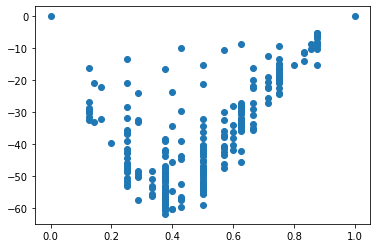

In [69]:
def get_concentration(row_symbols, atoms):
    return np.count_nonzero(np.array(row_symbols) == 'Pd')/len(row_symbols)

print(db.select())
concentration = []

for row in db.select(): 
    atoms = row.toatoms()
    cons = get_concentration(row.symbols, atoms)
    E_mix = row.mixing_energy
    concentration.append([cons,E_mix])
    
concentration = np.array(concentration)

    
fig,ax = plt.subplots()
ax.scatter(concentration[:,0], concentration[:,1])

## Task 2: Cutoff selection for a pair cluster-expansion  (5p)
In this task you will construct cluster expansions based only on pairs.
Your cluster expansion thus has a hyper-parameter, namely the pair cutoff, which needs to be determined.
For this task you will use `icet` to construct cluster vectors.
This can be done by first creating a [`ClusterSpace` object](https://icet.materialsmodeling.org/moduleref_icet/cluster_space.html) which requires a list of cutoffs.

In [4]:
from icet import ClusterSpace

# setup CS
cutoffs = [6, 5, 4]
prim = db.get(1).toatoms()
cs = ClusterSpace(prim, cutoffs=cutoffs, chemical_symbols=['Ag', 'Pd'])

# get cluster-vector for a given atoms object
atoms = db.get(3).toatoms()
x = cs.get_cluster_vector(atoms)
print(x.shape)


(9,)


In the code above cutoffs of 6 Å for pairs, 5 Å for triplets and 4 Å for quadruplets are used.
When only using pairs, as in this task, simply use `cutoffs=[r2]`, where `r2` is the pair-wise cutoff.

**Tasks:**
* For a range of pair cutoffs, use OLS to compute the training and CV errors and the information criteria AIC and BIC.
* How would you based on these error/metrics select your pair cutoff, discuss and explain your reasoning.


*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

In [62]:
def MSE(X,y, model):
    y_pred = model.predict(X)
    return np.mean((y_pred - y)**2)


def get_aic_bic(X, y, model, nbr_non_zero_params):

    n_samples = len(y)
    n_parameters = nbr_non_zero_params
    mse = MSE(X, y, model) # This assumes all models have Gaussian noise (Gaussian likelihood for ARDR)
    RSS = mse*n_samples
    sigma2 = RSS/n_samples # = MSE
    
    log_MLE = -0.5*RSS/sigma2 - 0.5*n_samples*np.log(sigma2) - 0.5*n_samples*np.log(2*np.pi) 
    
#     aic = -(n_samples * np.log(mse) + 2 * n_parameters)
#     bic = -(n_samples * np.log(mse) + n_parameters * np.log(n_samples))

    aic = 2*log_MLE - 2*n_parameters
    bic = 2*log_MLE - n_parameters*np.log(n_samples)
    
    return aic, bic


def perform_cv(X, y, n_splits, regression_model, model_parameters=None):

    kf = KFold(n_splits=n_splits)
    
    train_errors = np.zeros(n_splits)
    test_errors = np.zeros(n_splits)
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = regression_model(X_train, y_train, model_parameters=model_parameters)
        train_errors[i] = MSE(X_train,y_train, model) # mean squared error
        test_errors[i] = MSE(X_test,y_test, model)
        i += 1
    #data = {"train_error": train_errors.mean(), "train_std": train_errors.std(),\
    #        "test_error": test_errors.mean(),"test_std":test_errors.std()}
    data = [train_errors.mean(), train_errors.std(), test_errors.mean(), test_errors.std()]
    return data


def OLS_fit(X,y, model_parameters=None):
    model = skl.LinearRegression(fit_intercept=False).fit(X,y)
    return model


def LASSO_fit(X,y, model_parameters=None):
    model = skl.Lasso(alpha=model_parameters, tol=1e-6, max_iter=1e5, fit_intercept=False).fit(X,y)
    return model


def ARDR_fit(X,y, model_parameters=None):
    model = skl.ARDRegression(threshold_lambda=model_parameters, fit_intercept=False).fit(X,y)
    return model


def normalize_data(X,y):
    y_tilde = (y-np.mean(y))/np.std(y)
    red_X = X[:,1:] # Skip first column (bias)
    X_tilde = np.ones(X.shape)
    X_tilde[:, 1:] = (red_X-np.mean(red_X, axis=0))/np.std(red_X, axis=0)
    return X_tilde, y_tilde

def get_nbr_parameters(cutoffs, db):
    prim = db.get(1).toatoms()
    cs = ClusterSpace(prim, cutoffs=cutoffs, chemical_symbols=['Ag', 'Pd'])
    atoms = db.get(1).toatoms()
    nbr_parameters = cs.get_cluster_vector(atoms).shape[0]
    
    return cs, nbr_parameters

def get_non_zero_params(model_params, parameter_tol):
    non_zero_idx = np.where(np.abs(model_params) > parameter_tol)[0]
    return non_zero_idx, model_params[non_zero_idx]
    
def get_data(nbr_data, nbr_parameters, db, cs, get_energy=True):
    X = np.zeros((nbr_data,nbr_parameters)) # design matrix
    y = np.zeros(nbr_data)
    for j, row in enumerate(db.select()):
        atoms = db.get(j+1).toatoms()
        x = cs.get_cluster_vector(atoms)
        X[j,:] = x
        if get_energy:
            y[j] = row.mixing_energy
    return X, y 
    
def cutoff_analysis(cutoffs, nbr_data, n_splits, regression_model, model_parameters=None, parameter_tol=1e-4):
    db = connect('structures/reference_data.db')
    cs, nbr_parameters = get_nbr_parameters(cutoffs, db)
    X, y = get_data(nbr_data, nbr_parameters, db, cs)
    
    X, y = normalize_data(X,y)
    CV_score = perform_cv(X,y,n_splits, regression_model, model_parameters)
    model = regression_model(X,y, model_parameters)
    
    non_zero_idx, non_zero_params = get_non_zero_params(model.coef_, parameter_tol)
    nbr_non_zero_params = len(non_zero_idx)
    
    AIC, BIC = get_aic_bic(X,y, model, nbr_non_zero_params)
    
    return CV_score, nbr_non_zero_params, model.coef_, AIC, BIC

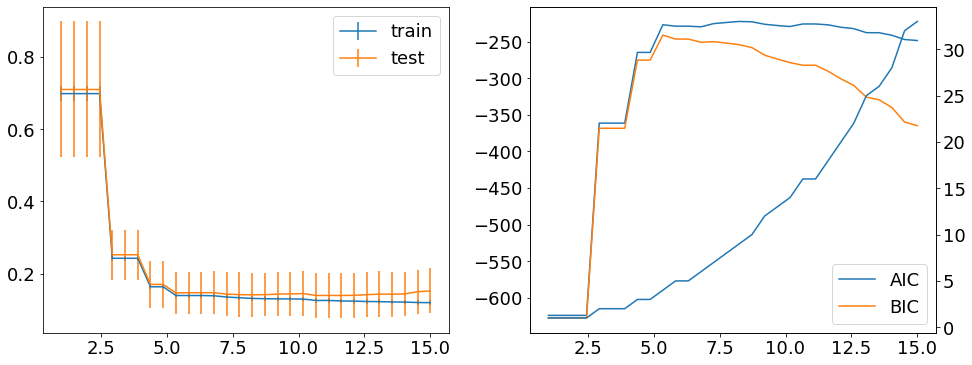

In [6]:
# setup CS
nbr_data = len(concentration[:,0])
n_splits = 10
nbr_cutoffs = 30
min_cutoff = 1
max_cutoff = 15

CV_score = np.zeros((nbr_cutoffs,4))
AIC = np.zeros(nbr_cutoffs)
BIC = np.zeros(nbr_cutoffs)
nbr_parameters = np.zeros(nbr_cutoffs, dtype = int)

cutoffs = np.linspace(min_cutoff, max_cutoff, nbr_cutoffs)
for i, cutoff in enumerate(cutoffs):
    CV_score[i,:], nbr_parameters[i], _, AIC[i], BIC[i] = cutoff_analysis([cutoff], nbr_data, n_splits, OLS_fit, None)


# Plot 
fig,ax = plt.subplots(1,2, figsize = (16,6))

ax[0].errorbar(cutoffs, CV_score[:,0], yerr = CV_score[:,1], label = "train")
ax[0].errorbar(cutoffs, CV_score[:,2], yerr = CV_score[:,3], label = "test")
ax[0].legend()

ax[1].plot(cutoffs,AIC, label = "AIC")
ax[1].plot(cutoffs,BIC, label = "BIC")
ax2 = ax[1].twinx()
ax2.plot(cutoffs,nbr_parameters)
ax[1].legend()

plt.savefig(f'cutoff_scan.png')

[ 1  1  1  1  2  2  2  3  3  4  5  5  6  7  8  9 10 12 13 14 16 16 18 20
 22 25 26 28 32 33]


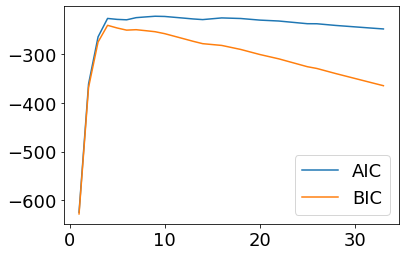

In [7]:
print(nbr_parameters)
plt.plot(nbr_parameters,AIC, label = "AIC")
plt.plot(nbr_parameters,BIC, label = "BIC")
plt.legend()

## Task 3:  Feature selection  (5p)
An alternative approach to "manually" finding good values for the cutoffs is to simply select a long-ranged model and use feature-selection methods to automatically select which cluster interactions (parameters) are important and which are not.

In this task you will try out the feature selection approach by using cutoffs `[13, 8, 6]`, and employing LASSO and ARDR. (Feel free to try out other feature selection algorithms like e.g. OMP, RFE)

LASSO has a hyper-parameter `alpha` which determines the sparsity of the solution (number of nonzero parameters). ARDR has a hyper-parameter `threshold_lambda` which sets how many nonzero parameters appear in the solution.

See the documentation here
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html


Scan a range of values for the respective hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

**Tasks:**
* Standardize the data. Why is this important for these two feature selection algorithms?
* Compute the training and CV error for a range of values for the hyper-parameters.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.    

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Does LASSO and ARDR select the same features?
* Discuss the differences between LASSO and ARDR.

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

In [8]:
def scan_hyperparameter(regression_model, n_hyper, min_hyper, max_hyper, n_splits, nbr_data, parameter_tol, pickle_file):
    if(os.path.isfile(pickle_file)):
        print('Using pickled hyperparameter scan')
        res = pickle.load( open( pickle_file, 'rb' ) )
    else:
        print('No hyperparameter scan file found. Running hyperparameter scan')
        cutoffs = [13, 8, 6]   
        CV_score = np.zeros((n_hyper,4))
        AIC = np.zeros(n_hyper)
        BIC = np.zeros(n_hyper)
        
        db = connect('structures/reference_data.db')
        _, nbr_parameters = get_nbr_parameters(cutoffs, db)
        parameters = np.zeros((n_hyper, nbr_parameters))
        nbr_non_zero_params = np.zeros(n_hyper, dtype = int)


        hypers = np.logspace(min_hyper, max_hyper, n_hyper)

        for i, hyper in enumerate(hypers):
            CV_score[i,:], nbr_non_zero_params[i], parameters[i,:], AIC[i], BIC[i] = cutoff_analysis(cutoffs, nbr_data, n_splits, regression_model, hyper, parameter_tol)

        res = (CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers)
        
        pickle.dump(res, open( pickle_file, "wb" ))
    
    CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers = res
    
    return CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers
 

def plot_scan_hyperparameter(hypers, CV_score, nbr_non_zero_params, AIC, BIC, title):
    # Plot 
    fig,ax = plt.subplots(1,2, figsize = (16,6))
    
    ax[0].errorbar(hypers, CV_score[:,0], yerr = CV_score[:,1], label = "train")
    ax[0].errorbar(hypers, CV_score[:,2], yerr = CV_score[:,3], label = "test")
    ax[0].legend()
    ax[0].set_xscale('log')

    ax[1].plot(hypers,AIC, label = "AIC")
    ax[1].plot(hypers,BIC, label = "BIC")
    ax[1].set_xscale('log')
    ax2 = ax[1].twinx()
    ax2.plot(hypers,nbr_non_zero_params, c='r')
    ax[1].legend()
    
    fig.suptitle(title)
    
    plt.savefig(f'{title}_scan.png')

In [9]:
# Overall setup 
parameter_tol = 1e-4
n_splits = 10
nbr_data = len(concentration[:,0])

Using pickled hyperparameter scan


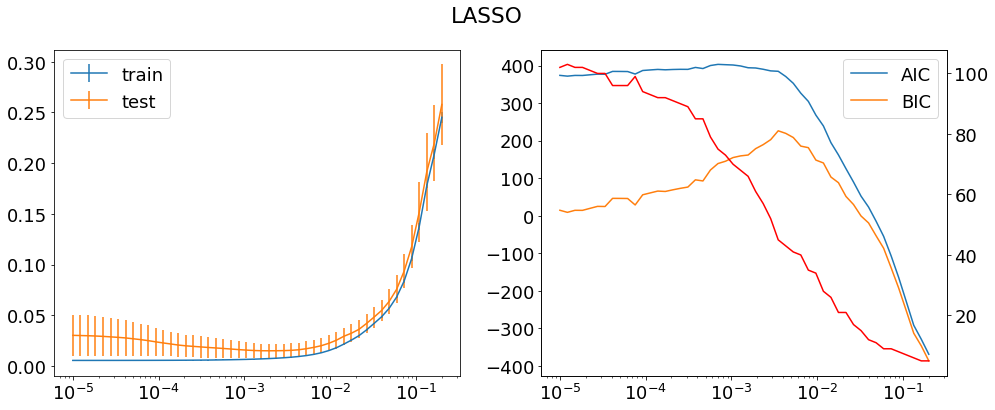

In [10]:
# LASSO - Scan alpha
nbr_alpha = 50
min_alpha = np.log10(1e-5)
max_alpha = np.log10(0.2)

CV_score_lasso, nbr_non_zero_params_lasso, model_parameters_lasso, AIC_lasso, BIC_lasso, alphas = scan_hyperparameter(LASSO_fit, nbr_alpha, min_alpha, max_alpha, n_splits, nbr_data, parameter_tol, f'scan_lasso_n={nbr_alpha}.p')
plot_scan_hyperparameter(alphas, CV_score_lasso, nbr_non_zero_params_lasso, AIC_lasso, BIC_lasso, title='LASSO')

Using pickled hyperparameter scan


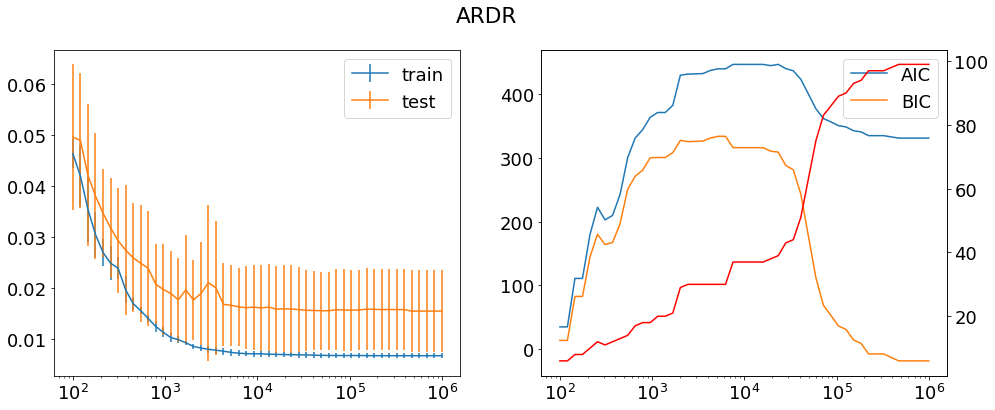

In [11]:
# ARDR - Scan lambda
nbr_lambda = 50
min_lambda = np.log10(1e2)
max_lambda = np.log10(1e6)

CV_score_ardr, nbr_non_zero_params_ardr, model_parameters_ardr, AIC_ardr, BIC_ardr, lambdas = scan_hyperparameter(ARDR_fit, nbr_lambda, min_lambda, max_lambda, n_splits, nbr_data, parameter_tol, f'scan_ardr_n={nbr_alpha}.p')
plot_scan_hyperparameter(lambdas, CV_score_ardr, nbr_non_zero_params_ardr, AIC_ardr, BIC_ardr, title='ARDR')

Feature match: 100.00%


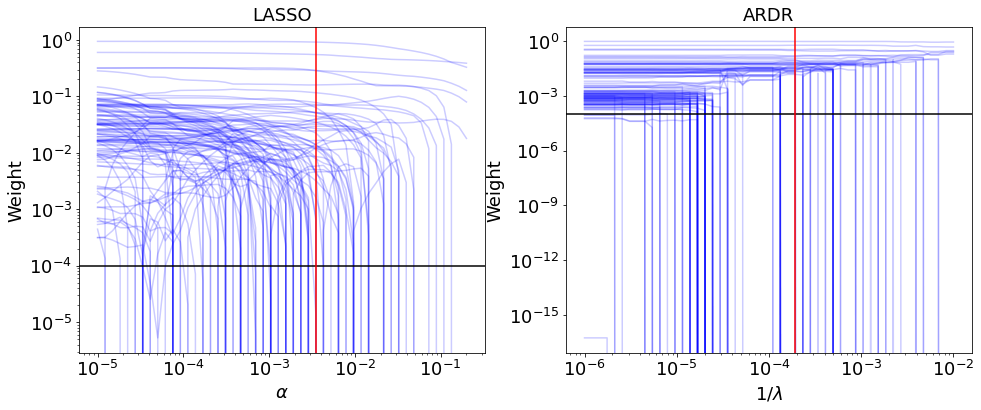

In [12]:
opt_idx_lasso = np.argmax(BIC_lasso)
opt_idx_ardr = np.argmax(BIC_ardr)
alpha_optimum = alphas[opt_idx_lasso]
lambda_optimum = lambdas[opt_idx_ardr]

nz_idx_lasso, nz_val_lasso = get_non_zero_params(model_parameters_lasso[opt_idx_lasso,:], parameter_tol) 
nz_idx_ardr, nz_val_ardr = get_non_zero_params(model_parameters_ardr[opt_idx_ardr,:], parameter_tol) 

def get_matches(arr1, arr2):
    # Get longest array
    if(len(arr1) >= len(arr2)):
        big = arr1
        small = arr2
    else:
        big = arr2
        small = arr1
    matches = [1 if i in small else 0 for i in big]
    match_per = np.sum(matches) / len(small) * 100
    return matches, match_per

matches, match_per = get_matches(nz_idx_lasso, nz_idx_ardr)
print(f'Feature match: {match_per:.2f}%')

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(alphas, np.abs(model_parameters_lasso), c='b', alpha=0.2)
ax[0].set_title('LASSO')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('Weight')
ax[0].axhline(parameter_tol, c='k')
ax[0].axvline(alpha_optimum, c='r')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].plot(1/lambdas, np.abs(model_parameters_ardr), c='b', alpha=0.2)
ax[1].set_ylabel('Weight')
ax[1].set_title('ARDR')
ax[1].set_xlabel(r'$1/\lambda$')
ax[1].axhline(parameter_tol, c='k')
ax[1].axvline(1/lambda_optimum, c='r')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.savefig('lasso_ardr_weights.png')

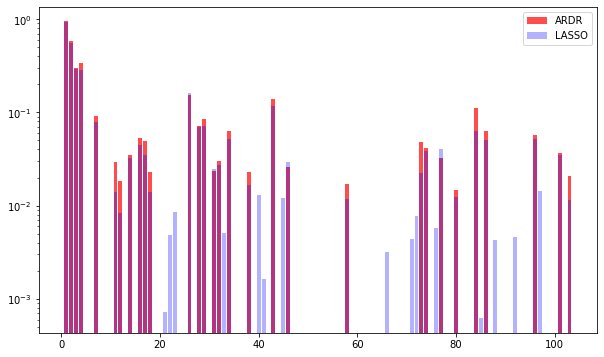

In [13]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=nz_idx_ardr, height=np.abs(nz_val_ardr), color='r', alpha=0.7,  linewidth=3, label='ARDR')
ax.bar(x=nz_idx_lasso, height=np.abs(nz_val_lasso), color='b', alpha=0.3, linewidth=3, label='LASSO')
ax.set_yscale('log')
ax.legend(loc='best')

plt.savefig('lasso_ardr_weights_overlap.png')

## Task 4: Bayesian Cluster expansion   (7p)
In this final task you will try a bayesian approach to constructing cluster expansions.     
In this task use cutoffs `cutoffs=[12.0, 6.0]`.


### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$).
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) liklihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.


### The ground state

The ground-state structure refers to the structure with the lowest energy for a given concentration.
Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `structures/ground_states_candidates.db` you will find potential ground-state candidates for $c_{Pd}=0.667$. In this task you will assign each ground-state candidate a probability of being the actual ground-state.


**Tasks:**
* Use OLS to predict which structure is the ground-state and the corresponding ground-state energy.
* Use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
* Plot the disitrubtion of the ground-state energy.
* Compare the results from the previous two tasks with the OLS results and discuss.


*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we expect $\sigma$ to be roughly in the range 1-10meV/atom, and $\alpha$ in roughly the range 5-50meV. 

In [118]:
# set prior parameters
def sigma_log_prior(sigma, a=5, b=1 ):
    return np.log(sc.stats.invgamma.pdf(sigma, a = a, scale = b))

def alpha_log_prior(alpha, a=5, b=1):
    return np.log(sc.stats.invgamma.pdf(alpha, a = a, scale = b))
    
def ECI_log_prior(J, alpha):
    return - 0.5*J.T@J/alpha**2 - 0.5*len(J)*(np.log(2*np.pi) + 2*np.log(alpha))

def log_likelihood(J, X, y, sigma):
    
    return -0.5*(X@J - y).T @ (X@J - y)/sigma**2 - 0.5*len(J)*(np.log(2*np.pi) - 2*np.log(sigma))
 
def log_posterior(theta, X, y, hyp_sigma = (1,1), hyp_alpha=(1,1)):
    size = len(theta)
    J = theta[0:size-2]
    sigma = theta[size-2]
    alpha = theta[size-1]
    if sigma<0 or alpha <0:
        return -np.inf
    post = log_likelihood(J, X, y, sigma) + ECI_log_prior(J, alpha)\
            + alpha_log_prior(alpha, hyp_alpha[0], hyp_alpha[1]) + sigma_log_prior(sigma, hyp_sigma[0], hyp_sigma[1])
    print(post)
    return post

In [119]:
cutoffs = [12, 6]
db = connect('structures/reference_data.db')
cs, J_dim = get_nbr_parameters(cutoffs, db)
n_dim = J_dim + 2
print(J_dim)
n_walkers = n_dim*2
n_samples = 500
burn_in = 1000

print(len(concentration[:,0]), J_dim)
X, y =  get_data(len(concentration[:,0]), J_dim, db, cs)

initial = np.zeros((n_walkers,n_dim))
initial[:,0:J_dim] = np.random.randn(n_walkers, J_dim)*50
initial[:,J_dim] = np.random.rand(n_walkers)*10
initial[:,J_dim+1] = np.random.rand(n_walkers)*50

hyp_sigma=(1.5, 4)
hyp_alpha=(0.5,10)

sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(X, y, hyp_sigma, hyp_alpha))

# Run burn in
sampler.run_mcmc(initial, burn_in)
final_state = sampler.get_last_sample()
print(final_state)
# Sample posterior
sampler.reset()
res = sampler.run_mcmc(final_state, n_samples)
trace = sampler.get_chain()
print(sampler.acceptance_fraction)

#pickle.dump(trace_omega, open( "trace_omega_task2.p", "wb" ))

33
251 33
-13544.271030155127
-375121.9835008519
-21977.715532719914
-10012002.125068447
-33008.70119834581
-24139.405678476563
-223433.57907280745
-54435.967721628585
-42744.8739084732
-28538.640808827466
-52381.719038919044
-642404.503243308
-48367.814367418236
-52849.54734557229
-75120.52955487552
-76013504.84034121
-70671.14342390829
-46501.193721005766
-25528.572421269357
-73700.36108580076
-7396.756888777443
-112344.461727231
-2006988.0121639895
-102102.7713141777
-715189662.3107642
-590815.6830873888
-57402.12067513125
-597555.844109549
-136701.47794639555
-18885.254485826066
-5929374.0724207135
-83587.37301823021
-29678.999348343965
-20964.264584013257
-99961744.54954961
-10734.272598234254
-66057.78013702262
-130849.21692989508
-25843.154918104086
-11040.277848682916
-328881.8687797262
-17323.88071377119
-12258.480874489269
-19442.318932994178
-391455358.46143633
-1125679.618680102
-1434576.9814252222
-13473.893050439574
-13736.303155497077
-31933.279815305017
-34557.209899712

-6402.235804577681
-8444.626618271794
-21783.79761384613
-8446.242000755927
-50518.36666209433
-6768.984963322391
-5551.285757751115
-17147.91487316425
-5468.718038750706
-17668.77595018799
-14799.39476979902
-17208.85624090758
-217415.1961372916
-13488.703207301212
-69170.33580884746
-163880.78559501606
-264825.73506419885
-16909.226809329084
-7848.400978257163
-88558.73044741379
-122753.07048233296
-10084.21055372355
-11474.65954464334
-11662.342840727288
-8847.726158817326
-14066.75842824692
-21734.243739391506
-252320.11182287923
-10687.05528078162
-34768.68388498722
-7623.552061768214
-25664.67216391236
-36250.36926408424
-24612.43314598985
-7277.802339014824
-7126.483396119221
-44410.594345073594
-12909.123566543683
-5389.481478010233
-594265.9641877454
-8330.589291115355
-5680.772210212176
-8214.186884545843
-37599.8294300642
-9899.315984880284
-5834.602761210918
-24797.094283338247
-7272.284510549181
-6477.16505065744
-7513.323787458471
-53039.00644806689
-1262022.7221002602
-4

-3956.55739244169
-19280.905358334156
-3306.970366152684
-13273.266724939613
-8786.916369546354
-2820.6506043735735
-5866.834256403427
-6078.655901550148
-7078.228612185904
-62931.402612237165
-4430.171852282231
-14473.08643884322
-4732.590481452995
-3970.2437161025873
-2002.7388056452526
-24660.151418321715
-4025.7624401194944
-27168.68838353847
-6632.463064197568
-5455.353836283753
-6314.335166675965
-3585.9572388530682
-4773.953560329686
-3996.7588662862586
-11707.769324707473
-10156.368549654715
-4983.816962887786
-7795.778435212928
-6593.262158573956
-4004.9129358233417
-5065.092049578303
-15170.359180472831
-4276.2053806915765
-12205.93388211185
-9500.433626819402
-3622.7534869085034
-6226.097219243808
-5520.158976629238
-4110.08770199901
-5470.796310771152
-5571.813774442479
-3227.306310260486
-6693.156721690683
-9476.349892155144
-6012.353354433346
-3492.9068665172704
-3758.479524506608
-10642.235873936088
-7168.078137502251
-4151.781866261012
-4982.402362080822
-4105.869420817

-3240.354724143212
-5330.106886744567
-3566.0075485755474
-4473.326356522622
-5265.760252786617
-5859.044121161364
-4837.250042580877
-4355.251810376825
-3360.130836035791
-3677.7224290466843
-3384.5256468841453
-2618.65940853635
-25127.098162136437
-7098.924710516063
-3572.097509121653
-12583.479601422105
-5365.900246648072
-3342.027952694558
-14682.986657242851
-20531.36923503875
-4062.7343733675334
-3234.9936914045848
-4957.775036616755
-3810.4791574203978
-3525.422482976982
-3788.3523192376733
-2644.811679241416
-6834.936346258364
-3619.548545925968
-3078.9390882354573
-2107.7348030194107
-3374.970799284614
-2951.2014070774817
-3183.526386846205
-3237.62009236371
-4164.235997499079
-2789.3263280718893
-3143.435287541556
-4592.039238085322
-4379.728911096034
-2751.4103920083935
-1651.021910085434
-2087.0049821790985
-3442.415217659154
-3636.594549177039
-4355.833430381761
-7303.740731202792
-9533.482080652297
-9283.022910707938
-3610.5768206154903
-4240.1572101538995
-2769.106978825

-2450.584764973673
-4396.009769358953
-2573.793449448998
-2240.275487357733
-2204.0492057176193
-3951.8723718429874
-3753.2604460560174
-2878.6609152266406
-4231.802542729865
-2551.9929397249357
-2110.0554978357513
-1864.5780169601462
-2037.837739878425
-3893.515774794184
-2905.7359307600877
-2940.105794303804
-2485.3455880386005
-1143.6676292194566
-1922.6392400330399
-1979.0670980464045
-3305.1840896509725
-2899.3779051242923
-2407.4596339924215
-2926.0103693882797
-3952.4547369130833
-3305.9590548827123
-2045.4933670921512
-2764.5759822319633
-2155.7759963281064
-2498.2408155260428
-4790.109738619328
-3909.7059235790766
-4502.097373311762
-2668.936986770693
-2564.4147787857955
-4810.56958284546
-3047.3117905149065
-5214.884984475579
-5127.445646052279
-4331.905171849523
-16591.301270349828
-3440.254803761415
-2155.320013538396
-4933.822331441038
-2302.0202187833816
-4721.156577042752
-2549.837707813642
-4422.173634861591
-5825.875691653855
-2358.8564109379513
-5291.4414719677125
-64

-2773.6028301391098
-1920.5538596241154
-2052.6622089824555
-2608.3448655050324
-2327.2630769679135
-12950.275132723062
-2861.7617763056173
-1873.6213958813391
-1823.1817237340827
-2386.0576572758982
-2153.0504586240695
-1635.9707559416972
-1713.3601800939978
-1833.988572595903
-1121.4065042704158
-2064.789018347467
-3349.5631621017833
-8775.866187451946
-2721.5169748061717
-3374.2495258140107
-1944.2255576971252
-2455.6971038671322
-2799.4796182230816
-3194.5270415092505
-1973.972907021875
-3113.8500953700873
-2307.28638182569
-2549.7264243139034
-6935.576842562039
-3988.2747831932825
-1875.092533629047
-2926.2151926672723
-3084.010637249683
-2652.358603723141
-6251.235096622029
-2124.5985149636836
-2231.5449593095173
-2751.199612103074
-1931.7045369151667
-1961.1239962004852
-2318.4985218678
-2095.942381057807
-4668.378198564374
-4231.647708167576
-3573.555803364106
-2240.9906476892966
-1772.3787088315162
-1955.8985791005914
-3333.095556300851
-3081.2629914403083
-2241.161167250572
-

-1168.458016809006
-2156.510565528327
-1487.2728164868079
-1481.6455304478786
-1605.5579500033848
-1251.418663159799
-1787.4589044591244
-1798.3257188141959
-1785.2988781517797
-2294.1914793147307
-2223.6233436148405
-1629.405397867723
-2439.3188168019956
-3676.2436576805894
-3163.7215924159773
-1658.6521870471802
-1897.4695383109652
-1653.6878725640427
-2004.6238045214457
-2422.893603339636
-1520.2895532734246
-2656.826841761323
-2797.4476276186692
-1169.1560459321856
-1566.8945861465534
-1531.5878908063635
-2239.303857000404
-4046.915306470764
-1464.2470128752807
-2407.055343434813
-2724.220126656235
-1968.462430678741
-1490.9048134526245
-1822.4392208041313
-3167.2758047923603
-1514.9046616897967
-1718.8784082924894
-1708.8104112731482
-1481.2087739933236
-1355.624788445192
-1520.1753397338973
-1630.6300290126974
-1228.8936144417894
-1850.0048415090582
-2152.2075506904625
-2071.5453274772976
-1849.1024591735795
-1671.6071645923191
-2150.8195942448215
-2201.8176988601062
-1703.117910

-1515.694978616979
-1527.3391672115808
-1266.7522015535874
-1196.3775511185283
-1497.1896802748183
-1433.4998331388747
-1414.378754244755
-1439.8846564742637
-1292.99525048337
-1528.3764957795045
-1616.1229826103524
-1315.9116452812636
-1483.9380220692901
-1908.2500783452208
-1492.6566499767473
-1220.876414824546
-1509.8537141050094
-1489.3195701659356
-1856.4164417854013
-1802.805707242949
-1342.1714581254582
-1311.0538809436612
-1433.0851598692245
-1356.4619336159344
-1848.8281566401536
-1202.500158937602
-1470.2156972993273
-1838.0205309818311
-1498.6454532723603
-1432.692047255761
-1639.2851682646944
-1759.7333991465234
-1484.137486161934
-1225.4702779777379
-1997.9130702551313
-1558.8512816148439
-1787.9127033216587
-1383.4037029644317
-1458.9066501133957
-1256.3926776614999
-1170.1340036504896
-1434.0128568888042
-1472.6551668733985
-1406.572608009584
-1500.433047068361
-1232.3330768854016
-1731.0411963170675
-1545.7754961223316
-1321.8686121063365
-1434.5402934156286
-1424.71558

-1276.6613009257678
-1268.5485809924098
-1225.243457553379
-1393.37738977094
-1189.2392944265503
-1193.133871946361
-1147.9037806538024
-1198.6153579476334
-1099.285273965586
-1483.82883109098
-1478.0351297047218
-1424.7151838984648
-1202.8919768778162
-1205.314977018524
-1340.6189853904962
-1305.6777624701217
-2006.899050395502
-1414.6860306646824
-1151.8621555674367
-1290.7787036689042
-1349.9599838443892
-1300.3960385613304
-1290.2589231686634
-1540.7310710947975
-1236.7090693161992
-1125.2309027399417
-1240.3959080702434
-1211.5173320116037
-1276.075991155104
-1112.9048556851233
-1112.3056896077705
-1235.80877959143
-1160.6967555993904
-1615.1098159233607
-1073.3968827550834
-1208.334938106613
-1349.0031805431242
-1237.069858150655
-1367.9689923475016
-1220.08228047734
-2064.105904853559
-1245.6025335853283
-1330.0725131126026
-1158.6831253994471
-1393.585330200767
-1213.4794828991257
-1309.3752904438013
-1105.8683252069184
-1452.3518854254105
-1265.4597962545138
-1229.133335912224

-1166.9157128907232
-1163.4982831385094
-1383.1995176299483
-1102.0295536803283
-1626.6127425110742
-1133.0455312403274
-1369.2828932344173
-998.9850306643912
-1162.8979199852047
-1218.6398085158276
-1113.0364589473436
-1083.0533603931597
-1172.4650328880991
-1230.078455720525
-1307.8886945953511
-1118.9235805537357
-1168.100661084914
-1170.2806781205911
-1430.9063217978753
-999.354093505922
-1103.1790566069876
-1220.9517027429981
-1609.8378862714587
-1088.6574570889736
-1205.7519977724812
-1155.9159441570876
-1018.9137977769881
-1205.8689010957578
-1144.1687595637527
-1150.664140057724
-1207.4338403121583
-1046.7722948362282
-1192.3233680562666
-1144.6138905898863
-1106.415880006384
-1377.1265895524175
-1283.8379007387714
-1092.5120455585125
-1117.445625941512
-1074.022345315604
-1099.1668017198144
-1097.083232806168
-1235.741502416593
-1071.4381389620598
-1085.016177722096
-1332.462203803542
-1653.0029385472574
-1285.3928757092615
-1316.1128029194394
-1094.6283703813106
-1131.6456470

-1583.5311147047803
-1104.1553804003831
-1016.1837473597018
-1422.337464162117
-1085.3543078364505
-1013.5604471409583
-1121.6115724147276
-967.4099504095965
-1020.0216203937515
-1054.1716178233582
-1047.473408939061
-1028.738080872966
-1131.6145981078166
-1053.8112697224603
-989.5062128026993
-1113.8981865142741
-1029.5868727654652
-1077.124121101002
-1012.9666919650145
-1007.454584660598
-1002.4879290614322
-1020.2688695283538
-1092.186002502664
-1069.6564200871178
-964.2767967473486
-1127.3183182503853
-1249.1535809489899
-1033.6532858607604
-1029.6388446234753
-1060.1561182111584
-1043.5089329049822
-1075.204115267236
-1032.249050570693
-1131.1475947556337
-1016.2858351527829
-1233.0915045903268
-1101.2737816849983
-984.8728245729651
-1080.1278563800265
-915.6736615076835
-1060.5896315817092
-1027.926549699869
-1084.4010125483412
-1047.1721769365379
-1305.3623534103242
-1028.3780081864616
-1083.524070636855
-1138.1834079251073
-1042.9740289154006
-991.0280935931506
-1019.7370143227

-1066.897593251341
-1006.7213911779718
-1008.4621630379231
-975.0872501149516
-1016.7408398363368
-1015.39829083784
-1082.4191940347425
-1042.5632653790406
-1014.7653509142657
-992.0240224733051
-1015.1979860885924
-1054.8763754198035
-1088.4263681878917
-1010.3353534170437
-1039.5810058346365
-1017.5030470265988
-994.4179707955047
-989.7817110719911
-991.9650263712145
-969.8907266308148
-1026.902252495253
-982.0323217889255
-1034.1625280025933
-1029.7895014279684
-1063.2372649328513
-984.4325225008273
-1023.2188392358355
-1292.8033665573594
-1012.0896120426119
-1030.8280817863888
-1042.908342552118
-994.0522192507638
-1022.4554837934473
-1034.3396679654645
-1025.1645850116304
-1036.5380363924687
-1043.7290042871937
-1139.5876319232834
-972.3228100467064
-971.0273038703112
-1047.636024261911
-1061.843153941021
-1032.623230678172
-1026.42278485609
-1055.8668360109355
-1016.9415665909435
-1019.158847871403
-1080.8572992233035
-955.3529212161147
-1061.5589344507805
-1066.6015908778072
-10

-1082.3981644058686
-1201.0950858940676
-1037.748198098973
-1016.2145255091983
-1083.157992642216
-1001.4188375418714
-991.1108426459821
-915.4124042564689
-976.4695492790757
-1005.2776997020276
-1053.322378120511
-958.5576316739365
-974.3020974691615
-986.2335117154926
-949.3246077509694
-996.0478631325195
-1081.5514528885383
-981.3439602708938
-958.3048290321117
-1066.6114542437945
-987.5930346267052
-1093.39669884474
-988.3400749606585
-942.0829709227484
-998.3316152354794
-998.3706701567115
-941.6117186994763
-987.1438221636382
-948.6272709020502
-955.7404600760398
-1053.1681372052767
-954.0560366313574
-947.7554576969392
-1039.517916489073
-1119.3294199935901
-965.4027780988349
-995.4632455230277
-983.2868454240264
-926.3465954042717
-965.7779490017269
-920.3113593545401
-1001.1067544991471
-928.7880144581227
-985.1595473348045
-1049.6456132383114
-948.4726767469369
-969.5947994970218
-1013.0809587773463
-1018.2089875881986
-981.9347259468345
-1067.1325553518532
-941.9949158968536

-1197.5551742159128
-913.1355868926463
-1024.5400361262955
-900.0183116700391
-998.3803880379758
-1032.830815444663
-922.3882562863182
-969.7207264752889
-991.683401871375
-1146.6160905431868
-922.2704845085964
-1029.2877491840704
-900.7176890494062
-922.9027282910441
-968.4191944732024
-1028.2988194831673
-997.119190481686
-1048.647133384055
-1034.836778583237
-938.8413187580398
-918.1034642833401
-1051.547052687936
-922.5922223665693
-881.1759333515122
-1040.381507594107
-1015.6551585357917
-957.5666072457449
-934.7610255561776
-1014.6553362459642
-1022.9045486138093
-968.5930591188493
-1087.156624834052
-940.9629682276545
-961.6934779833923
-953.6663555806578
-932.7097934224594
-937.2211055525919
-954.8379857206934
-908.8978600245492
-957.6028376044729
-1156.095900853728
-948.313054853629
-1004.4307979002142
-922.1276632563244
-852.115632655157
-966.9590270973126
-938.7985604835317
-954.4796494797931
-924.1101231573704
-925.0755873619757
-913.3843779973101
-943.1950094935229
-954.06

-929.0661783675167
-839.526594104559
-905.589981886605
-915.4674789653789
-883.8438210990224
-839.9241659309176
-900.5818455500345
-924.3927666047248
-918.1468797863073
-998.4916826860883
-903.7463675902869
-914.8300573845255
-1024.3945602044253
-889.8255401740865
-987.5555844325128
-861.3097822802594
-901.72288513322
-907.4129178156547
-893.1485368792131
-876.5342912556479
-901.7741242409107
-904.5961181688824
-969.1401769220809
-965.3614778347139
-832.0361298558742
-981.6258211137817
-897.7415416128498
-908.4995268050404
-899.2549832476722
-910.0567971984937
-906.8908954866309
-899.130735051576
-877.4373994815741
-894.9309893053423
-964.9959048978826
-917.2943538558
-977.0945427153831
-883.6054429418932
-828.7797102798111
-926.1177413676348
-912.3020880256646
-929.9703689757151
-952.2262894291556
-924.6944696481941
-946.2782618724606
-1029.7672743690173
-932.415423374502
-963.566093010008
-916.1600534454262
-1008.712783299006
-902.6893397073329
-1097.0193303367953
-1078.1734118769634

-931.1340794906469
-950.4817635125538
-900.4714168941618
-964.0826209800965
-839.1733000214413
-837.9468754804517
-827.6509313707573
-900.3274412103295
-891.2580286865714
-907.4079074762813
-863.3965944185546
-852.330903388315
-884.1424299517168
-849.2835985592837
-950.2624913597092
-881.3326130047104
-891.4444560970202
-867.9144261956177
-809.9663175605228
-934.5750277317615
-851.4562085943529
-914.4324490480827
-870.163402611176
-951.4065658614644
-985.6008566554069
-851.0855046404032
-782.2480567293336
-863.4796345367722
-875.0445861070514
-903.6744907172905
-883.932683981793
-878.048840569735
-910.271656154313
-834.7618689022206
-925.4303889014423
-923.3064505500212
-901.6912336386793
-917.8354454849814
-827.2880569835653
-874.0037005835217
-814.2430294650513
-881.3828614460134
-853.6582852305762
-798.340659847226
-860.9913156320578
-860.3637449767367
-960.6125543066257
-956.3339802936313
-966.6694513491032
-884.7098175914975
-890.114981288182
-982.5909877015338
-932.4711003425641


-892.0361517227134
-857.9092524022572
-898.0875624598904
-862.6615849566899
-825.789461981975
-846.0167035949788
-853.7723219290248
-840.8975168226646
-846.2875863281383
-823.2977472903026
-802.5852177302372
-822.7237784384329
-777.3128295273664
-829.2864272343621
-825.1375330932343
-853.8101656590399
-852.6181724884658
-829.6226801919212
-854.2792673161749
-862.0639733543522
-1031.0118424799682
-828.0525296930791
-818.0546296938476
-871.1613302669876
-812.384342992543
-873.0104416536934
-814.0404521736402
-978.4044190146478
-839.4399581354807
-809.4590348140531
-812.3793970964533
-908.9870706124356
-905.1778853014825
-905.3076648015185
-814.8276176014895
-918.0971488673358
-850.2883085634709
-845.2495068467633
-870.6731293111371
-978.1479080615358
-965.5588690141675
-941.8795154783527
-830.7928504904022
-813.7157379170118
-832.5857126684217
-862.9329213316993
-879.1973083316474
-944.7700435597493
-808.5759755356296
-957.8328756695417
-821.5338829872337
-851.3977894515056
-820.16843626

-794.1774478552402
-782.2857671913699
-790.4040522737548
-804.6408388894137
-791.936279780598
-800.4742042255732
-844.7018029735368
-796.1577702077865
-904.9996181522376
-844.38249128977
-809.1673610288224
-856.3334515866246
-811.2069254017614
-960.3138836613476
-800.1023180053554
-814.1316411401459
-816.3641220340975
-828.5773507448545
-808.8157043970668
-812.0615222814637
-841.0122192988405
-796.4528503796179
-794.1948578470273
-941.7660339216612
-796.3666693848966
-813.2737546155856
-885.3635814246619
-801.4199977903066
-810.6132514233265
-860.1045459983392
-833.0398697717108
-858.275155630984
-816.5788235293886
-789.8902704455071
-811.2100512219099
-807.2233610063121
-784.4186318032495
-850.291321784378
-904.3540001798226
-815.3895881075007
-833.2252976249506
-800.7831078650166
-821.6080808538413
-817.93309079251
-806.5071304177662
-791.6892117672372
-821.5611036754351
-929.1726340265624
-774.5240994746564
-800.6261293771619
-795.0141744666423
-791.5658863781161
-804.741183016964
-

-772.1593430668196
-925.069141041796
-833.4737879099943
-786.1488355233429
-784.5773039155166
-783.0143292367419
-778.0707696591437
-843.7011359458995
-845.1899407093879
-819.1511044569584
-889.6347297859255
-790.2615663220092
-767.3420922517881
-774.5757209553707
-774.5259369242275
-794.7116589984886
-793.9866056265356
-792.7793527369614
-828.7925948379758
-790.9188896426928
-795.1681588501093
-864.853289347587
-779.6600440298787
-861.196864884643
-782.3411140176518
-808.9510034092085
-766.6998996881065
-782.35207030402
-795.0966317685114
-831.0614982485592
-794.5495316631078
-816.7018356575936
-794.7345532000681
-774.0405909727955
-766.0941449071562
-810.5994588143941
-809.9931651680618
-791.9646920229084
-773.4155416388497
-773.7319225554758
-816.478654215134
-792.5707573119278
-864.0005042021734
-813.3127750773085
-825.974731225191
-777.4936766122572
-827.8319474039472
-894.074862430491
-789.4329173221225
-792.7668082333071
-814.5285802493959
-796.7784026304233
-774.6508762399814
-

-838.684149354627
-870.6772412620425
-861.2539070547838
-784.2747731649412
-812.1772609568934
-890.6749395656444
-774.2600539599686
-775.6479993641077
-838.5413163444952
-805.9348750388332
-775.5790065720159
-770.7355777371563
-771.0089516926067
-773.9320473294941
-771.6444343001554
-820.8159731273433
-775.3661521413908
-786.9998569964009
-757.528008833168
-810.269653864389
-789.4978434491283
-774.8574515895064
-880.7584861217622
-848.4182597731715
-779.0885711476858
-773.6176114360775
-753.5785308777527
-823.5460194130682
-795.1336609634817
-776.2835743643165
-834.0622233790103
-923.067157149503
-781.3767938366253
-808.8855375227374
-889.4163729326319
-817.5329174470994
-841.8032603912956
-774.1439454661373
-768.9844320956291
-798.8996172348585
-896.8220355812961
-758.7643223602303
-823.0070432001831
-773.1906901057151
-777.0539746670388
-788.670763713813
-774.0176456346989
-860.7887122887985
-783.0967892988049
-857.5512901589475
-785.6945085457148
-757.8482015008301
-828.904713345489

-781.2920053952812
-829.8948798141811
-808.8595378845177
-769.0556484311162
-772.9445705522631
-824.3411628317054
-818.8179276467363
-766.9145040480129
-787.1287946656514
-773.3214326358126
-945.6091934066286
-812.1990028864722
-773.5305203333451
-840.4318025782815
-764.4211838921965
-762.2345081837447
-759.9766679379176
-863.4084489719015
-769.5102097444304
-799.6704851361231
-793.7705166345303
-827.9396756010609
-806.6874058637806
-831.756166753539
-759.7800982703632
-770.6022438360066
-754.9158145536788
-832.5700561758154
-748.7659082066352
-823.434640592541
-877.820512048742
-738.4879079830745
-780.4095193897635
-829.5851397287844
-860.5339426963294
-770.0925216454564
-779.3684561623681
-824.7768544219332
-799.9445414773647
-771.3056890541193
-767.9268493848814
-786.3670756929305
-765.2562565656611
-780.5854699228697
-752.3121022714706
-790.6119936838359
-770.1548587878872
-805.99747339057
-749.4856775186034
-829.293415115651
-806.5437975689305
-767.8404546370429
-761.1417087743952

-774.4802830997955
-828.0866831869425
-804.6230679568304
-748.9573675281499
-761.5928220212229
-812.354491741397
-752.11424793637
-878.6355331006722
-766.1640147146047
-758.5086424632962
-806.9137386891695
-737.8791714807272
-775.9522753668907
-760.2715375129354
-803.4084267327922
-768.2804253812252
-781.4332061633845
-767.6609356118362
-824.6393898918682
-782.2053270794529
-791.4440881630244
-775.7819907947338
-761.2666344792044
-753.5913943604666
-766.3840594639331
-815.2872570760416
-781.0964057704456
-780.1100715355127
-849.1531598634828
-746.014244240006
-761.4275912679807
-795.3318804177395
-797.475555232533
-764.6717823856713
-756.7333142668997
-781.440837785162
-755.397667560448
-867.9445830034248
-794.4635263447607
-761.2400971486121
-754.9624677263176
-739.0724862129803
-748.3313137981728
-788.7456206372415
-767.6741945836568
-794.4594646894741
-775.3867782577083
-748.5998699645652
-761.0921766327727
-861.1233921005697
-760.7375118570656
-810.7582766580035
-776.1058784536448


-740.6345005719282
-716.9302611156191
-773.257767633382
-798.5026142487102
-749.9571591317055
-756.4556870051174
-755.2654665209924
-754.4734474501593
-788.7636590309963
-754.953968715335
-794.2866322916921
-751.6440065893544
-734.4471028277095
-767.6693257981041
-759.5795358435
-752.5056651173115
-737.7537747602173
-754.6376816602422
-758.1890358253415
-843.8594600813689
-752.1307037925293
-786.2741188439767
-822.7133254534485
-747.7033255413014
-754.0855482301223
-750.3564904972283
-783.1343556966029
-774.2961879594651
-782.1923041000634
-747.6954205325416
-796.4284075711435
-747.1701719896148
-750.7227961856419
-758.5011432321537
-742.2882422165803
-845.7946751498146
-774.281900858936
-748.9770480260585
-825.6184593960179
-842.5389834429008
-743.4650852428858
-788.873211238244
-756.224536254333
-804.5489947660338
-755.083911813076
-756.432259254782
-764.1785286868292
-796.6460726471676
-803.4350086372305
-785.4410917420387
-769.514150855247
-734.0462784321593
-747.183175005131
-775.

-742.1825760467304
-819.7800080041523
-769.4305812705974
-743.1512866779972
-748.3202187872222
-734.1811743771897
-825.4185311416421
-733.4569090550838
-820.7563090109763
-744.0667938583922
-790.7647988737765
-715.1361052509908
-824.6911466654885
-729.8990834434765
-731.969388282922
-752.2154127345759
-717.2371298846637
-722.694171040605
-820.8752143015596
-736.9396325470175
-721.507763911672
-768.5667309790833
-784.3716757225238
-763.6634754759268
-745.3435658602649
-802.8386853470482
-756.0818740242701
-772.9479909093202
-818.384498550653
-773.650551709068
-851.4880151067747
-796.6328063042288
-793.6309912042474
-730.4718759515829
-786.7775461137851
-722.5763847035787
-747.8818164840928
-722.6684235365673
-829.4714585610891
-733.5247560758659
-743.146231766239
-738.289013098803
-727.741412802524
-757.3753823260124
-781.425170805783
-735.2565366078026
-724.8025520774213
-809.5343314926791
-731.6613453661565
-761.5782619716007
-749.4097725769578
-714.5706169822403
-785.4378016847986
-7

-801.4406779549913
-737.9519534514
-730.0207294108357
-740.4522112615466
-727.9642404725143
-806.2943239623855
-756.1625715823361
-907.7175172212653
-732.43347220452
-775.6999639879648
-724.2145498505844
-823.4620609646676
-725.0172355874437
-735.4524264273203
-823.9037065194171
-730.9714562582219
-846.7322837996705
-743.0341620658895
-714.6197042818071
-772.4734673521606
-721.8937950885771
-719.9538334060296
-735.8538458908769
-746.8827518926779
-734.8596619440365
-737.9050725819802
-731.3098964598286
-779.6652615296945
-770.6959871471248
-725.434816094563
-825.1483639787211
-755.6865005917932
-795.4321544544454
-781.9891157854902
-743.8444633975852
-752.6024337876148
-818.0786435581288
-750.4982292699239
-730.4861722528556
-774.8606183780171
-747.9077355986032
-726.9446298012921
-729.8641888492622
-733.4843279428471
-734.2333830615479
-806.293448288069
-733.0685519484551
-730.8545041694476
-746.8360640865347
-776.0425778915302
-720.5678086461635
-734.7713048434683
-744.6817061842476


-722.3777641696903
-786.2382139964028
-724.7254493426211
-787.0649286074678
-726.0919148957692
-755.2403113393384
-722.4926119308619
-749.7880412682748
-775.5520042041352
-726.2152214185377
-726.3706380198677
-732.1256217061509
-741.0153091323338
-707.6783630528396
-727.1279265884723
-727.1173991831695
-758.2360185672927
-779.3367525835569
-718.9552971762789
-724.5280054520509
-754.9364337760995
-720.0594663681336
-760.8702838651919
-711.5468205005003
-774.0838416706307
-719.7451870392525
-710.61923547489
-744.0797539435653
-855.3482971103049
-723.2871615954579
-774.0704603344905
-743.2236680469399
-791.9658091913612
-719.335961389743
-744.0222626292746
-721.6766977752186
-712.0333026659323
-711.5600873584089
-739.1785676520103
-747.2342181460604
-769.8032956094976
-724.1205273022277
-721.1492720291558
-721.7120224160357
-729.3834850125032
-733.9644881365853
-731.6760912214243
-789.5336961774686
-734.8523986455867
-728.7630838916137
-723.6619923034142
-725.7811880707841
-723.7265638712

-696.5992702483057
-720.4520141143753
-766.2526591765653
-722.1024246715825
-825.7178260166628
-711.7975018467654
-711.1656565233889
-711.409975176994
-710.6389163927712
-710.7026170493234
-794.9564006075123
-731.306880728638
-720.5168216968533
-834.9082127339649
-729.1369490185349
-726.2683093519499
-721.842209351919
-711.8978095523731
-720.203268108222
-704.9950788940637
-707.7199013677714
-706.326913052576
-711.2379277276411
-732.1603347072386
-721.5416808012574
-752.9236063072702
-725.0403024575608
-718.1629323666311
-820.1886774113137
-726.3979959708529
-722.2850946886243
-703.932858274801
-718.4938449010267
-710.7208149633186
-732.1103529808182
-700.9052734913785
-726.4013920869278
-735.7301900613373
-728.8486758569875
-734.6099107327808
-701.5033352946907
-711.7993614902365
-708.4542556459228
-704.7168883012024
-706.4214001397929
-708.4573719525118
-714.4158614657003
-787.4868877659027
-806.1972663058818
-796.2184842445632
-730.5180395575762
-783.9492691508691
-709.5684085999679

-709.0858112979071
-696.6827249723563
-716.0971434086216
-757.3531385607234
-715.4931415932521
-710.0569653852482
-732.8508210936925
-760.2645113563183
-760.3968555754201
-719.0445375377382
-731.5735339822425
-715.0573444663253
-728.0049440671601
-692.0368280355908
-710.5206944531002
-849.3858377923212
-737.454989649579
-751.8484171927022
-785.9291515499809
-728.5531294363195
-706.2052875384403
-707.9478545285401
-727.527084612263
-710.3535054328557
-757.1736436907261
-740.8213905109956
-701.1751473473374
-817.6138683117535
-802.4949256545299
-704.104233556752
-794.5652685352395
-748.6290280905604
-744.1740313062812
-720.301134555736
-702.1083623477509
-716.7799025318031
-704.1497599856883
-737.270056282134
-733.9584447398777
-739.2185031861945
-748.9320458406064
-716.331019145889
-830.2645345695353
-703.7604995115486
-769.9274272801235
-715.559937710904
-708.6833452593556
-696.2400437708594
-721.4666476721939
-726.7988513387646
-691.4385336135796
-705.1243236648969
-780.0585406766533


-741.960832114308
-762.2253884400529
-718.719080653432
-802.2740521941998
-707.3137002054495
-722.7383047746176
-706.0163104933421
-715.1793864239954
-726.171620927671
-714.5124633585978
-743.0536114907476
-710.0802973947983
-713.5671544108692
-696.6483852780686
-697.645845830962
-704.522174024517
-717.0386028846724
-762.4946552736712
-707.5421862510035
-713.2589170897271
-707.1674469949429
-766.0279118100169
-710.5925375414535
-706.1698521659436
-706.8515300237611
-794.0611011346697
-737.593396531812
-728.2310382757571
-726.16298600852
-703.8941934766316
-764.9899846742295
-699.999829684525
-728.7208405988691
-722.9007869928681
-711.9454302934205
-708.7437295232454
-704.1109173616763
-691.1003105433651
-877.9048923714319
-729.5321440161666
-763.1085758000385
-793.9746785821455
-703.6614898453967
-729.0182162701117
-750.64807531333
-715.5498244967672
-700.2551265819878
-741.7408714771915
-695.5153485903173
-719.8077311242795
-740.4614744400633
-740.0524667313045
-773.8755579792612
-701

-695.7384553758059
-729.0894174873407
-705.1639912735953
-704.0819297579822
-714.047108350649
-753.7447207527135
-722.3353707147738
-702.9308829077444
-694.4008970388203
-701.1060681078947
-717.861482866556
-703.9794029996
-720.2041425656636
-710.8889435838006
-709.9140755439018
-707.3806449519875
-692.0780468748081
-737.4138876467048
-711.422171893726
-786.5920059749018
-692.3046838190276
-742.211864843911
-718.7291591609127
-754.9100006751024
-702.9382512804983
-714.3014684528742
-723.8021442643974
-764.3320613264151
-709.9956376422249
-760.8547520928423
-729.9228146452916
-698.3564729089777
-699.0954139245385
-697.8237842151217
-700.9576799672255
-705.0513438716174
-716.9091527445858
-704.6229913943175
-696.8911753243634
-721.30751198353
-711.3088582570457
-701.7860402656296
-700.6898086931902
-789.879983783764
-715.9450252654013
-800.5551077701483
-702.2191361768627
-811.2137480065284
-754.2401467366325
-723.6632487771349
-749.236015521446
-759.4955336308981
-821.4583295448285
-723

-707.681680218829
-702.2356060916087
-715.7999574198826
-700.4632764407386
-701.3654138195166
-716.90316942032
-700.6407028499641
-695.1391063692408
-721.0926260829236
-709.4011754351119
-726.3365510362338
-742.5044642064839
-714.7175653226018
-695.5741698675745
-720.9346016373128
-723.9948862529258
-708.9594403669767
-694.2207846362015
-789.9538294969017
-758.8689491264521
-751.9830832949051
-780.97556868011
-749.6674770204045
-691.9578389243003
-704.9855477966022
-696.2570261980709
-721.3047847300994
-706.1130198868597
-698.3500917452037
-720.3520746628586
-704.7610176407263
-707.9050573535654
-691.1569338309428
-812.130434845456
-718.1775827842781
-686.3947373050258
-675.2200403970259
-704.6544218216753
-758.1279268005443
-693.8501493723709
-710.894466429954
-691.8533167373699
-740.3144303765397
-716.0679121040305
-735.1373541370739
-766.9357308604262
-693.4207555754207
-696.50656974963
-687.0967449797183
-721.2054185675229
-789.2476568982871
-701.4318832575653
-699.6840697156559
-7

-694.1381165455261
-690.5660356820454
-682.847204181257
-704.2740193014203
-681.2552514202247
-713.1484705975089
-671.082849415522
-720.6553231453046
-702.4803970653779
-746.9167149031746
-693.2582480223681
-706.5617795567294
-697.1024941388293
-694.9493393731043
-708.1439844726381
-709.0918109776864
-695.4913665027063
-687.1606174647865
-744.7203561464124
-731.1582830941278
-687.4740575723631
-779.0441713548864
-691.5904156480251
-758.101119621057
-693.9780355833067
-709.135672095175
-706.98005767485
-684.5339199762243
-707.868061250836
-784.6982862952918
-698.4903976258007
-694.2459961907184
-689.0594961076812
-691.5753459212809
-729.3700237768527
-779.342357895758
-718.6140072413011
-730.0391947691162
-712.3959385766492
-700.3034260522026
-711.1530611651932
-706.0533076157907
-698.9364235738569
-770.4421210199453
-696.6335268710451
-727.735040668132
-737.449003020477
-727.0436867149667
-702.5751962423091
-684.4914586524442
-763.5124339854543
-702.75010920598
-699.8974431869522
-722.

-695.2340540346308
-717.2526738712613
-690.1126105491235
-701.9400205325047
-695.104003596466
-695.0076066488664
-818.0830118733509
-717.1024511752443
-698.1427808321437
-707.8264208792922
-677.8283234055799
-707.2718648574253
-739.6590234097961
-691.4041629215282
-700.6396350738978
-741.9707267911236
-733.1424654174505
-751.4239570218498
-686.4342304827725
-819.621245490528
-779.6966578770567
-764.2714962343667
-715.9558672175637
-676.7453030541757
-730.8569692925809
-712.9979571157062
-683.5557293462036
-697.7775876861883
-717.5410894096345
-719.5232006536231
-732.9879794764071
-687.0489071296178
-699.0513032426859
-684.1918963532275
-685.0787327627254
-702.0734431978458
-684.9731362777377
-691.95930601446
-709.9625652626361
-696.3838453188802
-703.9345912824595
-696.4208933088692
-690.8545762178841
-674.6377946541502
-665.8186321508258
-688.5291344563078
-686.7500769732998
-676.5012490501473
-716.0651661096065
-762.1040347534234
-682.8807825539873
-687.3373751868177
-680.69566337001

-763.6284013736876
-706.4827980633627
-725.1073350946643
-696.2922773835699
-731.1140918614162
-729.9578979885556
-812.0480743886493
-691.8106844215644
-689.0317877300512
-685.2857622521489
-687.2800902512349
-674.1955504835257
-712.4465430096077
-711.6669912840177
-702.2978122810579
-703.5431298920467
-742.8438247499461
-692.4309013640551
-702.7647841416358
-751.2251963673841
-747.3051972160881
-696.9751070187899
-710.847268953477
-738.9564195902832
-693.7478096676973
-714.8070902435427
-694.717569226908
-735.6862458099205
-698.8519323479024
-690.3859847661001
-753.2069526513627
-753.4774604469598
-703.5881654395226
-677.5795126837597
-710.2026056173892
-795.2919035138724
-678.880339374264
-769.2124595297335
-716.5764956694454
-685.217052756598
-704.9277596016407
-699.1681534292488
-714.9743392203877
-692.5867023827903
-723.4196806358177
-697.1340362634057
-687.9380650072342
-686.7546178655268
-755.7718545649284
-682.2306162304509
-687.6693900025658
-717.7579952521285
-741.91593869635

-708.9373725069036
-707.3931889607668
-712.4067524655298
-685.4628802687312
-708.602278257471
-678.2537835053441
-710.3177742603611
-721.0262393287031
-696.2604780772508
-699.1239712951052
-711.5812376682927
-761.2455806437636
-708.9422510747982
-657.6701432870196
-675.2164801869897
-676.8903339807417
-713.556934760452
-684.0195098383039
-667.6292463345227
-705.9943429222163
-683.8713182096916
-725.3594092823614
-691.4507894361725
-719.2541931536612
-704.0406397905999
-708.2550130878207
-712.3065910094367
-690.9568190949575
-693.066600994347
-687.213040779518
-723.324466357747
-818.8661582405664
-783.5597595629858
-682.6381543578527
-691.2348738441242
-701.7591129969501
-811.038927111395
-778.4895387983737
-713.8302416860686
-694.6614315692882
-703.4482229509568
-665.0812845770096
-670.9266921931388
-679.4876669712514
-705.0912996508433
-737.4198177344927
-669.8128435326385
-691.026895359362
-684.7190199068534
-683.648338789827
-762.1749039815866
-775.7359682155728
-673.9002538090497
-

-692.5300873826857
-702.3575447417415
-677.9492468828549
-700.1246994214831
-681.401315809669
-659.1581477125895
-842.0323349307174
-763.5176561884687
-716.718450180716
-723.7231070553627
-684.8654190780923
-693.0174835037649
-673.6342508475625
-683.8675592932809
-690.893480076667
-675.2275536420016
-673.3960726612255
-792.4899456986867
-713.9491940800361
-730.7770595548565
-672.9588778872325
-774.2104160574044
-680.2625732133254
-696.8505085528141
-722.8473294325835
-712.8957366755864
-687.2170261517151
-679.4011531726836
-717.4441206413553
-691.2595911188083
-693.8029088967556
-747.3953630315063
-683.395211646452
-767.8225347118782
-691.1486303130832
-691.9632896603473
-703.4611544365764
-671.3792056537006
-709.038473761205
-701.4636769395175
-684.7550763079371
-671.2844190854748
-677.0914296296696
-708.8996107254737
-687.104832783193
-679.944089405592
-687.3629432425396
-689.5493947970373
-702.9886030875443
-679.2394230075786
-689.6784638514011
-663.4716670032237
-667.8680754665186


-698.0313868838833
-690.2925587631502
-676.7639931890841
-675.2725323750907
-693.7212443946896
-749.7424619340617
-768.1005547339739
-677.2532963330077
-674.5574602861275
-671.3912743058152
-699.090782206363
-730.3289998956174
-673.8167912292363
-665.0317641326964
-686.7300539140151
-681.6881538763771
-742.8192785532946
-671.8215272448549
-762.8113652915159
-673.2705799269586
-704.5720448730549
-762.341630256712
-673.7093872909945
-779.4313886749038
-716.7854767403632
-752.004784849654
-666.0134980030061
-699.529635958675
-680.9933995395919
-690.1942293205354
-668.4227245297529
-677.2580090416266
-673.6799695253019
-724.1436413229602
-666.3410661446948
-695.4612478424248
-666.6732627583725
-788.753160728574
-684.5380129478574
-669.4591180085866
-694.2167597363537
-708.4204184839379
-665.7870199627946
-713.7204579803523
-671.9309279295196
-719.6073767009817
-661.6924812453254
-686.692344962024
-661.0740109891877
-776.783344943962
-702.983377185348
-701.259469423826
-709.8897206187539
-6

-664.3494852296553
-657.4584271580868
-681.114356010148
-661.1946143117788
-656.0600395042129
-669.7053353263245
-671.0350084613192
-703.4814250409485
-648.4079428581347
-667.9940086605234
-674.2550088614483
-739.9065200029556
-686.5585361860077
-666.122996980976
-720.2439594117237
-657.0714790378562
-682.9416818308584
-667.937367555028
-677.6268450538863
-707.057253669948
-693.4850944111993
-662.1004571701021
-728.6079601086554
-690.6632619136026
-729.6385843593329
-683.0381457480393
-679.0827944763797
-657.1942039953501
-729.4287335833952
-673.3995892093794
-667.2385480645539
-725.7464883261403
-694.2937103174521
-667.184397508555
-669.4653658550975
-680.6847214268687
-691.6485809728146
-672.8407992191783
-666.22366738186
-668.0637586390777
-697.4553175063279
-674.2958815113067
-668.4034256287538
-697.808823090692
-666.4830312106474
-669.3266627403044
-659.2889655903908
-733.6682210323072
-715.1231357235018
-763.5850865751476
-672.996218055913
-663.6698584721382
-677.7913946726607
-7

-657.8389724805988
-665.7280155385824
-699.9193160149463
-665.227511379581
-665.5998991358115
-670.3968753591265
-711.3932137917274
-671.6423674105541
-654.6478808549616
-740.9633883282539
-674.8698649189319
-801.7845230026842
-663.7909880190447
-670.05937139814
-674.5187833184991
-677.5596801970829
-734.411914306854
-684.5975624866759
-730.6036223329734
-644.4272849181547
-655.1137400015119
-688.529058422485
-655.6817867495143
-649.4485272019116
-805.7960018072245
-655.01565276172
-662.88619131285
-687.9608144232184
-655.5536287606649
-777.1226443176696
-660.609779278221
-660.1897313524918
-670.6712133078951
-653.4107265576064
-758.7077025291835
-748.213519098818
-660.0796873394805
-725.5300324348008
-679.0225815754056
-669.7674929921938
-711.3971616752299
-673.2438134823103
-672.5620855734717
-688.3566528403079
-710.4137407842462
-642.551825309379
-660.5326833892783
-673.7833303799266
-666.0364018489468
-681.5828554738126
-713.3720059611348
-713.5446917681885
-673.6949374011568
-673.

-652.5037309776427
-692.1083677455879
-646.8621073307766
-680.3553075068925
-644.0955669857909
-675.998946063615
-656.79772120788
-675.0995960759781
-669.6115881893901
-653.76542921098
-664.8865176608759
-656.2161496267348
-648.5569254637467
-641.9952671670295
-693.3912983675699
-655.0847949428108
-658.6566682765358
-652.9250814241365
-622.0106462024892
-645.404678871771
-640.8694343641636
-722.0596926586805
-682.4466106374799
-644.6188580047597
-673.904667102096
-644.9051492927844
-759.0699090364213
-638.9491679173973
-655.6050939556153
-656.336928633213
-686.7378747431284
-678.6788136887167
-666.6818790361884
-823.601640057209
-687.9015917719092
-686.3420180336417
-658.1045232348764
-689.0528714672339
-642.2873955543635
-639.2583043170872
-644.000668920745
-739.9960092395104
-669.3514061038125
-656.345723902498
-708.8092754814809
-727.0147239614563
-660.699103260716
-653.0762251610425
-656.4708174909721
-644.8900625184938
-702.4059933149877
-654.3491091373742
-639.9460824031648
-632.

-664.7386800732494
-691.346698182543
-653.4180583927885
-646.3604020612175
-677.6378565115108
-653.6733364620676
-648.2404937986012
-661.2608457749047
-723.9252127870861
-648.6970599261588
-624.119989295142
-624.1954224156059
-643.2167367951034
-732.5900751941679
-658.7626029565444
-617.7735378537202
-646.9313535543454
-653.1628819073131
-682.7508814523732
-754.5114810609089
-678.6975658948325
-649.5315634246992
-637.8337027602382
-630.1970138070443
-678.5067537410513
-638.4712857325287
-684.3688303231204
-651.204259958942
-661.1789043063771
-653.3104824924253
-686.9178124741443
-654.2783729429799
-736.1599441135157
-665.3756859984858
-675.1155894322434
-656.2894923648419
-683.4132991345542
-652.515263637096
-663.4801641656109
-646.61862423816
-643.4318885472486
-631.875654574151
-669.3887603150276
-733.378017759488
-669.134420925648
-645.3420121300743
-770.3484024680289
-659.7939448828155
-628.9511736461649
-681.300561417544
-640.5059567894908
-659.618780901953
-727.7487690906396
-665

-631.4282828167072
-689.8018225628152
-656.479395665368
-644.630120357942
-739.6886576724323
-685.415742836538
-655.040099531547
-645.4975238757638
-644.4153026640566
-663.7875118344156
-662.3842133984124
-670.1044442622931
-679.3144022333794
-622.1865503796956
-778.6196452192924
-622.8829271158755
-649.2733835802427
-640.4030801382846
-640.9675918701671
-642.6830768410439
-626.0860975487435
-694.6939533634032
-715.5377345380082
-618.8160800129702
-621.3947385674544
-639.7068453041876
-688.5180973957274
-742.4589654903183
-735.1992080344082
-632.6105839552091
-745.5752665907069
-640.9796927978548
-640.5959223281063
-658.4016346946722
-639.2959544289104
-683.951488550427
-666.9447068222402
-657.7966520567015
-641.2222652899205
-667.6238456224613
-645.3565949604514
-651.0191104158325
-648.0679740950901
-625.922483395763
-648.1190351664612
-610.4844306799648
-641.5127217084431
-665.2647766477505
-618.4519533000184
-624.4283210417153
-827.5113305479996
-641.8346117629161
-629.3802795446512

-662.0162650677553
-621.7617590986816
-649.1874546760532
-695.6401372776961
-617.4445250623533
-633.8425433367031
-639.1761741810184
-635.6638311748676
-757.8071034356666
-621.7425952608086
-609.9718419625847
-673.972513211441
-701.9523825414474
-676.1130653670075
-645.3242414897559
-649.1337740398311
-665.7200797633676
-609.3210905952052
-646.5445779750038
-640.6551377999485
-691.7521465753166
-643.0793831798397
-753.8938083056164
-664.032531720379
-607.7083018809009
-638.6925189780262
-643.1353517312109
-639.8136385341445
-678.0363886110649
-630.6172938208766
-633.0807449950902
-632.2933500931132
-631.6006544278147
-691.727023361414
-674.9565201572073
-629.953358456626
-635.1283305118494
-629.3129104687587
-722.5684043630105
-640.3044166176057
-620.4012343070633
-691.404233627859
-620.8904938091399
-637.8424606863405
-785.0557344279898
-640.4822596980937
-612.0370708555688
-615.1591011687259
-711.9778720360124
-653.0764354114485
-615.4183739693902
-629.5309262222196
-626.154839755842

-678.1547277272036
-748.6624105537903
-635.1295256722831
-701.8535715095877
-634.3118575159598
-640.7032238720939
-627.2700689578108
-632.1732366402648
-620.8684583177234
-643.881225524689
-678.5028973053484
-641.5791008584669
-625.703122815048
-668.717228224318
-621.2531242445086
-705.2085701611086
-619.367737064393
-661.7476547791642
-614.1050840916613
-637.2342704958776
-634.1099873007989
-645.1600487731195
-677.7025750511527
-760.6671225807964
-696.7405031039723
-617.8823318921208
-635.4879340699093
-615.6711069516818
-611.6703528976341
-629.1469431436813
-633.1041392589815
-619.657224439926
-617.3993449785546
-614.7794517402237
-598.7206964725141
-665.321813868081
-632.4754509310577
-626.9933167721601
-634.4419819838924
-666.7347918476893
-629.9441999288524
-646.6515773074262
-601.5588226463123
-628.9429396289433
-610.3905238898932
-635.3054240434496
-622.2140125782292
-615.3383530792003
-721.0546192928048
-631.3105995055089
-629.2386026936058
-641.5057668285243
-735.3950759364049

-601.669180856343
-616.781549484531
-613.0341077939482
-648.5919657184079
-613.4995639839188
-606.4185546318945
-612.2145670145453
-627.8378761925774
-603.6358633726547
-602.3908203128847
-605.6875193610932
-617.1608751869414
-604.9315259756416
-635.7783661739021
-614.1762583936617
-596.6594773091183
-613.7948205025691
-622.8419465189038
-613.3338258030888
-615.8666005901213
-607.1768896908579
-676.7669686201071
-686.5374841897648
-754.8243156020003
-615.6290609475477
-614.1203542714313
-588.3356884776728
-626.1424654447544
-686.119422310858
-654.9397506955045
-617.1381443537133
-658.5032544823566
-652.9295839780831
-605.0964429248886
-603.3480791019515
-633.4151705625248
-676.8291548631105
-594.2674354607138
-605.6778521441083
-744.7686164913424
-629.210493401488
-638.5129097745547
-630.6685863081734
-705.1711765282872
-590.0151326477527
-667.3482584077278
-613.3504239564666
-609.9086587542031
-622.7621542975788
-617.0616209418599
-602.21718257769
-685.4077905837421
-615.9267453573575

-646.2644346905275
-630.4531578478034
-608.0219793379713
-681.394464602113
-599.2758082176948
-680.7014624721992
-595.8002178443802
-606.7613736594268
-611.8714612550158
-603.8535500556715
-695.2882930757722
-592.1203864947021
-600.8079030287563
-600.9217307566797
-602.6258795078002
-613.3561629261998
-612.6161801269245
-610.2279674576067
-620.900244967279
-602.5428068679441
-608.6670532971414
-602.3452779706349
-611.5219193783304
-596.0972272375944
-609.6027233928794
-594.2930639037455
-687.1929301735837
-611.1326385521774
-599.0646480359933
-606.0907345908199
-608.7716239261159
-593.9345327052654
-625.6083514921619
-595.2916756548346
-646.7307906057544
-648.7614162719764
-611.9203227312755
-679.0931662392375
-632.7989439192578
-603.7255640899368
-611.9317233452238
-644.0125129450101
-593.2523489742448
-673.0471855405109
-677.0433519432744
-667.4737862598101
-608.4188259413344
-630.6187245435715
-650.7788277361327
-691.4289157575832
-603.3945199335509
-650.9107030431098
-594.677017792

-594.9869463270196
-591.5819913087645
-600.75656911651
-589.2846354146255
-620.5586518438463
-621.8793378113079
-635.8403335285925
-678.1614295042257
-589.7290672075899
-592.6268240125431
-596.8529909401586
-584.0717709443568
-625.7945677592177
-579.8432015355431
-619.7328270307271
-671.7506644543668
-603.7360554984874
-604.7028471005079
-628.8055352679698
-654.8895877527517
-633.4700118657387
-577.1824461585758
-603.4309581741679
-662.1192340709997
-660.8906141755735
-594.0564830850809
-604.8402187155444
-668.6398547356873
-678.436935065395
-578.0603738505196
-624.1078538176783
-637.4467576176796
-613.1844675424397
-605.0354350599544
-595.0372836422912
-592.6313137287422
-606.2073085033453
-579.7425481586663
-590.5377238718289
-655.0348868015437
-650.5230575491745
-577.4097651525625
-578.7331523613256
-607.715300081165
-600.2316644200235
-641.2472046590954
-598.7024262724841
-606.3161465100158
-598.6503030108779
-587.3599209304712
-626.5195737861504
-668.4991527328307
-610.03011055910

-599.3770293192603
-585.3217324267459
-585.976196498636
-664.410806102286
-605.5346906133024
-622.4628543365415
-641.9193599778171
-605.990246589013
-619.5677576288329
-579.5116563635769
-585.3047020901413
-607.5158213014012
-590.9237382019215
-605.544049331541
-611.695318892656
-672.5818145545361
-592.2151127157299
-584.5910545648742
-598.4621791831729
-630.8986103076314
-638.523684710912
-638.172515953474
-579.400021817045
-648.3407039787376
-590.0474445803594
-627.7208834289395
-615.5137820352031
-586.6851820482641
-629.6479172335793
-597.1195869992655
-638.6651006209878
-577.6779250295873
-615.5899951697644
-585.2007902073095
-593.6097424032392
-632.1272281253781
-599.4758520449427
-582.1678234768083
-605.3316577013331
-623.4135815224083
-601.1193884223446
-599.6778592777099
-586.6856533989455
-682.5518895301914
-600.1736586064442
-575.8502833798988
-587.1245945826964
-588.5100899774502
-581.072673809217
-594.5506746391588
-606.0158060870086
-592.115970337927
-600.7419285308748
-60

-590.2209072683117
-786.7879295451032
-648.855811275803
-588.3674082041487
-697.0034049589289
-562.2935941512159
-631.4734346450257
-592.5804915335261
-578.6098630048399
-595.7707424496323
-621.879354497012
-578.4464188182183
-604.2529347832373
-668.6305662236833
-570.498384468851
-669.646047537496
-565.6528448466522
-584.1538259489765
-583.9431928730135
-580.806577465605
-576.1683489318491
-622.7353521583017
-570.7410389718526
-585.5814885261285
-616.8643789245997
-569.6138049053715
-574.3602655381468
-569.0329389335697
-616.0473540335734
-585.2772574468211
-615.2468873998566
-641.0095913613445
-578.6866740415802
-691.1292638790585
-597.5290856711657
-612.0736269363304
-576.5132490442451
-784.0303005013096
-565.0975285134092
-582.2554519828199
-621.3995279819619
-661.5251081573989
-602.5106204931565
-662.0689034881259
-573.5443933328796
-584.5723845725083
-650.440976536631
-585.9657055652319
-574.4547137589213
-588.2461433073171
-569.9498361596984
-592.7120163598224
-575.0318563652859

-638.0703828489875
-611.00073534448
-588.2790633188517
-617.2668009841607
-606.9046477249007
-569.5885799473269
-655.8033106335351
-603.8521532089103
-564.2981162138861
-597.5114773831726
-590.2661829313727
-600.7003404014271
-580.1952462560841
-567.6854770690271
-687.3309422851555
-576.9704675570575
-562.1064877847349
-572.6703945394145
-571.7789169968444
-542.8736567822866
-581.8441274354853
-580.5391765392959
-579.7635715535323
-748.9787482699261
-641.908214077879
-565.9492899941971
-575.4984964215673
-590.2339638327406
-588.9560855158797
-597.4374733102435
-564.5058012265994
-651.6904385212285
-586.3741423794843
-582.2507403734178
-575.48415587189
-554.210665512239
-652.4632815349938
-588.6017418737247
-586.942944236384
-603.1691747487754
-578.3528725047838
-731.4646537139042
-568.275811049547
-601.7754447430865
-617.4548021860597
-552.9245009681321
-573.8792312148339
-585.3467578734651
-557.7178681444416
-577.6468141574014
-600.3360287659655
-564.0361699939112
-596.6431180974379
-

-568.568689544733
-559.9211255576868
-571.3551025488729
-618.6136516715281
-594.9033574167786
-599.7895659818606
-562.3621050314975
-568.3312362377904
-572.9921574302456
-547.0876893286973
-636.475169195942
-654.2378087515375
-570.4442541430236
-605.0589549304461
-557.6770301310792
-561.8074885971058
-639.3373244888405
-614.0333407669284
-570.0988958472403
-613.5744373394094
-552.045953057534
-569.00459926257
-588.5963084773775
-569.2980447893224
-612.1390177416662
-566.6246528210788
-647.7523091890785
-558.2042615963336
-689.4705553243073
-570.51380942787
-636.003428992431
-616.3988738595431
-622.2678828455303
-578.1914532828974
-573.5634231702844
-556.1506951178956
-595.231291801119
-599.2991907919951
-574.6989234393701
-588.6036643741029
-581.7992162550008
-617.6878477019741
-626.1937512223628
-546.5741940174782
-608.7557799981071
-597.5567320442102
-598.8355851569714
-603.7070634388978
-587.5521165946097
-565.5581590499012
-604.5297114235855
-578.7061375844347
-632.4007928143827
-5

-559.4025290418311
-562.7287992729723
-571.8804444193132
-586.6452646924902
-550.4206035313741
-609.2908712933325
-570.3014408421202
-583.0678002090211
-532.7775591254011
-701.5707810083056
-562.772567534259
-696.6183050875613
-584.7904883575659
-633.9788264266256
-635.8627230865752
-556.2965766418786
-554.0207373680178
-562.2506067648603
-668.3623491912031
-572.2322522640728
-617.71302176184
-585.5984160655164
-610.5807946435857
-683.5272321187284
-553.7457852878201
-556.6029297406686
-579.9146156973057
-569.3504151796053
-591.287460575613
-545.2197048913616
-599.0730470752025
-570.265353212438
-638.7970957047411
-563.3108299362173
-580.3402594985341
-555.6514685651168
-582.9747792086732
-558.5373223480011
-569.4920592446124
-547.5171438755152
-583.5348374322124
-614.1570723651513
-579.3899199920675
-654.187059579552
-559.0876420566319
-631.8002457698161
-535.738380078773
-571.5823578661793
-582.9769630143801
-612.7816802077689
-583.1338212925773
-570.3862269530201
-547.1291002438755


-532.224002306609
-771.8868604491612
-586.4507672056039
-605.3687863930016
-534.6293556554112
-568.5463887537784
-583.2928165031458
-564.4020218832502
-561.0724325666785
-543.2903889196862
-639.8728961362111
-557.2850415332083
-618.6210312830436
-570.0197605194693
-603.4840222384561
-583.4717914371387
-568.8161640865034
-632.7391710547847
-558.7262302757023
-541.107585588815
-543.8490265918944
-520.4731078726695
-550.2750884743637
-533.3884250275456
-542.7102770425764
-621.0749816110692
-552.7326554686408
-638.3362779562689
-577.3954525673761
-649.87391422055
-584.1983813451795
-547.5573249853045
-559.2578899303027
-582.0152187017619
-542.7739757220866
-534.6962708529163
-559.2151518110338
-541.7830181497164
-575.3553894537446
-534.9244240781306
-557.77174205974
-591.7568404710088
-556.7442546206026
-572.9631310589186
-547.1724075128113
-591.8544534006594
-731.1051112002735
-552.8195177546196
-603.9030223369464
-547.4541613336178
-580.3759380818982
-567.3366782486182
-580.4562997205337

-530.3000107432689
-541.3780848835911
-573.4262822690754
-531.8636085787357
-624.1850540870779
-514.2769766773214
-596.7095999423591
-513.3108274480701
-542.0558513101614
-549.8752058584033
-538.583971759044
-578.8269095305881
-548.001068444798
-683.4277841943853
-613.1329302652015
-512.5281138393127
-532.6706929656216
-548.1046306729025
-524.1611012743557
-507.3389898459862
-586.4603660076249
-532.9873008515864
-555.0834104827532
-559.7270595247709
-619.1077135328256
-523.8049959681118
-533.5862352669698
-586.5021991670407
-538.7793719615945
-593.8968856486991
-605.8450797383331
-546.5757517537024
-649.7705703778479
-561.0404121483032
-530.8173294759393
-524.9849673311584
-552.0696828027702
-575.2799323221483
-567.6987676891079
-547.768461013138
-512.0601447833235
-524.3275704232742
-545.2785295371275
-541.0579590710926
-608.5938170153835
-530.2459281366512
-544.8780738481147
-556.4311236848487
-596.089760326135
-534.8439067448957
-538.3624182565953
-542.5322488647114
-549.34325025057

-506.8887914064486
-532.8449672141234
-579.1658737666398
-534.316667186823
-510.96342444342156
-558.3041042914956
-556.4598762379063
-611.8984915861982
-506.4202527473256
-517.9676507786814
-531.073038994748
-539.7720531925343
-546.8731208582185
-541.1244751489854
-565.4571564755041
-546.1589030721569
-552.0486073744854
-544.4486453523995
-529.7836775360614
-525.912074044225
-607.2394257898969
-548.1911906805508
-520.092064136901
-564.5350552431063
-496.4304959450316
-702.8485129662099
-548.214525981218
-562.1688467320148
-591.4093021847217
-518.9083148805663
-584.7299210266033
-519.9818514299672
-563.4726963461424
-558.9825757550865
-558.9717492966912
-561.3265527394605
-524.4151434002588
-529.0300035762511
-527.7953826455646
-514.7208567462181
-549.1980247888682
-535.5448882956356
-514.8354200965814
-540.1501325625827
-582.8138475643447
-600.3045246930483
-524.5690771155936
-585.0829333777826
-518.8852395904092
-577.243473991397
-543.5680733404852
-535.3532939555938
-590.373680025032

-536.6862800384605
-537.5004317892851
-641.2543503692884
-567.5596010117617
-531.116933140795
-530.3254501580989
-501.4729148041999
-514.3263424857573
-527.1183607461938
-491.5411865895619
-546.0574775260945
-539.6519493254822
-514.6194713880784
-538.5550724906489
-534.5416599985112
-525.8194533964592
-588.421299603704
-548.3461323593186
-547.0487038073492
-549.8764504098202
-502.377144660146
-519.4098539115585
-556.8680146509419
-509.9435548944626
-509.7574928817636
-572.7022130424524
-537.0839568830663
-510.1631806962614
-508.6223848748855
-510.62653362571274
-517.0783423128687
-547.0824191083892
-630.2881195262352
-516.3861951378018
-581.1427615625273
-538.9765644611487
-519.5679097999433
-528.8493717859193
-534.4215444956764
-525.5521045345613
-556.4847139394174
-519.330002648436
-519.5348579192535
-520.1524057310737
-524.457868958205
-522.4968212756929
-662.4122418685133
-516.555187069377
-538.2322872332244
-587.8173370480913
-505.4646247355388
-489.45670388781076
-522.54858345931

-621.1962910384487
-561.4682618499419
-554.0080790935514
-507.3222368173064
-502.5908495709427
-507.96245384531295
-526.033139338266
-521.5114190181113
-513.2594719206865
-560.1986747216916
-595.2621618291975
-553.5538526200838
-579.9886714266013
-537.9698226610542
-508.30829717017656
-557.1107448436461
-514.5575658403378
-622.2174615480856
-508.6478351435935
-547.933885453571
-554.5075932708061
-508.098607457736
-483.6499381212727
-548.6686357217583
-517.3383548652035
-507.27378187876144
-517.2459774896105
-524.2788220803901
-540.3963232727235
-545.001549727967
-488.5857957423085
-496.86028637686917
-553.6564524046388
-593.6366266516511
-578.5658410999445
-592.9151459299792
-510.1321884343781
-515.8208347395821
-536.0135799059724
-502.7808185237571
-550.9601510997365
-514.8027403218337
-519.0683848305938
-519.1673340823882
-529.5217211661641
-522.8935210677271
-532.6761420560001
-509.3558426578482
-508.56876477257583
-523.894031871738
-542.4758818820143
-585.9871027610575
-481.9993871

-499.0204682358867
-631.183233881602
-515.8733615631933
-535.6299412841698
-577.6367502590739
-496.0903402266595
-494.1388208699285
-642.7425641808134
-577.5278995992152
-517.3172686754015
-495.5540510558394
-524.6776497692179
-500.99423201889573
-485.8011002745315
-500.2598782239519
-575.0670048445794
-512.2281967839309
-518.5642089598625
-636.6248688493924
-491.141615926131
-525.1189674489082
-495.54313525440284
-500.50119777119124
-504.1580014006894
-597.6034648166366
-496.43518983861037
-493.27555250939844
-513.5237513159445
-589.9387741459545
-455.15702609472663
-507.9038951925633
-626.3425138074616
-508.72049608427506
-532.5452617066924
-487.5951525814765
-517.2487285871521
-504.83656341533526
-530.7708005162052
-492.9322611947219
-567.2373446955414
-574.434242659284
-542.0066504788823
-569.5916980270063
-528.9678643624027
-503.9001421346207
-515.490368419612
-508.50477837947636
-565.3933541221537
-504.5268978768725
-532.8041411312859
-523.6225546562399
-516.2813438017173
-498.79

-537.752851291729
-531.892121909705
-549.6302853530888
-462.2297749075385
-482.2696489260945
-573.9044137010014
-493.42145060921683
-440.94406561649504
-525.1886400466558
-551.1245755029387
-488.20469784748985
-481.13738690861635
-491.42636360495203
-508.56841994722794
-492.52743463475014
-478.0857761339555
-471.8342436594836
-485.29293379570845
-492.9247518845287
-493.40970384098404
-491.315303648972
-516.0207873176445
-498.1266111736186
-589.0189978920149
-554.1283165006002
-470.151766903311
-516.5126117014325
-550.3910483406174
-505.80157747834033
-485.93937307613675
-593.0621335774058
-499.18581834377494
-489.8597361714844
-480.0342920450032
-521.4864000369453
-511.0194926480819
-535.5188368174357
-545.9749119836854
-470.5099157595037
-484.8317026783234
-496.1137313042241
-493.0972439855141
-488.27521295652366
-628.3340488915575
-519.8655588729366
-550.3196722621277
-533.8005496801005
-509.28492787724724
-509.12526675577703
-545.6283292732652
-474.4853403591465
-530.2182009402994
-

-445.69174135093925
-465.2029100656399
-519.9325751700015
-492.2488343100052
-531.876760672384
-595.1750878459961
-476.3729690749341
-475.39013225870855
-477.6080521085878
-498.31004177383346
-479.7621729074725
-629.2467056995879
-548.6572140422852
-499.0348180697271
-471.64162249885806
-480.6259365990773
-514.7446568754351
-463.11825710227885
-524.1419722647103
-462.8128885332979
-527.3261760503434
-642.1270810594256
-500.7171908290134
-483.04984272464964
-478.74433794787984
-484.41316378843186
-442.16170970039644
-524.1149355083937
-557.500460281004
-478.8809118181361
-452.6201625624836
-518.7981756729897
-472.0208571197387
-485.97910288292024
-551.7117506575062
-616.3218136572328
-489.41734179177234
-507.76832134246075
-462.23943545664815
-475.7966692462995
-480.62473182601883
-572.5021426923654
-469.44983128945296
-558.6612083703643
-461.7931369421054
-497.14845431688036
-458.07491013267327
-473.85533909033626
-503.5579937224003
-477.95750449823925
-484.8276375261781
-634.700189193

-516.0753841699919
-510.79601259007046
-607.6276928295159
-441.0421268800937
-472.1069875710032
-453.3287153077777
-501.7280140176186
-452.52384457395806
-523.7657720882304
-470.64880646899906
-465.2706046374637
-534.8242564074337
-461.90850234118926
-459.3502754794325
-458.40678522290864
-478.6884992147663
-462.12935247641445
-431.75378879717687
-492.246648643215
-470.1350152615286
-565.08027397566
-476.62724404373375
-456.30604114104983
-450.6250021736378
-527.5859971750746
-494.66351857731763
-475.7946264183999
-482.2893620415588
-479.04151677943486
-455.60240784262476
-489.31349488304
-495.28501130430664
-548.0664021933608
-457.60376692021487
-539.1339169067473
-473.9579199379577
-443.86580819677454
-617.71412991676
-491.52467000534995
-466.2312819143892
-455.3407327697451
-495.4706990905599
-500.7573700510455
-444.0504916507147
-446.9935582493985
-482.7256067848908
-578.758388621143
-526.205954638253
-456.11544710253315
-476.27598384556933
-432.39154877042546
-488.16618126689394
-

-427.5159372157161
-464.00002171108605
-470.84947520675706
-448.42618324542724
-444.8857997773364
-454.1974539112161
-434.5796014930375
-453.965547979808
-468.3781754385224
-519.743340977011
-457.3053270005789
-551.3631548736968
-488.391850180562
-451.2871963739897
-515.0064131684733
-437.3811654428981
-520.4469191099023
-456.2765403852793
-512.7053694887513
-546.7454681175074
-516.2262033412784
-474.3176296459344
-489.5494566088476
-448.3311704094781
-437.2680062901939
-443.79248663549345
-492.55727340892315
-457.93541300649196
-465.2988904585021
-507.6407738347391
-451.8689894364054
-596.7561889851099
-454.66700476539376
-534.8981237527225
-538.718293092701
-481.5148728513755
-515.4242221994717
-455.40609538550467
-497.625187579842
-590.0876555692946
-447.58587176884635
-462.58557201433274
-470.7294013262207
-461.57364659020857
-556.7252207116433
-454.2949800775158
-468.7982412854774
-447.42435865339263
-457.3267183720129
-461.7904961963245
-454.53423371658073
-450.6042908665091
-469

-467.4722806876098
-456.22618159759264
-505.5254102449025
-462.27634121054115
-457.2471138955646
-450.256502921382
-433.1476143062235
-467.2291738660028
-446.0570972026174
-472.32925410092497
-445.4576146638223
-451.26479992998344
-547.5299392804525
-463.78930945463776
-515.2726412804478
-514.5709742400719
-480.8999854012709
-477.8897203162423
-487.1233953563608
-459.731656570521
-453.2606147536857
-467.27986551901876
-420.8805727374744
-467.52848825069617
-442.18158079237867
-454.5846200737631
-434.7967902372669
-468.1331049053826
-458.58220205211205
-433.01722925625495
-451.56013167712797
-427.73347797325545
-448.62169588842994
-500.7671502378797
-429.1064258181832
-468.0227598011783
-463.6052906488179
-454.03333360499823
-451.7731127348021
-449.07056721939927
-440.89840489982976
-529.3093100142984
-509.7021513515673
-505.51361235085227
-576.1682100261228
-453.9528946425597
-524.5595329032651
-435.9704555594361
-495.4716805018328
-466.7341942891336
-497.0495728113666
-519.48488418364

-438.5358282135995
-422.4375824846907
-501.6562786936693
-438.81978647525733
-435.3667146046016
-470.7048246343735
-475.97010225668487
-430.6587916958661
-431.13948003953175
-425.0780279662901
-436.9266504652015
-461.7260008755511
-455.6079969069238
-447.5659162544093
-424.00418172043726
-531.7982482678261
-451.2782114670822
-425.84001900742686
-434.70107378789834
-469.73837686020903
-460.04383590819793
-458.5276625948445
-438.2434358422697
-469.64441249985913
-445.26157434369594
-479.0458912082109
-429.7871351153622
-415.05887184192085
-437.2620551829973
-519.2967205291648
-444.58545379565425
-462.80074657760946
-477.9605518196383
-437.2838548520954
-442.8732594796252
-423.5429187540971
-418.9627482451108
-446.90320440128676
-483.664296614441
-450.99617918893654
-441.5795925400835
-500.4769855112228
-470.41179699648364
-459.16859770865636
-534.7411231442732
-436.398763597985
-442.7096955558637
-442.6157018658232
-431.8097540599875
-507.2408223412843
-426.9860210932648
-451.27463895189

-444.43572339483865
-460.40584339321913
-408.8398859527576
-428.45306885022075
-448.076831565004
-429.26943246168344
-449.15036797683973
-468.120578483531
-420.90695638989763
-412.985818203154
-417.6026112252485
-461.5527511756731
-434.40507981346127
-433.36723821071513
-502.85848313509183
-430.3056505189785
-446.04110321321883
-424.8110277290845
-409.13094764421555
-459.3764926539727
-513.7495115242141
-428.92376695124693
-469.01620397486727
-434.7235079495571
-485.21405196981397
-438.97251124407103
-420.13020248449146
-432.3144713415389
-438.6861923390562
-443.2305635485918
-447.65337932041433
-414.8616757224729
-465.689276255233
-438.7968500339827
-422.3316089448736
-432.57122338456617
-421.2592821434679
-568.3009334540374
-414.8906525850861
-427.9172060227278
-457.2805666598418
-429.86532522735314
-434.4311799196777
-430.13780116768964
-425.6882879506317
-416.58690551042685
-429.8171144493196
-437.157863516886
-475.32815353162437
-569.0519829688292
-451.2320780606386
-421.882966765

-429.34866027930775
-505.78853899520453
-434.5812280447024
-443.69483369516513
-461.1162777596851
-574.7617139076311
-419.0516333505845
-444.4976289736603
-431.5245171958383
-422.96998356872064
-420.25064492198413
-420.2695032073207
-415.5877171432186
-449.93727611464874
-409.0734361238731
-454.38432304681686
-447.7491476606434
-429.1151430377187
-431.5183345747436
-434.8070078607839
-465.3251420798132
-403.35502443495375
-432.16910429376253
-451.9748233136555
-462.8707184397133
-415.28955043562434
-432.8741005620456
-437.0105194182113
-444.1215383609902
-422.89610261034943
-480.66895302935546
-445.2884797398618
-408.48154799497894
-418.9623402228299
-483.78634372551534
-420.17487160018686
-461.9980225612599
-478.0722701848292
-451.51552733891623
-415.9994344456723
-420.6749968032286
-453.54841446014836
-425.34101281296563
-434.8021735630569
-496.26083512118873
-423.0639905664501
-506.80848326026194
-527.1756935631729
-587.3660519424615
-488.3362984263433
-425.92648346513397
-422.46175

-424.9743831206633
-414.8510468956159
-410.1910602552977
-444.8056126438015
-422.0987872967195
-449.80198078687636
-432.45080081742987
-422.5480177821355
-410.30300253184
-456.9908630876234
-426.11730759811206
-452.7518817500806
-420.1915028707009
-416.3346811978473
-444.39903613722925
-431.6863740555081
-414.98944131058215
-471.71052539138174
-434.18231724167555
-420.20310229497574
-427.5628706501202
-414.50610610892704
-455.890086951587
-459.5614597987077
-413.4813021510943
-417.00319807199736
-407.3689132371307
-404.63501773067327
-444.8399554644404
-431.915805208562
-426.8556901095113
-428.9546201518851
-427.19249211012215
-423.3849163918952
-419.4031437199071
-432.2324561210365
-413.37486993170904
-474.8489789473017
-414.93437026086326
-457.21405263311885
-425.64489166246784
-459.15576562345177
-423.71497774028643
-423.92627921054896
-426.5170079823374
-414.340837370828
-411.1461764390843
-425.4897044111756
-427.71553082666827
-454.96671545368287
-438.50707069008564
-411.569273178

-422.85983592685886
-419.3913642531429
-432.45815586777684
-418.11410585070195
-400.03344946974636
-420.4724553255995
-423.35458661764295
-491.0956821812169
-458.59196939769055
-443.0659332795655
-425.1715862032734
-430.94787111174304
-443.6159175209067
-420.0840871030317
-415.24319426459215
-457.1686495033618
-445.33448738080585
-454.0877234598268
-500.3528030374886
-430.00135210200546
-421.50475504778495
-434.2842867234207
-402.03018070274516
-579.0862374748725
-402.4891674646689
-430.9441605264765
-483.8008375386121
-404.52350042570015
-430.2037362737538
-414.6160915500603
-423.44116644257883
-427.62299545677087
-477.1251493760299
-422.6122254277397
-430.1288471331458
-451.71587547257127
-424.64153219274
-427.01954361557074
-422.66986714597215
-428.3479080858412
-412.2110908354427
-420.4924027112068
-470.08719581196516
-502.9868278626397
-411.2349590868802
-431.7506256488216
-423.21660556355334
-409.72792054722174
-411.21037765134
-412.6188785015756
-432.35528217918915
-430.33867214

-414.92581079942437
-424.4539565233871
-437.2166181003703
-437.68865625792273
-454.54357646873126
-413.72466270436007
-469.32002017164245
-437.0311708807842
-407.49924956206155
-418.16057558109304
-418.5341797654005
-468.71940701011573
-408.1908113523869
-438.15576290405204
-423.05961464673925
-425.36306620148304
-410.8812376522076
-405.4208007137063
-477.95680087136213
-478.8141991454472
-437.69507060665666
-408.8302162750505
-482.3265906278452
-415.089036533609
-407.77230045106313
-417.46616044223225
-415.559639849295
-411.73797582959753
-445.52657185342287
-417.10550845462814
-472.5644402320436
-414.8664134156347
-421.2963729317167
-401.48836171450847
-405.4592999814627
-403.51552229194033
-412.9687383008318
-415.93175384194103
-458.604185826449
-433.76214816566414
-491.9597564323531
-403.34307896058107
-392.4646525218818
-484.5274183958136
-429.93272502604475
-439.28408244472234
-407.19627416208755
-431.8044491174502
-406.42278084220465
-449.13954790972934
-414.8666653662675
-422.2

-409.5628240156601
-446.1995850423454
-414.87344885338626
-402.14285291010793
-502.1269202393484
-426.14784242836515
-459.72263807665684
-433.8461467081279
-452.18056998415966
-439.99148251758453
-431.088191375513
-424.6489115590643
-402.8423925986305
-452.9002515964106
-464.04064771787984
-408.0977835949792
-408.3548118984103
-454.35135298381743
-415.99415608017307
-454.36071224939104
-470.4899558733626
-431.7339680433402
-398.69988920066896
-403.11847599167476
-404.3123402951101
-406.91174960779466
-412.7366816646617
-460.3209370534956
-426.5788395635857
-437.3857795123277
-418.19883155005283
-448.2133611776018
-398.73137586286646
-444.63888430123535
-412.9495168513969
-398.5857861501362
-407.78104237585507
-431.75155820178395
-449.5792545648807
-479.48210857452426
-407.524406151946
-502.96753687927963
-401.38314363229756
-401.02822421871906
-396.0324613545675
-409.5682943157997
-419.8010333642261
-485.9482531010087
-403.1604819499857
-452.02416044686936
-485.61263537658823
-431.6619

-442.0083940115539
-400.85179851218425
-444.3869353927742
-397.9307047737661
-406.2499703046081
-399.0735888680931
-467.8923430186211
-480.63945087504004
-404.78031482539444
-407.80548395935676
-436.2372367410976
-398.95955093057825
-403.6000817326383
-419.4583175980744
-448.6006257247722
-492.12913580453903
-402.4651415878298
-421.77031081601393
-500.8248408643287
-415.66220370901334
-400.4079554051336
-521.6341813388376
-426.80929631865956
-412.6839428391749
-416.6888454420611
-419.0753256213397
-407.8016872518003
-435.79323435056807
-400.461939665595
-470.72409993082033
-446.7361191804952
-404.9007259117612
-502.2761488287501
-430.34268295391183
-406.8853990309207
-426.32780308581255
-401.4900900075466
-409.1676915640948
-410.6611254186649
-423.1332166409717
-395.6836775547211
-406.55548303375923
-399.53988547143405
-424.63808915671734
-396.65506075890244
-441.02067281779614
-396.72620361482916
-413.36724506165683
-399.0142004492139
-407.9183334778581
-398.95893100822684
-401.101141

-416.27104423360123
-389.90792691561387
-426.01858557362556
-414.28794760018866
-432.68818778853216
-398.1828916758568
-407.49395135229446
-393.1405390313187
-533.503807418428
-437.7085725554162
-449.7671636214994
-388.1336216463845
-500.3340918229036
-416.26562378267533
-414.970904137219
-400.2612130819517
-472.0612266195896
-394.27154541509105
-402.10079882914016
-445.76483900801657
-407.4788393915265
-412.9041771350421
-410.10367220008254
-392.89433634134656
-401.443073348972
-504.67544106138524
-488.10173952646886
-467.47596914619925
-455.4905648772005
-413.77302081194244
-423.43457926453516
-395.12824081813903
-413.469673320852
-408.1381812668898
-396.82299921187786
-419.4465499620918
-422.5511294080873
-412.91860064129605
-477.9028401556104
-430.3453042828741
-397.9628092038532
-416.79907403540483
-396.3983334178408
-477.2129410974957
-401.94767120118985
-397.4598341103929
-415.5021719129143
-387.68184163309587
-392.2768849756477
-402.11982371649196
-427.9432463969192
-439.449375

-412.3375480827415
-399.77143815728823
-388.48305650305747
-435.7850447674335
-390.2202568440641
-452.500537224276
-402.9628328941383
-386.29009952997086
-430.71756042301195
-386.5853813665342
-412.38553234327424
-413.2012542022747
-439.57157011349193
-469.6931529428134
-400.03790274508077
-442.75235944607743
-396.87887881454117
-396.49315933736005
-402.1658184598416
-393.06667529581165
-392.9595695449531
-479.7188563392548
-415.7235127478289
-434.6424740107483
-392.05717245775475
-392.05624560771844
-414.4372979313167
-543.5931624534088
-410.699840376802
-398.63593992784513
-398.115553176422
-395.00750492138076
-393.9816693457986
-411.16089893579164
-435.31197285197356
-441.21508144153637
-443.1520056627757
-399.0791381740574
-411.9390313483087
-409.2188098471741
-488.4073916650128
-477.92493636325486
-409.6374748369287
-445.46099178530676
-430.53327934661576
-404.0033481136731
-402.7217291986853
-424.4741485137292
-475.91252467523634
-411.12509032723386
-458.80725174031386
-412.54784

-423.89918297602696
-393.21869901754053
-394.4002227559139
-407.39635304812873
-422.299055101935
-404.5129714638946
-455.9148913743387
-388.6083375405613
-508.311904731032
-437.34263248598234
-403.24255009588467
-450.5080128491895
-392.9144935644285
-395.19932844408487
-411.3712375493209
-402.4409757074211
-454.35194175053266
-390.23920785690353
-393.33085214373534
-425.4272113405442
-390.3759508402693
-421.7271110634188
-411.9251577169125
-405.2689636402731
-385.72051021966143
-410.4839120572992
-410.8757339826312
-402.6583817326732
-391.8594707127787
-378.0530204070387
-398.9864267401119
-386.96076255488157
-417.14179749808324
-402.6447342165796
-393.1135644415502
-403.52762304231413
-454.70379398154455
-403.2217472592027
-416.97001232059495
-435.43891880562137
-404.4800346138614
-394.23663448861794
-386.60443622427283
-428.9840967681718
-440.3233304957452
-442.2340473047927
-398.8245922898423
-398.7050644336984
-399.4669268743479
-414.491686907322
-429.9383930298588
-438.71181840231

-444.7449887983809
-387.4336099374459
-392.4354219196429
-490.8189438799994
-441.7092267451658
-394.240680338429
-474.57065215263054
-444.8708268697618
-402.14759214653276
-488.511355293383
-384.26251297739446
-505.62696509788583
-396.5465738929869
-385.0753990903963
-408.0631960815411
-385.4647726966464
-388.3774546741499
-391.705780578675
-388.94244082418913
-399.1700582977968
-442.56226825712446
-390.9764670936307
-386.3983152604917
-471.08657926613085
-440.03880789189725
-414.26540270646626
-401.2086699451002
-438.87652865218007
-407.1992644780029
-509.24464485316395
-385.76829861032013
-396.9040498764411
-407.50302364712104
-399.9706091247865
-426.5464076284545
-477.66701715536396
-395.39419348416624
-426.6210862502031
-394.55938895551924
-430.0681391738276
-468.661826053534
-386.27663526167555
-397.7060497773616
-395.8737757925459
-401.52208575744095
-416.22485150152414
-430.66050309875385
-422.62090583310345
-393.2207426689916
-404.1825699353147
-402.5278506418724
-402.193541550

-394.32895760382723
-462.8275676454412
-431.20008062631473
-394.1125990626157
-407.5069569542256
-409.4015678970512
-489.7965739025026
-397.99980307941064
-510.13038711185794
-387.26476950627045
-436.013203717893
-397.93411736555714
-406.184988850703
-470.07993730644546
-382.3945338504102
-388.9397269305954
-407.1411396409004
-402.7617141605554
-402.6924225190492
-394.22906004829883
-400.2024182688865
-395.8333295489503
-394.64684492244913
-447.2668009763176
-395.49110209843303
-422.3249186169236
-448.2580278183391
-388.6022937191593
-447.21990245419425
-406.58448741391464
-404.74950263299263
-430.6413635720126
-420.11284094470795
-499.83223541378095
-383.7849999656615
-458.2243117880313
-455.6141299735263
-452.8392851105119
-383.9199078658452
-405.2138968076857
-412.2666195705594
-471.85388677482285
-423.11601046985294
-426.3658515807632
-428.6402787049209
-380.5481530759903
-395.58053279185947
-412.33471595227667
-382.3752274893633
-431.3678175572885
-400.70312292014006
-465.23965103

-406.52588796611593
-410.3595970651015
-397.17254591489274
-400.1685498365637
-432.05420934487836
-449.19874401622576
-394.49943881142565
-425.2230928973801
-381.200076365316
-390.20675704899725
-405.86425242877567
-441.88394096566435
-400.65394138844067
-425.61672784825635
-445.20757774917445
-386.06367846952855
-480.8543009066841
-383.8392218955573
-392.88606235711154
-386.618443083521
-424.55022234803806
-424.8146323013613
-441.52037483784704
-393.1139333732963
-462.57529068853154
-427.2726510413088
-387.0540076366817
-401.1929284023196
-402.4930081461678
-386.93540913403126
-387.6943304305119
-384.6974445710034
-421.1963703087788
-393.1572251249798
-441.02854930464764
-415.5787308056237
-506.31461825833935
-388.8095293641309
-391.4519939259312
-390.30951947829453
-438.93288116696715
-430.17990089609646
-380.10481218066025
-397.49316224261133
-424.27965206004757
-397.2919911159814
-381.4569527386435
-375.86285044245875
-414.36909037450573
-387.4154552793371
-438.3177773498897
-438.5

-379.50282592293695
-401.5796655991647
-378.77656733980524
-408.1933520240432
-409.50897249854904
-389.32215149746327
-392.55002849045786
-390.46583640337184
-400.202647917371
-412.27013588522385
-418.08606527304835
-427.83118819717504
-378.6802817433091
-486.6864644765669
-440.8174251320504
-388.41111893988614
-420.98340860067674
-386.65541270114534
-417.0795166535664
-400.8870437762413
-466.8106269433863
-418.2322717193396
-437.0588478745025
-375.4706436018304
-387.54139556030873
-381.76644413568664
-383.25141063182866
-390.33828212860715
-408.6602952341367
-392.83187597362945
-382.75986500100214
-396.40002699561165
-466.89655855057663
-384.6553598229762
-394.951553190129
-482.77100223253956
-431.14832236868324
-408.00243345632646
-382.44220909996
-416.30832948340975
-390.64869344166925
-447.4309160879412
-380.50758540120034
-426.9233042916904
-393.76143475082773
-426.36562877847484
-448.311547167813
-417.1154683224872
-423.1325378602462
-381.9751531865029
-383.2855762872577
-381.831

-423.2547799106006
-386.3212650567891
-445.656246940716
-372.7284790431406
-383.9516096331056
-447.0318229597139
-382.87260432100203
-396.52543817239103
-375.6921363149478
-395.78512016665013
-446.6280536221186
-392.6989952154159
-376.7611051901898
-474.63521213356455
-392.3098196725575
-381.08990770365375
-382.46331295958413
-393.6746017978003
-419.4154397143874
-406.57671639513075
-374.597241119737
-383.38513333230054
-431.34689876167727
-381.7561559263181
-440.5505248163315
-420.33876294528653
-379.117195666735
-386.5955819100753
-401.6899226311955
-390.7395745090961
-394.19684570290633
-486.1125638574126
-499.87335117315445
-384.0287750903611
-492.64152417320196
-410.45302112555584
-469.09330381963656
-384.9280258210774
-404.53125170413716
-396.9969639107672
-382.0361088492747
-446.12563050605615
-371.9084592759538
-392.81245897995836
-445.69834584875343
-382.3030609490008
-398.73472710377894
-440.25592608509453
-388.7870661268415
-384.18327038595106
-393.1348466835369
-397.8674522

-387.84954270251154
-408.9987574154371
-398.649530493235
-392.12495879736935
-477.6357571100195
-409.8660832146249
-376.73623761565824
-386.5633072398138
-380.63507821486337
-389.772478182071
-449.47593414162765
-381.57475724311547
-422.73328893457625
-442.8974877502038
-383.47030486785724
-397.15039878304094
-389.6475233712283
-386.2352460425167
-400.3998235247451
-392.70230294501437
-376.18449122161934
-441.6371229379369
-376.6572460694505
-464.1512943886089
-380.1746388624633
-380.2248017315696
-406.60249007236246
-382.0184154699747
-433.97399750993355
-391.93260517113237
-375.91959566745976
-430.81144996008044
-400.9181162596523
-382.1325026388026
-393.90073238108397
-387.51914343339746
-380.25828827823455
-378.11914385970357
-381.74073124768256
-389.4233252224609
-408.49147822130044
-389.51634592794045
-380.42563209465595
-408.97336866089796
-387.38251175739606
-397.36972675013584
-420.9709304630476
-381.6289642582312
-407.2512254710626
-394.1629712994141
-423.4532240352094
-389.2

-407.8419258887771
-378.08781214723086
-431.88672699102216
-391.23468847576066
-412.70947587275384
-403.9259773786278
-440.88359822979186
-406.3753631068434
-372.44561146475
-383.34821878492187
-384.3725794564439
-433.7810064244402
-393.4270842453103
-442.17875258008485
-405.34700137372334
-415.3453213701023
-378.5128500397623
-519.4990846378353
-376.52848568282025
-379.03849078532704
-448.16810084976146
-401.0337281440644
-447.20255488666726
-381.5024752342577
-393.65237868056965
-411.854835987388
-381.93028203970687
-383.7778772967173
-389.33734891704466
-409.0743995591072
-370.34432423335846
-443.9942058522042
-421.5840617147373
-498.56593407762483
-375.65214827303805
-434.3811756897948
-382.8384982831288
-382.5623048368896
-373.95549138275095
-383.7351797332611
-382.4496474422678
-399.43150416264194
-382.52228966830126
-393.27178800809793
-396.75406230989677
-376.1549500729055
-455.02969655944224
-391.75794899676436
-398.80753465227275
-444.96283504554646
-404.525020059309
-382.192

-383.64178628549774
-382.8175776454574
-474.7292869890185
-477.64009283925014
-375.2181379773049
-427.7058607087229
-376.5424088329566
-391.89560610209344
-466.1378262747367
-376.50451744963874
-409.6264386243059
-381.34326693359594
-372.0762346623809
-428.721777629329
-378.921812533407
-379.8449348255758
-375.61114404179307
-443.78418140326704
-381.15133081225895
-439.199508611241
-403.7047191171376
-374.07880469193367
-397.14200280421215
-453.3926588530426
-426.785516810237
-372.1588396038295
-397.41434647116057
-385.21728023796123
-397.28871053771326
-398.4757821814255
-407.97669385686737
-386.9390693668048
-408.50153908969753
-384.0177352510246
-437.63872170743844
-385.1636433766419
-383.4694713265349
-381.24203009702916
-395.19177548896613
-387.4936694316429
-374.7128768911745
-419.83250469930437
-378.42691740844964
-409.51799403828494
-381.7028768194238
-419.3315363896505
-387.49366817254537
-374.46818585166915
-386.91369032762805
-399.33872328706144
-390.91068059955734
-387.6017

-434.4258802296454
-401.4120412086307
-376.4701767010732
-380.0885667511925
-388.88304199057444
-388.5869036434448
-417.24600563799225
-380.09699785305367
-391.4781761445044
-441.0625831512695
-366.5256550128739
-426.35276721801023
-371.9292326799473
-386.34113247679636
-374.12601000033857
-457.7686969595351
-457.25010678938037
-372.82274802996966
-433.4884426727663
-370.10200630062826
-364.4504351772197
-385.59004572261017
-388.40715194539996
-396.1603849938001
-396.54636326437765
-386.4177646621393
-405.6949225414699
-377.49044171472093
-383.7002006192744
-370.3424586988272
-455.9513857975577
-368.93185245352095
-382.7584306950401
-372.90029659921754
-392.50035634395454
-389.2630035647673
-372.06058994931925
-428.1797631016458
-412.30256513072396
-380.53953342405845
-459.2133672544851
-415.37885392374955
-384.8586552047034
-386.6659589922386
-369.6408941781561
-366.35621738823016
-422.38691618977094
-429.9176941578125
-379.8843563116883
-382.23470462427997
-380.06332985114096
-366.47

-370.32631479807037
-364.28625290917086
-366.94038404321793
-378.43445798484595
-397.0152592679385
-405.1221619213659
-410.2487844304236
-384.6193349484596
-457.68151029347644
-423.8441900020318
-383.27592730266105
-391.9573409411209
-391.2328984872533
-368.61497164038553
-392.8174237327184
-473.417166602975
-377.0251102058452
-428.8216887378446
-369.94761891248515
-383.5585275540425
-383.1598058004222
-402.66540655543105
-370.6925619756325
-378.8629247776181
-367.2951266603487
-370.7351052436751
-378.6574507585573
-365.71130606453494
-370.1156635322005
-378.49075948295416
-426.217482002814
-367.01190430349203
-384.1852142466406
-392.86362103059906
-380.5828568573077
-453.0652652052616
-413.76430946053534
-375.7976275163617
-385.83615383841794
-407.84862798386064
-390.9894177277422
-470.7466831724498
-375.23531810523406
-378.1277483248336
-399.44302355200585
-382.69264975813365
-367.5286857001683
-416.99190607753195
-361.7146912657993
-424.88716405339306
-367.170973343728
-408.13496592

-379.3818383395499
-382.54917508112294
-389.37133215562153
-431.56109470504146
-427.77272337748826
-400.5306801112862
-423.0660140254189
-376.7692316836272
-378.83461620546655
-409.18574515839265
-422.3016894263428
-405.04379493906663
-373.14889697895063
-358.08516362068866
-369.73593613958
-368.20740466947365
-411.3136803723252
-410.37088843469485
-384.05799105070565
-367.1635855503001
-368.9395878800048
-443.43078138553705
-382.53366010480704
-365.71872447216776
-376.8863368606703
-414.7103532811046
-363.9235944024142
-389.4557370480675
-394.18674130375564
-437.5831351858483
-479.7431367626156
-383.6485526817028
-364.6596570846945
-402.91286269265487
-483.3398997420412
-364.55628146386647
-374.88484148257874
-388.90329536239443
-393.50618508870025
-405.914899685177
-398.9420581847508
-365.17872628058694
-467.3314357587658
-364.94285324113963
-432.33819784580794
-384.7116067944673
-361.2738439926412
-433.16286080180765
-382.8209490503491
-421.3947689601976
-379.5455019750141
-373.4828

-364.43753906052086
-386.3137207311681
-366.7794529769321
-367.43809745381935
-382.17140454353273
-399.7320745991733
-397.7517450860799
-397.3016287064873
-385.0338630187303
-417.8804369289093
-382.3206008718859
-360.2886643317439
-385.5018439197488
-399.81804254466647
-380.533087881038
-385.95528758764954
-436.1928536987556
-386.20538128417684
-380.5193274549613
-429.46398101689675
-362.47629853095964
-378.04097444561177
-423.81798856414673
-376.12977398019217
-374.0851396464427
-442.27372597247074
-371.2932346528006
-377.63076563909266
-370.8113766120681
-377.0404308641108
-370.8248688929833
-420.2390385800726
-393.2365498270813
-406.53146616957594
-368.99819434269136
-384.26876051026613
-376.593018433896
-369.4944204165158
-414.6620343820565
-438.89262558372263
-373.5254683372147
-376.1689851412033
-381.66157031380106
-440.74983412374354
-360.1171432152695
-374.5049937108196
-378.05744632055394
-378.138468405578
-402.41238450773284
-367.6051277103348
-374.9226644434184
-366.21921253

-408.4809336008225
-412.90658266367626
-384.1893534476798
-370.0263222153053
-383.79496276798994
-370.13943962619066
-389.0715711727934
-362.1118723055908
-375.90225624400125
-375.0369410575476
-351.23912834814894
-356.70703915740734
-409.97138001970075
-365.6885419768921
-423.2570348378252
-381.0587395015163
-362.38281800150776
-406.23359438159696
-388.87400702375277
-421.0970531724734
-363.97191805934983
-367.96583355043424
-365.297184008005
-368.2346669889065
-370.4927693454667
-455.0459229484172
-395.0011163161015
-356.63115588765686
-368.39350355449966
-357.5706745010792
-392.485887173916
-406.3277173546127
-368.1002079894897
-381.4852050736212
-437.8215519178833
-375.0347997086929
-378.03183951525546
-392.41520616080794
-386.34966070448303
-428.5500812200362
-382.49848922478094
-434.89722265892226
-368.7550656576951
-416.55955885123
-368.26859764045656
-368.8404210417455
-409.84189503619564
-448.3772073891992
-377.2861598456486
-354.3934324982146
-364.71580791006187
-372.32384623

-375.60722527460376
-359.4048643613605
-360.74969297190376
-414.47896480352375
-387.5681809194563
-361.8273032109161
-368.00233925335255
-398.4198629908736
-371.3317184731077
-359.55894712098285
-376.92288046117085
-350.92753270789734
-360.5632654131011
-377.0164222059313
-360.54328010613693
-448.1136745609653
-359.36076537434894
-368.9071474565649
-360.31348145047554
-360.9942316796752
-400.87714828103736
-362.7672897853401
-361.07862370470355
-361.8146475414162
-384.3165714697739
-357.86709362847216
-360.03309584253134
-391.7588129972971
-369.3720672760657
-395.7380387430808
-353.1866093139528
-434.5122734417827
-475.59164724694267
-411.5947097276172
-351.2674851354793
-368.72449153365517
-355.1571650311112
-368.1517126168486
-364.2724180424217
-366.5093002582534
-358.509276980063
-409.21461969616774
-432.45097818064966
-397.7406083208597
-366.51390244217
-364.3967905222725
-452.58659211764336
-375.5630845172556
-357.6308409005809
-392.8109851110855
-366.26896263870225
-418.084094188

-434.11799870278946
-365.9012158374361
-360.8438359509217
-371.85993350522
-372.32055843754387
-396.55799293230416
-357.58980102381304
-356.02725867011094
-343.9514458049114
-357.6623980236086
-417.4112526632956
-385.95660571433854
-373.6997990633922
-365.16081986846046
-383.28874195240246
-427.16558906944937
-392.20979011749233
-447.44355105265487
-364.23830077020347
-380.66514332655254
-391.4883593836729
-345.9053408123193
-447.63993224314913
-358.63100520273116
-350.8762223168753
-350.85693081836536
-369.9174264246541
-424.53233610660635
-381.5180073282001
-412.8400737549397
-371.4424164147417
-368.79639416493245
-356.6283822167051
-361.6150601352704
-366.4174174248953
-354.82442876015637
-361.92385900508077
-401.099581954997
-356.61484583491546
-355.5301036095527
-393.33722478228754
-388.6723073354207
-351.6240159695237
-396.1471992456962
-357.86721223503616
-372.77723374761985
-354.36571308948425
-376.482469916301
-442.2851513071506
-353.1260100270064
-369.17082361405653
-420.6943

-450.0183070394295
-418.78709684983903
-416.05361026330627
-375.2091767220751
-374.2623109030727
-386.33380738695047
-355.2523432979286
-443.19544675447264
-363.62639355724264
-390.0410968047012
-370.95461857118664
-400.6183449221938
-392.0230444098183
-365.5276732651043
-350.4461298225925
-342.44945660236493
-375.7448821624463
-483.9591619111724
-363.4377496042146
-384.85732265439276
-354.337231271864
-355.832777110144
-385.7273840799889
-350.68166950813946
-347.22435230236823
-417.22035490302187
-448.38528126673907
-362.9977155744065
-371.4484069928615
-382.2649347532127
-374.4810361680012
-365.2834203500677
-411.9251599634705
-403.0916647243555
-389.12189027129784
-352.82061871152285
-367.2218375775992
-368.07040618167537
-366.2783487598861
-366.294267175908
-367.1385990523049
-362.0997543011573
-364.0066001184415
-357.4379421140738
-414.17983867941035
-386.51605245262965
-387.900682251286
-434.4559592073065
-357.4296156513861
-357.2214809497731
-362.4411803866092
-354.5710797060764

-353.08737091249304
-393.24927914869556
-389.12968654263534
-361.7286006517086
-379.88837028911024
-424.6391801816028
-353.65272860900853
-402.1262167164831
-392.09985656027175
-393.6133471336454
-361.3862774817341
-377.87838932030263
-413.69392497891243
-363.67177731111485
-398.0260781054255
-351.8861653059723
-359.007177151868
-344.0643895262761
-379.7702051194843
-357.97639949065587
-361.4524190786443
-362.2198815880101
-386.8910222619179
-366.2864582807035
-372.02910668674946
-419.5113217745116
-359.4123415190966
-391.97960867691336
-345.30007021498693
-387.0098084037205
-362.1351635807004
-385.6094272357194
-368.0460894640246
-414.0537047954298
-346.6145342848855
-434.6056596074515
-344.7760611567676
-368.7215704376784
-373.30879877032766
-400.2652538853218
-430.91078759439273
-385.51214245210923
-341.6731555116889
-465.4318024392676
-458.18033413352816
-368.77613105975286
-352.1906493800688
-400.82251311276275
-369.9868373732958
-387.37349828704333
-376.9120698529885
-346.4193595

-345.93274344980256
-354.4149352810459
-413.95624280757465
-344.05791609117045
-380.5251768451785
-412.2781946028644
-416.98973865714225
-363.2672631015316
-357.1481465613947
-414.2442385984634
-379.18214088567146
-358.60503800204435
-400.622628949138
-355.59842170031425
-395.2733049571554
-358.68474608779246
-405.9384332032703
-400.94160398201365
-345.9126883072755
-345.22470374452575
-351.53965829145324
-404.5816631041365
-437.83131370026433
-421.8102215966391
-370.9155547062172
-381.82018257954473
-361.6691760574944
-371.0221326693446
-362.3749311025
-378.5449659373657
-360.320703721424
-420.52326233565185
-341.5521509909353
-377.0085257160537
-343.4941037584694
-358.3451009541802
-346.2112866899284
-364.06464641655714
-376.70960579739454
-352.9908719244894
-370.9344771488796
-345.1535203526016
-345.089169185638
-451.36072715426934
-386.93045735518166
-401.2836658677062
-412.8352612808263
-409.1793770096748
-350.41584801009503
-349.6866683375555
-440.40895730698765
-394.397754667561

-342.5724080534079
-347.0674895454592
-349.8426146963627
-354.122566647861
-363.0020651674698
-365.1367702762814
-361.5097899979841
-377.7141584744667
-341.7345742841703
-344.12090434197245
-357.1325338320872
-359.5706129047072
-459.951145664581
-373.5986980441525
-363.78744969627394
-346.1805821989458
-364.66707394217985
-345.24535002661594
-356.5378704635026
-348.10770807734536
-413.2590787138928
-351.41887848605535
-352.6014702066104
-358.0890921030166
-404.0877738896332
-344.1333433562099
-353.7354429217686
-337.4358108071432
-367.87354215465626
-370.3522135876952
-351.4569073498957
-398.3060121937974
-352.5925031061762
-364.6448976663241
-436.91145321903133
-420.64247496786436
-396.5479847775226
-389.3514316741952
-349.241051771517
-397.83542498380706
-397.01359241790396
-364.04220338686304
-396.53294728732646
-407.44979111312165
-358.18903558851144
-362.3043299353071
-348.674215367682
-348.6866576032879
-357.43330875690503
-349.81316890114397
-355.1726704298757
-356.40736156622
-

-352.10088871583605
-361.0523953010546
-384.57188077466077
-377.5928801734081
-355.8265559539297
-413.2106728743836
-357.3969304358616
-348.21274555798226
-344.7849693626922
-386.11542105838964
-402.8200204580682
-360.71276381258076
-377.5336345433952
-337.77018432913326
-384.8975275284187
-362.7447528300376
-350.82284942538985
-366.50474209560826
-394.00079391833583
-379.6818583714964
-348.9166125295753
-404.79744316136475
-371.36113208399956
-342.53574225319636
-339.49587535317283
-354.9226381836785
-364.63051626048247
-377.43365708765634
-402.49129583276334
-369.86561371967014
-388.47120660801943
-382.6985683610718
-410.3905021878117
-361.1515712306117
-354.18450015074336
-351.23055100746717
-365.4968686679857
-346.302022970636
-406.6017239780339
-410.4790199473823
-387.42256050493825
-358.47565104041246
-355.84951768466976
-373.08972740720895
-397.5545158261507
-389.9661580228079
-442.91412300149364
-361.0209148856752
-402.9294623885329
-351.33582301609295
-359.26205856708447
-409.

-338.6825708568474
-453.6675725782988
-347.3493770679487
-341.6372799330139
-361.8199284613384
-422.1950900238003
-359.630659736165
-451.8270227211963
-340.0498775240819
-398.5282415012109
-360.0588438652097
-349.6150925339757
-366.71163545450725
-395.97766379336025
-373.7974792795493
-347.84092727769956
-403.0267293768399
-390.93082068276163
-358.86432902963793
-351.02037866786975
-398.8701997640228
-401.11354924929554
-356.1670185866166
-352.17778073387575
-352.2357441876883
-351.19752444798354
-398.67134150736973
-390.8550726418763
-369.880468332779
-439.7260691774246
-366.70427178268505
-424.1996110304536
-413.2703773657955
-339.96599180244255
-425.2840696266583
-358.98189823975025
-381.68028349657095
-418.8663102915657
-367.83528295861333
-346.7655209649191
-370.3757344708572
-349.2640983874333
-365.5141364343682
-345.3553766910477
-394.7978055068605
-355.47485887459703
-419.1116666173116
-391.6908852737042
-349.07120884540893
-358.9407554866249
-348.98348684710936
-343.8968066780

-348.66606119549556
-388.8019048534592
-372.02996212146576
-385.79569603507053
-385.0626243991149
-344.2123228358797
-354.91416907682856
-340.34920776649005
-365.4422235176215
-345.0073483759251
-417.8470642894726
-454.03729619720286
-335.6336771209886
-364.3349009240115
-353.57704996256973
-379.5197241753764
-372.5389682260719
-364.30589102268283
-404.83614216924764
-346.6957571128881
-351.5255256418703
-370.5139465836608
-336.10057524125284
-364.0565597042988
-343.7404478607579
-350.24881878732117
-357.2466996431829
-351.83684714833515
-385.19231594391056
-345.67201368531664
-394.7910361787249
-352.51988497161125
-375.40322280612156
-340.4019905902164
-361.384402494049
-365.83382184400494
-394.0291895298358
-404.6126295763346
-376.7844982913751
-447.62501817888875
-402.4478183614361
-381.3222639693129
-342.9257561872105
-349.95499005494503
-342.11330895568636
-353.08811179260476
-354.6855415211398
-345.81821956748
-353.623574642491
-351.58761255052235
-352.6443990343242
-414.54623969

-347.33524640112256
-347.33688413533497
-337.69643895713614
-363.68866351591066
-344.2775099634918
-405.65098962916005
-384.328829926202
-413.32971127162847
-379.4899059733159
-359.1043449940055
-350.0901172528129
-375.33060629987085
-378.0618653995641
-421.9667013973005
-369.80266472265697
-342.14774004901244
-352.9755374438419
-344.9061816408356
-380.608281302533
-346.2633577710087
-341.8902328702393
-353.13722257241403
-342.3148427166473
-434.6145080093478
-371.24276932135547
-351.84196984052033
-359.89449619629966
-360.8974586303573
-354.02002612231183
-383.70413092680695
-337.9886371302213
-421.97193003553764
-336.4864482820519
-383.97367643966066
-346.9851390453789
-343.2582577126463
-342.7391849738357
-347.1668828296366
-387.1278311909691
-340.02461899046807
-346.31184716037524
-342.7252146295844
-376.1116508843391
-344.43394717176284
-388.98307459712515
-349.1778294530898
-357.9586744390313
-351.2096359256796
-344.06336430089027
-364.97065044156136
-352.959918052976
-339.904078

-340.154600513027
-348.27831011391135
-399.5606565219543
-357.1189105784676
-341.09084354600134
-355.0230561187363
-366.9070137989726
-341.79903337261914
-414.0608674127379
-352.11794393721806
-348.7841564743155
-339.65125741811266
-355.10680260904377
-346.29718148675425
-364.4952344249774
-373.3214227736179
-347.6160773240147
-377.60282638318625
-360.2571519747791
-337.10311922454804
-364.5805615664807
-352.08745343218334
-371.0386976502143
-342.5419162129872
-385.8980362586062
-334.97872679725657
-391.9086959087066
-448.99657067540375
-361.9985146122271
-386.38339073531864
-368.3972259988346
-434.5155098007105
-340.90805877400123
-339.3881980183841
-369.0417581940406
-341.4856812817475
-390.45481337461285
-349.81038418253297
-363.7687959466485
-346.75558347180447
-344.69018571465267
-423.61485588427183
-439.05386662918477
-412.88361445113975
-354.97193216644627
-397.2512599640527
-389.82809416470786
-334.20004619690314
-384.9943726878687
-359.81521316682347
-357.5347684646411
-337.99

-332.9416292388576
-340.2998020329383
-392.02060817980504
-399.65654310299135
-333.6949929034236
-339.5870892432925
-348.18090574105764
-347.3362671447446
-363.2218754303433
-347.56711545019897
-341.40994433657823
-366.3076280414139
-342.8477061450367
-445.56582800408944
-339.7990040299718
-350.70625878012703
-356.36520795418323
-394.07697703719236
-351.85616224551103
-378.3989442510469
-391.79293297235563
-384.93875485933324
-378.10124240140675
-377.78121111241114
-351.67699735698386
-369.8607112463762
-349.63341197636487
-333.9916980868744
-354.95997406452364
-344.5412757493746
-380.17828876800456
-477.7141194703871
-340.96827866089626
-412.92387206660044
-344.3983204851137
-366.2408395685313
-344.9461152308689
-386.36430888980794
-371.32240654871714
-384.6490033845819
-340.06360464482225
-342.42049828711384
-351.86266756195795
-412.2009529606566
-377.69130571348995
-381.52306772256395
-336.69421893637735
-337.93619939955295
-333.4043069679993
-341.4135843639076
-361.68904994738404
-

-374.36321867419065
-340.8419454233938
-339.2030217307205
-383.8378000616889
-349.7509332675598
-430.6043585417448
-343.49600564145663
-342.4153072621723
-344.5999094645629
-374.54920020013657
-341.6923299123383
-351.4295873615737
-377.4973523778654
-359.0324050748915
-418.25010701767314
-359.4572221862551
-369.96923799798935
-330.8222399983918
-366.56879915610625
-367.96188396183305
-346.5827259376
-349.21179094257957
-346.8626285432931
-337.2143866927648
-344.22758929777723
-395.8780047455015
-391.2212072213023
-379.7812844897507
-340.31947241339157
-367.2220850719121
-346.3115291812229
-368.7760849577593
-345.718059579292
-342.2608986330906
-349.37798256755536
-478.9012807026804
-335.25172763525785
-337.35898577779034
-378.3565968540311
-386.98239562762944
-394.4409754599902
-343.53470280916514
-342.1585109427658
-379.52999354341097
-347.25395204442225
-360.1836799456777
-353.31625311299285
-344.23471991018334
-365.7070395175426
-345.7523715785232
-334.9220288146694
-386.48456951065

-332.95727896594303
-373.41996816245216
-422.5384545816992
-348.1942454115288
-336.29811811208054
-386.63103774208895
-352.0092016680018
-357.80295016629805
-347.7938559964803
-443.7414759656014
-351.9506421745489
-372.002132783215
-349.5113530908836
-374.8167551590259
-342.6585607165247
-360.20642935146543
-339.7917556779409
-338.2374728992758
-349.4793089583459
-377.79816585461225
-349.9723278523569
-346.8720259784689
-338.53701026628573
-375.73838650502455
-342.38053610231816
-331.16696925426874
-348.6318791991648
-374.4556685335127
-395.1694952008149
-346.7717361848104
-350.4509727980798
-366.8245821240956
-357.21109812682806
-357.5916657263899
-338.57505403528023
-356.47025620891856
-386.99850692354
-412.10091481818836
-382.08643879697445
-358.4495615777616
-355.9356476256319
-340.42209931991437
-344.6087805694458
-335.82618530814335
-408.40589441583813
-342.5061516918185
-341.8289657973264
-352.39367354077586
-337.27297833260957
-405.50911356515957
-344.7477793456961
-339.3221570

-334.11551665558113
-359.50781976224533
-437.1732587536971
-333.82571634983344
-335.4655272842624
-351.13096916310536
-334.4935001318914
-340.6889565274699
-338.39864949603844
-348.3459361856234
-339.7265455007413
-370.77480603721943
-519.1109223525256
-388.7022796941694
-337.62298747537443
-351.7666020403094
-344.1529270737958
-347.9007745463415
-341.6446153824435
-361.2030681282205
-337.05264251171894
-370.2206160099933
-343.0785728407455
-332.69998267528064
-381.50874617558725
-380.4126309400704
-377.7260834010404
-371.9069275305863
-346.7903218193208
-444.90594553561533
-342.6280636577895
-343.95585869839556
-526.3083996352714
-346.29790858905335
-337.2447246663425
-384.3739110718381
-358.11282545595304
-372.35022024158957
-340.2100167500217
-347.29069490075125
-383.07460827201186
-419.54280399859084
-390.551816315537
-351.6191471107074
-391.3628308907824
-384.11624986838893
-396.95613454005917
-351.4719531414018
-347.93797981945846
-363.76122533042405
-344.9028742010495
-373.18966

-345.2163755090582
-330.5936687238861
-348.3727329587842
-352.57084979806274
-382.3980912202242
-376.690164870831
-354.33908583948335
-337.0766916748769
-345.3204105684806
-338.27031794966683
-406.8113276544179
-336.4765234589392
-395.4055990485337
-328.3807220068737
-336.9496420086247
-336.00899755600665
-355.90225266523356
-363.3183012264079
-381.3026525639307
-335.13455943194106
-331.3694218621656
-339.43367576915443
-403.6650107720106
-333.5442142837516
-349.2383211313226
-359.6030066414972
-384.29046518792006
-336.9367232378854
-351.9368519969043
-372.41050388522876
-337.144092364423
-358.35385162393555
-331.9853159145157
-341.59019320790895
-402.8201129753068
-349.4995753248759
-341.3897684306791
-350.82822804259456
-339.77797871261254
-341.43907099886223
-347.81073052668603
-406.9113485063083
-383.8131628716846
-344.14568792322086
-387.3877292806582
-334.80432873943346
-327.2013480936749
-369.78471313794574
-344.1459019907522
-341.1345342151958
-331.2304649303105
-346.2025798074

-344.1524881947454
-392.4538998382889
-341.14313138138124
-353.16327213960733
-335.3313880039961
-342.8040721241251
-342.2820538257792
-340.3858600821475
-370.2827292436231
-338.03758316862064
-347.2539575971411
-441.2854682107498
-351.3032005139271
-414.34785060704894
-349.56564086651315
-336.3989888138473
-414.24281519405963
-376.2260056932179
-356.801568835243
-376.32655435964625
-352.5632793203872
-413.4573168277821
-341.37427440874853
-331.1197812890543
-396.5103589876914
-335.84796372030684
-341.9866528771478
-347.07347570216655
-358.34471694878164
-338.03106386454095
-339.79898568777406
-356.05923756485566
-377.544192446533
-328.85076402389683
-428.9336054560884
-365.52057852307155
-348.28230679464536
-338.5046771188604
-344.52767359935245
-345.3489929758197
-420.20305063684816
-347.03237609455937
-388.24799645739273
-334.97334136876236
-342.4200270950683
-387.60845562704026
-420.10467217935366
-337.60081333606513
-388.14183705495265
-417.4370116586765
-342.27590653248336
-343.7

-332.6298227621929
-343.9437264319861
-334.9251741593585
-388.91937329674175
-365.0602869112369
-368.3558439872353
-330.13733942360795
-406.0944900699738
-334.77679313432907
-338.7466027042937
-365.5007594770734
-403.661997820485
-363.58485633516034
-337.8339137104612
-372.35173618315235
-417.871439873999
-334.21007442814795
-336.3756078280807
-333.3501054904804
-340.194296291954
-337.3964549500508
-333.35251710862264
-335.1818334898291
-360.3314307175662
-336.4049629461044
-332.5613232341936
-397.0063101690715
-343.10552857093046
-332.4327322231398
-347.5021170985812
-373.5156569941249
-331.7407275177745
-351.33742811613024
-336.6371142015779
-337.7770129287817
-406.1569306499809
-335.2596439544194
-331.72545198308785
-342.47851985147827
-379.89401048790313
-356.97826236636723
-377.2019379770742
-401.0026785291074
-352.6463078752009
-470.8006783768991
-363.11473792336403
-337.49257303614246
-332.6291167533018
-330.69275887863614
-330.53551781054944
-330.1078973859301
-366.639165884079

-330.9594390521319
-350.6242166919982
-396.3360362777899
-331.1322592587669
-344.44762554856834
-334.1208215547752
-347.1263077994357
-367.8285441650788
-350.0531120213664
-324.7512850645207
-347.1111791606593
-330.8401947875558
-361.50714826463553
-332.33284294678435
-335.2909652126415
-343.67531326648066
-352.4156545073318
-331.9860817776913
-350.7492495608772
-333.1070895343404
-376.13355208600285
-351.72266772643417
-346.43311096224517
-330.09568317045677
-327.6455680825272
-376.81491732354925
-340.5606201589061
-377.8726591045407
-323.00061434381723
-440.35082370362306
-373.43865010484984
-336.5202020067512
-336.53003265887423
-350.4922632651373
-340.4331847645438
-355.54326297662635
-338.1580375544749
-403.31380114535415
-332.3707899742712
-387.51025904097935
-392.1156852573454
-330.34519230562034
-344.8452991250338
-330.9758081605431
-359.9271893259553
-347.4317685915823
-334.74840511854796
-361.2642825429058
-329.6185709539227
-334.73860073217213
-377.40397536063534
-338.747700

-383.08045620362674
-351.6920502954431
-340.14001564381044
-326.4414695262571
-358.3181186164487
-365.6609785410721
-337.83035331855865
-329.4794414909083
-383.3964145922931
-368.74970837319574
-419.8552583051661
-356.9051928572765
-340.9745252471064
-341.91603016654875
-338.0633301999353
-334.664254669357
-333.3262718133869
-331.39044385173185
-335.1667495042218
-322.9505623007293
-328.4075529985866
-395.4155012948746
-351.9404897277644
-333.3917913103727
-372.49938316660155
-336.0355198526569
-345.12434853659835
-384.31715288486134
-413.00603590551566
-337.92741573970255
-337.68093666722683
-340.4313737870706
-342.8917640712305
-333.3003056643897
-417.5319793632931
-331.41061066593886
-331.5145544943736
-332.0841866422335
-357.2546682437468
-414.36068601101795
-341.09484871632543
-348.6924489982582
-352.1569960403121
-392.32551612493273
-342.62602717616767
-381.90544400517314
-332.07368772418135
-336.15895650134655
-366.77972230814726
-365.37247681093805
-368.7684028014909
-349.96552

-332.21420975348815
-332.3976001565318
-330.66032204604363
-336.5831179747463
-328.8066226139226
-404.5089776983153
-330.1162857715133
-391.488323185042
-328.8950322804134
-329.65075620105983
-324.48501706470864
-323.9000644262025
-343.77394138374035
-360.56105570380805
-374.91478061284306
-333.50468978298625
-333.35086444871416
-337.9439491074638
-331.0275061375559
-362.264757794912
-386.80810142620885
-353.7454573141793
-324.54898778386024
-347.1147938497559
-385.6978674758553
-329.12556325337914
-338.744561797029
-342.07970953218233
-445.9543705046041
-331.9162776711096
-332.3839853590482
-389.7503433128713
-339.4417953835423
-334.23342396455905
-361.2204468562645
-372.9807851245801
-337.62091815855155
-381.0337550200887
-336.24294657549063
-363.7094790673083
-356.39648568690325
-331.19516216971215
-381.43573560878633
-386.7922353406919
-330.1456169981546
-370.38928428107687
-335.05156867601943
-320.45894043369174
-334.0117501888119
-377.3480205484706
-333.6993803753806
-325.2809975

-331.4977452145742
-323.09444492758576
-331.3992015553809
-330.5598837224517
-331.43861300108534
-335.9536748674383
-339.0713362903146
-335.3711763996457
-328.42965493882093
-353.79277858344426
-359.3177360874079
-360.1281924867171
-339.1904894933571
-327.8165210732375
-358.8227545101688
-359.47382718365816
-352.7095073770966
-331.361411748243
-392.6411244937289
-333.0282028116585
-341.5255002382214
-340.0466038906284
-332.1520219177544
-363.3760186212434
-333.66903885485374
-344.0116502053455
-327.6652323429746
-338.9245070148936
-374.28824465412646
-338.2093796205254
-333.61910697877556
-377.0420979749799
-326.824285629853
-339.84903863474227
-403.90280119382993
-327.25260901404937
-345.2114332255452
-341.9818708877462
-328.2879311770494
-363.5774409279179
-331.14096199161884
-354.21207637215616
-363.6880113919475
-350.2614842794599
-387.8229487420479
-355.1204984011105
-338.07160273169285
-332.7926116274434
-332.0029390183129
-326.5496388789316
-415.4426066109276
-338.649381564995
-

-344.6354645187709
-328.1189819935868
-349.6778425585737
-336.49213421461604
-389.9016009603461
-364.11890778405717
-343.6298348116288
-363.21777203253737
-325.474202311812
-330.78903761617903
-362.2744084208309
-324.8977907206484
-341.57244860526913
-360.87952644636704
-359.5358621473397
-324.768594564181
-331.3425165867439
-342.8807853600701
-353.8507353835753
-328.12806191677237
-406.92829727259726
-333.0127798377621
-349.4257324151763
-327.9243469232165
-344.9394394963918
-375.31440099160784
-352.4316916836815
-330.60170079582525
-338.9175872383813
-338.68749104520015
-435.75165502870004
-349.4823487095109
-324.6836967101306
-348.74819455478246
-345.50085604701565
-369.0462256281252
-352.3423539447029
-325.88362571591
-375.4686173154454
-327.3723720009819
-426.8285875389308
-361.8117085079841
-329.1874495205088
-332.9919339032597
-323.30478361957165
-335.3949495358442
-332.2454332102836
-340.989627175109
-334.8122525170568
-364.7467043827442
-339.56084983394834
-349.5764357579751
-

-332.49354831168245
-348.27840593794315
-365.2227684081939
-351.1248900119914
-337.5026927816081
-325.9527952975614
-332.48118037158997
-335.3060162505153
-360.73790081515097
-374.7811841247179
-326.1147240398997
-321.77978124677463
-356.5022654924583
-356.4700539525128
-336.01339066066913
-327.9039319012522
-344.29024443581244
-338.18352164082785
-343.06388464409656
-357.7658700293546
-338.4580054612442
-350.0947785662589
-407.90770974106874
-344.9945084498129
-385.4340765020891
-406.3904191733285
-380.29525237030936
-339.8381080584016
-345.92773134770175
-328.7529121434678
-330.0111544865819
-399.88527031673186
-451.9523129485345
-341.2461774476516
-325.74733932544643
-332.1870537838106
-368.04974274144195
-331.615619751614
-364.34785647778824
-340.38890712578007
-330.7701837311459
-331.88825978942225
-347.09691834410876
-355.0023488277958
-364.1254102967489
-334.08260526661707
-336.13740320875837
-327.37058640524305
-366.4204829053732
-334.258879217459
-328.45616800294823
-329.35131

-352.2630098675918
-350.60952393646016
-341.4696850545933
-362.2299704759968
-321.618014400907
-329.2199818099331
-340.38576152749096
-323.12955669227983
-332.9182102309848
-352.6509646911543
-332.5065300126323
-378.6994483139902
-333.8263851758135
-373.95914045895097
-375.03898749715626
-362.91399888977315
-325.72104857605797
-327.1348481269223
-336.2630432708673
-348.632458875885
-355.2221048762339
-412.35383963715856
-334.35160864549346
-384.12060309691054
-338.6421516492679
-326.2664623269444
-335.96728774755707
-328.95937837985343
-351.1912772311388
-336.22145110316467
-329.8831981547966
-332.73709848921624
-326.71462480111177
-327.92909849226675
-331.78711333796366
-349.61215167117774
-315.94955584336014
-331.9453408166111
-370.3254837941672
-330.6395502748163
-334.63783331801085
-326.02837547071044
-325.6204651266997
-354.69729854123295
-350.150262402916
-332.0887199906241
-348.01966934077586
-336.3671133511486
-329.4053349763481
-339.737838142895
-329.7096856109652
-316.5517031

-327.07708874262386
-360.3025448177528
-389.3512077684113
-362.6188223701783
-356.6040290919225
-354.5644310253713
-366.41370031822373
-338.0090008985292
-334.81102573599713
-330.3913845686614
-331.00448734036405
-331.8087897272877
-350.51054774345533
-340.59918366990433
-380.8470968004301
-328.9377864858679
-352.806507650563
-337.51929127564983
-334.5630127004572
-354.9349870243875
-361.7438052866638
-339.9813884447126
-339.76612430772985
-325.386072287011
-339.16586797116327
-330.9559528165848
-321.25858482466805
-339.074550934392
-387.0876045681331
-322.82542255636844
-393.01754562059995
-328.32553263729085
-335.7811118775573
-372.4236152949144
-399.49983007085143
-381.6775530732674
-390.5138665588884
-373.7557887630835
-410.33214549776295
-409.3231051682343
-329.53185500501013
-398.5511959543891
-339.4681148001515
-339.00421212732095
-406.7589221803903
-328.74433932056314
-340.2170010513305
-392.7803508581978
-325.8277953515852
-538.6427789787724
-331.9183507168319
-363.22544873387

-352.4780778243132
-327.7235764036661
-330.790634458567
-326.5876733032492
-329.90746421708843
-340.001175017193
-445.40176763409943
-329.30364323959236
-420.9860838749181
-325.78072253826923
-325.2632394948316
-324.417372993141
-380.74375983293254
-389.4217023543073
-325.35849215284924
-339.7080521833038
-398.85978713326375
-321.43027369299193
-331.3709643322086
-334.09044078132524
-350.36891106123596
-329.47062134026766
-381.4531372646526
-354.0289217643734
-326.6681201749228
-358.47947213864876
-323.2995796523253
-313.106288732806
-328.172579769422
-325.1062032843151
-329.30495277330715
-402.7364971054365
-511.57510052063986
-384.1961258947736
-468.65641733140563
-385.54915531556463
-343.6483258090561
-320.95803703241296
-337.46107850701856
-330.6925745158717
-326.6593007981014
-430.39606968882316
-325.99110832154537
-345.45857130192684
-335.89855172836144
-355.4000752720401
-353.729843172448
-334.45730903455194
-351.6562170526956
-345.8733690622688
-357.03828088134344
-395.25356647

-341.1047722021461
-325.36225509122664
-331.94476785702045
-322.99625835938457
-328.36745843684463
-340.24327686157267
-406.28252593480715
-326.6767680053553
-338.53050187894263
-454.91101914981664
-331.35420772706505
-423.64273416546854
-332.0148768222966
-327.12510890894015
-341.5355539253721
-373.66177939004103
-339.7532623123157
-324.60967742646193
-365.6146367583084
-332.1173916652438
-396.6352288016411
-344.1991105264714
-323.4913852517057
-324.850050976285
-329.45108605399656
-329.33452958521343
-342.3467878137523
-322.09254408507667
-375.75526533726315
-334.57505805502996
-348.77145142336246
-349.2998689868579
-321.81465479454477
-320.9374309169865
-313.9478873067866
-365.49683808969655
-373.08875890847395
-327.22699803247633
-321.42685044378663
-352.0577180516006
-323.011219399642
-349.7699024686081
-329.7817112788916
-325.23374505138315
-323.1594189590192
-337.61378535263543
-349.4103119102736
-323.82878339823725
-324.7791430341459
-382.4512945429499
-327.1835783814837
-359.8

-325.71544300897
-330.15124652901585
-320.0714637720873
-408.25797113670603
-370.2762869003163
-363.4491375690484
-330.1760931343307
-386.7949021723867
-325.52833450823437
-327.2868832000762
-326.0903662545801
-382.2024132362348
-366.5906502452555
-339.2962454660291
-320.1298528241204
-378.8676994231792
-357.4923636864676
-329.88133747350935
-362.29405597572
-353.18764938648167
-320.20219603744613
-414.11733939111184
-399.63012872677467
-362.53543607786116
-320.0277916129848
-318.52933728017956
-319.1256296149616
-442.03803992546415
-334.40678425948937
-327.4245778585658
-376.8548469216768
-353.2359223826476
-345.1695313788036
-322.25325118495186
-406.927983929923
-328.8149680391506
-345.0691067862042
-337.73522803436526
-333.8673991952414
-328.33179925279086
-333.6579165858648
-340.5748681365722
-328.3599551790011
-335.60667577183955
-333.82437875394015
-347.1261030098641
-342.5669354467648
-342.3393953986984
-351.41342365141907
-328.01678676947154
-324.74391247061084
-365.78077466808

-314.3820939016268
-312.81885005021803
-326.7224905653698
-338.43058464479054
-332.37549941545257
-326.18436646439665
-376.5560552990915
-321.7208063449385
-340.06122542419814
-324.56320382333706
-307.6562455609657
-373.35603592229074
-392.9711056919084
-361.7055533981225
-383.3750037123185
-336.92180250779876
-339.5949406679105
-322.23878784406025
-322.420782177429
-421.6484119227808
-324.6341363682336
-346.94029284522605
-412.9940772965276
-338.78819832552824
-323.98252062176033
-324.4592268610681
-322.1588221076184
-316.99724833200537
-342.1655521139965
-318.91778393906293
-350.3393712580015
-383.6714063904535
-327.2295137045502
-317.8055849469455
-325.34462489813916
-332.5198760343318
-352.1063460685413
-318.07504833232815
-325.48019898871325
-321.09835856437326
-359.52192362751185
-320.967352505801
-323.0620447538328
-321.87616552094454
-327.17059025064
-388.1691856905823
-323.3899097703189
-320.86011848894617
-356.0712489864774
-359.1438400643461
-383.89707209504377
-319.23907539

-323.0631629880109
-324.8695292490248
-353.93404231429486
-384.4623336750354
-316.1425781944365
-325.79416877683707
-389.75428208328174
-360.3522288666543
-376.58156218844334
-344.35815599139715
-321.48290005869455
-318.6985939924577
-344.0593096078739
-318.2357819834104
-323.5102350523463
-338.6540819813237
-357.60789616733496
-319.01953251797784
-343.19981657051864
-315.6064541236068
-317.33212929015673
-318.8985774639458
-353.24424039759936
-335.49209670634684
-315.5936299990018
-340.79189638660057
-339.15343584274103
-328.06455681378367
-380.76995500715486
-338.6867528147443
-327.494756491497
-311.6758722296292
-326.0693521326886
-360.66415688856864
-322.95878104911486
-322.1465785679238
-334.856280577438
-329.9585958085659
-317.2167551176016
-327.89394032156656
-347.05989850512486
-377.04166487066016
-371.6911540764839
-373.54778827042463
-334.6772400243144
-319.217870893598
-328.4009708866475
-376.3445232969109
-323.35083794021574
-323.25981495883
-319.2632223396915
-334.80084043

-318.4081113688862
-355.42705831555935
-442.84406552225346
-369.9191154251282
-325.1665482483508
-314.64268428765996
-347.42941166973384
-355.33974633328813
-310.3657903623769
-394.7911368921288
-312.94903978247555
-317.33084220680195
-315.34391966674775
-328.4818827000738
-337.16774311190255
-327.8120466819323
-318.0219839520623
-345.0531200401728
-327.1383100967204
-321.33889583387895
-319.7616149852146
-326.52085710414997
-342.5636399643758
-359.89572075467044
-328.2663887778559
-344.93392993072746
-345.95457312841955
-337.7778741759797
-333.12867630529286
-364.09427575538746
-331.67374924429146
-375.45767760914697
-323.60831454841355
-364.04220444117954
-341.32544694803744
-323.02786045751753
-331.4614841487841
-360.5441717606651
-338.4469662786528
-331.6567386416519
-329.15930161548386
-375.1794059959081
-365.961026557647
-427.99565253645085
-370.7263427589781
-337.99523435194476
-395.4311112416004
-371.8815250694282
-333.22072029234226
-325.4907166008745
-365.0676387855641
-335.5

-313.9082251661513
-366.23800618672976
-341.9924262049711
-375.08238830171433
-323.96308109928435
-376.7462957150536
-334.33590077842564
-328.19979918356876
-437.33168897518857
-319.5041538133048
-316.58018412992635
-319.0234025197258
-318.76428313221567
-315.45972895618644
-339.01373902668
-322.86217306222926
-320.8110921334461
-344.02872820925967
-326.8442283926485
-320.03810465261336
-317.36134728250823
-318.1913766495289
-352.78730432688513
-355.7778784412348
-318.95759979926385
-328.4659599158955
-322.24615426089036
-324.8261804771292
-338.81242717162803
-315.8118392530477
-325.35030768097334
-378.09071961611016
-349.7231660219881
-324.8422559113201
-322.87016324156576
-377.1537900217951
-322.9676358571775
-339.3239423072809
-316.4299492686564
-328.38121467551264
-333.7731179645483
-321.74564314260397
-385.82453075967277
-328.5859910750469
-328.4260135931443
-320.2791994539755
-322.7634812522583
-319.09462351369484
-323.4579702585458
-354.25892768274593
-407.9666027952592
-336.376

-354.01697423244957
-333.7735300192572
-349.91460632006806
-390.58492836776617
-365.7308508057476
-382.3527790643131
-345.020454857647
-348.54363786165015
-363.87463371835344
-335.6894392682978
-343.2648197773924
-361.6243243581156
-380.2103299611758
-320.4554976553264
-315.4669907684607
-325.7660608276397
-312.19666760739574
-322.8360718021063
-313.3205942758703
-467.28555941967716
-311.83126649299186
-356.9361846070665
-396.318212973989
-437.56724892850747
-331.3487651994923
-345.44635835394644
-320.38001067240054
-336.69834905379554
-371.8182132318212
-316.16682533396244
-332.578709645936
-357.36085232496583
-454.3005402259791
-342.3107823105087
-319.94512127667986
-324.95374496253027
-354.2467034533437
-316.8556497661752
-341.7976034592425
-340.78390889038843
-366.28066873645986
-318.891275074233
-328.82908942269887
-342.65435403404973
-306.50571323286067
-324.24292663660725
-328.6551573107578
-331.6494839758362
-338.66707146761627
-321.88666465132803
-314.9314551445727
-415.391788

-331.43361677475394
-316.6329391213277
-314.52368636009805
-316.4538614422816
-328.6706686906097
-351.84365295360794
-351.7182814987986
-327.52412847000915
-369.0286572777386
-311.81246412566816
-325.41319104015656
-399.9881058809528
-319.29800511557085
-347.8967042286593
-310.5937595775162
-321.53440409060255
-337.52224573239664
-317.7518154127883
-336.77417828540877
-328.6844895947349
-308.0107866397451
-366.59466661521213
-401.88008662402433
-321.7505149750704
-342.34318393484034
-382.60499251955633
-311.68153564486227
-374.43646977515766
-316.361017136141
-345.9985421988999
-317.4603019363833
-336.12851355353877
-319.5096505473608
-320.8578428707793
-328.5831745285739
-445.7231881452609
-316.1996530622709
-324.8453588388589
-313.5054178020263
-307.76645403927057
-377.05099137857843
-313.5262216982747
-370.5711597743957
-322.0089469278077
-348.46707704103284
-332.2781960918148
-327.64507686332195
-313.1716579926093
-353.6703957051146
-323.35473532166634
-392.5084504157164
-318.67046

-338.4709398975347
-313.6463269159577
-343.75006024305264
-317.2156248287308
-349.96814831206717
-325.86677522150654
-325.9049498799153
-336.037271892316
-319.430155023655
-314.5889115016374
-361.59644644049564
-333.3254597493989
-338.1289371126972
-311.18633805341585
-364.91479528264665
-311.26645630329455
-392.72055743950096
-327.04183281900305
-325.30513892002654
-328.3731964906988
-398.6429314390139
-321.79065033488126
-374.0321122052338
-388.32345105801966
-396.26374773628675
-316.2289902531594
-311.11162015469307
-313.18755548284565
-377.99427199911463
-327.8083531905875
-316.4913551670251
-332.77684636952335
-415.18146666314425
-317.2211206203324
-348.3058465973303
-326.5887850592191
-322.18582235909554
-327.91529498688243
-339.3427042581001
-369.2657401874948
-381.71481933312634
-326.32960873001747
-412.19595031667575
-397.7593998085775
-335.9378633241884
-322.01482185838984
-361.9861263991409
-319.261732025598
-356.09865358512525
-306.99666341300326
-318.1988423211832
-321.903

-332.28974923468064
-315.23936455477104
-392.52547866765804
-311.53851851148585
-312.8382525691951
-336.34321750343656
-317.23696457365406
-355.274562799656
-316.2569780974917
-404.37880727167135
-324.49631102435853
-309.41789583238614
-335.951619380289
-375.61139248188505
-305.50694424401746
-350.59826030940974
-389.86204007423953
-317.65568344643253
-327.78532082877706
-325.7788077758345
-315.2616830091013
-465.98507727899556
-313.6511602763415
-313.1874458141818
-316.7346632057537
-333.55618410270245
-337.0918898748192
-304.0884696729247
-309.4183552454455
-315.95738005218857
-329.781709398393
-317.34122594861367
-320.6066190791733
-321.9312826717469
-315.04626123589094
-311.8065514571511
-313.1683406786216
-323.2029410198642
-315.5068396238904
-388.9830157762772
-343.79344067556144
-318.9780313763856
-371.7942619227695
-330.82496950121543
-315.56321428678
-322.0829318102535
-318.5452009353857
-427.53837248794906
-329.6921892632689
-325.3634589447564
-319.9871435736079
-344.02390882

-308.0736513136337
-352.3325615159668
-310.4267176569376
-345.1521552619301
-367.78978093499666
-374.31102854926814
-321.53466147339367
-325.6628364498895
-342.899557180023
-320.58657358403093
-320.02279672071694
-328.50926404048414
-322.38520983013854
-301.49908432449774
-309.42990810951164
-316.77074757167867
-313.8447984024058
-350.1286581073681
-356.71487923831785
-361.5164708206169
-319.299520799505
-336.8792561794593
-343.4907842270838
-306.29009637175983
-351.6410600811445
-325.0257095522756
-355.64412751023207
-309.99159018965327
-343.38299533680674
-327.7231916856896
-312.85144211415104
-347.680142483442
-331.9009697046393
-327.1266721170359
-394.68787205542594
-314.1755028679215
-327.23595234420526
-312.86212041310694
-326.46645101864
-327.52645025288234
-306.4445351681564
-318.54305624265504
-331.0761696208725
-320.7467111139523
-322.47543492768625
-314.3646140899061
-326.86769689327747
-320.1739409531265
-313.35725166066663
-306.83272276718475
-317.831289478247
-324.7082522

-350.3971980052539
-335.5746345651984
-324.32165618359465
-310.4548002713453
-313.5409942413264
-312.0383945247767
-332.7166151894291
-323.07032193873135
-315.505589874155
-311.5138250748019
-315.37846287383707
-358.31217446720854
-374.95809956735764
-314.8945035015505
-351.5842185919761
-342.70074166347086
-308.2641598459132
-333.705184673977
-337.57577850234486
-333.0267468985489
-348.60198008994865
-331.67550093207194
-320.7351621623571
-313.462766102557
-360.732695626083
-334.306062508965
-328.919034068659
-332.5772103014442
-317.9360147079649
-355.7208658947745
-341.97248539012855
-318.38931878766135
-364.23700358631413
-312.0242236890341
-307.6383493826859
-317.1722588212317
-387.20958323433354
-358.6494481344996
-403.0024629523541
-303.3036346280589
-336.8010148341831
-318.14841656061805
-327.3337776709088
-323.6845005104294
-316.72798150681746
-328.5621463192268
-379.5533287530922
-315.157905301223
-312.768218427543
-346.8022001184838
-311.1145567467616
-361.1129350568218
-364.

-342.7342262927657
-326.6127785267172
-321.6817903155929
-308.48264288565485
-315.252982139917
-307.7784879263227
-323.4677136301445
-368.7288696816966
-313.4776392101492
-318.85226398700354
-329.788017850133
-319.71399178475383
-305.61685753278766
-311.0009117049429
-318.29898372875346
-316.9586566834901
-327.14188622604394
-379.3958760605249
-341.6903290470105
-346.10712569601105
-366.3996879175333
-309.51696575385347
-318.8885377831016
-370.02715192545264
-348.0276073077732
-308.5484448917175
-357.5015983484311
-331.661554388154
-327.1834739966816
-308.47644036223915
-321.00312661880804
-321.46831596983424
-307.4251112192594
-316.2275774261464
-307.01024601700027
-351.06811196818774
-308.085768101772
-354.5589249264625
-385.39281325040116
-312.78868847855847
-305.46190994469873
-321.42055712838487
-334.3417696207613
-360.4489043825813
-308.5555159009263
-310.9141987169815
-306.4627199177302
-349.42101957615955
-349.3152460750058
-312.91118386438035
-320.68623118548817
-315.134511579

-315.9666145744554
-311.18622954581105
-320.04081193928835
-312.85966356935467
-362.58005574707045
-311.86534836056865
-324.33825191966963
-369.0667576881648
-318.77785307816913
-344.41190077015557
-322.8877644936331
-402.9153288006067
-335.40148759316725
-317.4285714491556
-347.4055961137671
-454.3203507611307
-357.786649421944
-315.8767376206712
-323.6163916110036
-344.6138509024114
-310.68783524983456
-369.53182033793667
-366.45697359834605
-317.7573928566801
-352.2179474139471
-356.8673682652191
-313.121759611715
-308.3743538581511
-320.69708383498397
-315.1055833483621
-327.5278232056907
-389.2128331029768
-354.33857300169456
-319.2217362522206
-321.7542986822561
-308.82154127858644
-349.9484884945375
-310.22059767841137
-365.16382300046257
-310.10991348881936
-302.5725381376446
-316.45834517611104
-354.0010694719596
-343.09483369773653
-394.50481145803417
-336.0692922583845
-317.9377720326151
-380.6858588394888
-342.5456939941742
-351.4739213217331
-324.02814053037946
-313.146613

-386.2125215106915
-307.37297993020695
-378.8126331943841
-380.2956720133954
-332.04080110560244
-313.2375794037197
-310.00811569737994
-310.1892288684594
-349.16084267093004
-320.1926311038694
-315.1499826340794
-308.20692181238223
-314.6263866926104
-319.9783773685052
-313.3149836683027
-308.41872978993996
-344.97781775844976
-324.3050487351352
-297.0200263693735
-314.95553750970765
-314.20608787874374
-310.09800307750305
-336.0155233699838
-316.12469903442815
-307.79318969210055
-388.42321082822605
-300.567283450706
-318.4911410752486
-299.91468229758266
-311.00461194077764
-423.6499463955449
-315.9710930642687
-315.46403864779967
-302.80629063119625
-312.64969234609765
-323.480248858804
-315.3059576379264
-311.59566729904424
-348.81614046607984
-312.57465344093055
-330.31257165632945
-338.48857732889934
-313.61168469848326
-387.0795466033891
-363.1522173167622
-380.0077586137369
-346.34175569997035
-328.1334954181136
-324.31613807955034
-310.2295305244158
-327.6026567364201
-308.50

-303.7808686696544
-330.04720355646305
-316.2586318955738
-329.78386159295184
-326.3807333080632
-314.7562399975117
-298.77169208481706
-311.9594903366747
-306.2958293323334
-354.611428930265
-379.279884372423
-421.3701857122087
-336.9404024440811
-337.4649730828876
-315.70792906992295
-345.38963200764243
-304.44866910374316
-328.25833123341954
-325.92757034602005
-314.33139170720733
-348.5677451355042
-303.8281218750638
-304.5395155628073
-316.0633371891823
-313.6908104103955
-327.2841677961831
-300.8006533321783
-310.59382887449453
-318.0621168042672
-360.77490089713774
-324.8213672620956
-313.0151292850399
-306.7519716145768
-369.1347200271824
-303.2752932552764
-305.3180564418523
-300.9900670605422
-304.75294835650203
-339.06476902152997
-305.5581782151389
-368.9717940007526
-312.1280645690476
-323.5318688767971
-300.58080240168607
-347.87777688295034
-325.97823253113603
-360.8279898522725
-315.58595264186715
-321.76830340390785
-314.1329501315378
-307.7713703608661
-325.8596516543

-367.9978261783912
-314.5088931649196
-313.28435483198075
-321.3023489650255
-305.1206372825261
-351.91809148009037
-311.4200154602533
-342.28897898886595
-304.16949815490625
-336.2228081891245
-307.3024056695539
-307.9260572917607
-302.8169768208731
-363.6590917184788
-311.0698193117983
-305.2982593007564
-301.8414629022119
-324.25816042611854
-311.86801959287817
-321.00075322606347
-310.78676498082325
-307.47964379512024
-313.31722468178907
-343.0010441083417
-375.3078392589268
-316.22858859685977
-330.09157555505953
-313.55427945449054
-309.08324610016405
-344.2850208740131
-306.37472753051037
-329.58647670812434
-335.56591402529415
-318.3410996660463
-326.64659462025674
-309.7734603944562
-295.1471661293548
-342.7765983308836
-336.16357459819244
-301.380807075599
-330.55108318995275
-315.42194196237426
-309.8708373977429
-362.7729921550648
-336.3979599589695
-334.4360329920821
-307.94448506852143
-321.17539338783314
-344.99569051228303
-314.40190709017816
-328.57283907037214
-310.5

-320.66752340003336
-303.9567332521574
-364.21104195761967
-355.33987200529316
-304.97184251636065
-339.4516643343237
-301.1773244254497
-327.88166496779684
-297.7720033571843
-305.62865519520386
-310.54009173889443
-302.9763027857343
-412.20205498840215
-300.83380389121595
-347.82065230631065
-314.7714841862304
-328.05590037509137
-295.9533865605069
-306.51804561071873
-302.21709868926513
-296.6026277008996
-328.8377105155675
-355.3225794788994
-309.80580164262534
-305.1842936828973
-312.29515408198864
-301.66386018542886
-393.32682064272336
-313.3513116788541
-303.6792267470405
-297.6134005212344
-304.1969662210773
-345.6180227881024
-372.2465314306209
-310.81607240012005
-316.4345400994917
-333.23266065454004
-309.51710577011846
-316.3597257758819
-344.225139885674
-318.6797093018262
-363.3104957038135
-356.2355899501393
-354.99907500456214
-324.9271057471314
-321.7117769489281
-367.1079354200747
-310.8738255359812
-304.61652472278456
-306.5796135755591
-321.2284385173135
-314.07272

-353.1976833729362
-295.22083632187247
-302.0447628072488
-305.5774758443427
-370.00667740649754
-337.31699633468816
-336.5517039513246
-324.28358460323165
-322.09570344009467
-337.71277724064504
-300.0594813890005
-333.80182143278773
-345.33349701293724
-306.5932315953748
-310.22583310755493
-307.5890319367921
-304.34795475035344
-319.2473589348409
-353.31650988247554
-322.810718967308
-348.70774622270017
-300.5037966018376
-325.27661269520735
-333.4397450365955
-320.7870467075463
-298.8262854043332
-379.6367388664031
-321.07933068413405
-292.8604929184639
-335.7169252402111
-396.268054021417
-318.8735736324024
-306.0658451665328
-316.01543145390525
-311.79252108596506
-315.12928035982725
-319.4448971444441
-311.19953969484305
-306.7738936774814
-321.36857752747403
-304.0156639484729
-330.3602390012967
-302.68848899247064
-348.5495493402069
-327.9564742394164
-320.42525225394206
-358.5454628571344
-433.3336014080408
-311.7797981738553
-313.6341428459873
-367.62843269960933
-332.763639

-320.86474771888584
-373.4674548371306
-308.5637362165355
-320.3743750206459
-315.84880617403553
-295.8548800896676
-330.76529325283576
-400.09398074753125
-325.44726076288435
-338.0741404488443
-358.471963944093
-317.47106189662816
-370.18949621667326
-313.07339072445825
-301.42481319052735
-336.47490914839636
-332.09156787664625
-309.3990149196749
-339.5992515995451
-299.22259155247787
-364.3788898001913
-314.38298247401167
-296.5804455405013
-318.84795193094766
-304.97922327490903
-322.38150837603274
-413.49075358476114
-301.40467179971756
-346.78689532123747
-310.79377295953867
-302.66130063891484
-314.29682884568854
-359.4353393930912
-366.39422857241544
-300.7613128863704
-298.59217654063553
-317.51771771111066
-295.29180960672517
-320.90543344855064
-312.1376631158589
-305.9940219017031
-308.9093900845545
-342.56752876344245
-329.93066889006184
-357.8756641867561
-321.0478517911276
-373.2269368213367
-360.3651802111024
-361.83283571813735
-323.8647439310041
-327.55665669274754
-

-362.60920652643813
-307.85256317367947
-316.2750717089525
-310.14837405519575
-309.68786520251564
-344.5983646988813
-309.6419992706699
-300.9485461640912
-312.2718559885057
-360.5047083061783
-295.74335796994524
-303.6920119546834
-316.5672307507491
-299.05197512310485
-295.77950604869244
-317.8313748416467
-300.11665187221746
-302.39441196306376
-344.0031538430138
-342.64767095941863
-307.34358446181426
-348.68272083135855
-308.70080430394955
-342.3477049734169
-358.6239028486765
-311.40380381123975
-297.63012704773155
-299.0262883844646
-323.9593238866883
-338.98492049656636
-337.1075092787381
-318.4470640390129
-303.4662194195331
-298.74004815858996
-296.14328646860065
-402.3742366826436
-304.8281767617968
-298.6538003610815
-301.1359667178809
-331.25924663177614
-344.47976380630985
-316.6396017802467
-304.7867331297848
-308.37475473022135
-350.04365006497403
-296.897858602322
-360.77782645242786
-332.0028508571896
-320.2791138070617
-298.1967861547078
-329.73847622764293
-357.775

-383.5451782660346
-354.0999564412221
-314.23214442766476
-370.55949530258596
-372.93573445087526
-309.2806895513455
-316.6344990119473
-290.6258154598598
-292.71617937796816
-305.5429912963147
-352.24067959563945
-314.7976910630168
-307.72579924125927
-335.7264153806098
-301.93649977849833
-314.1706530497672
-317.832381608065
-374.9368177126623
-304.77485531083727
-352.42719273719536
-345.48888952685405
-368.0402487613576
-330.3105662343062
-312.4735463996878
-298.04492791785765
-310.52604251119095
-308.7333090644924
-333.03442491681795
-339.7477985005892
-297.8531904382014
-398.8096357333544
-328.8939496089133
-339.71631204518985
-309.22509269824684
-387.3106500184821
-297.83445980989484
-292.82384377365736
-319.12112646442756
-307.03464277442424
-290.5610696464634
-350.2771702953699
-303.59987942228395
-311.7888475913289
-340.4329964822063
-292.99363178573753
-381.5027699453357
-328.52156987761816
-361.47284781187324
-326.0739157725751
-322.5220497148348
-308.95212893260333
-308.584

-312.84556223112725
-335.781024563051
-305.0119962107795
-298.938228384625
-294.53841606293497
-346.3904902982224
-305.7216692355916
-314.65843320407436
-291.92031243978744
-292.95945128722013
-316.6061623885407
-358.21792830584343
-301.613439723471
-300.78600262364864
-302.01545234185767
-338.4334155215938
-309.22123429835045
-305.83732002425194
-291.3410317481756
-409.7674560957283
-322.7463825106637
-302.1963855794998
-309.2891151929364
-306.51071269809336
-294.7608453583503
-299.1471553861719
-314.5560928397504
-321.13498640861496
-301.31336445330857
-315.03980503346276
-319.5663133120148
-318.7823890691135
-354.66629308404606
-299.6922237010109
-294.57620879719514
-317.63136014014304
-305.9202465792818
-417.2035671083592
-293.8850297856255
-321.14021877411096
-307.59906241652106
-306.16188431171463
-305.78466409950033
-287.12114707462206
-315.27752441023785
-377.6600124500665
-336.78797652902006
-324.4686804093627
-341.86000818572967
-350.4572273519434
-351.0742344459505
-336.9662

-342.90715431871587
-300.3909504505666
-309.37752159076757
-328.81728102784734
-332.91922898660357
-377.1579859759551
-328.70174452114884
-318.8884643636413
-315.40890881424866
-302.6827772718099
-362.92932802917204
-340.7814879277959
-297.91726631971824
-309.97957403351546
-297.86407264698545
-290.1553366206502
-303.5726370779018
-298.77398504117673
-300.31287294898885
-307.8528715463048
-344.97313248304175
-297.3663753875437
-312.9646634875876
-325.8932110716004
-297.4417393011417
-303.7810335608302
-285.36806409592435
-298.16994868871643
-336.9718979947407
-300.01332117949875
-340.1606633662995
-302.71675927511296
-388.83770907704485
-311.7852283023779
-438.2325668399634
-422.3070555759556
-324.6399457230098
-310.13109311164686
-302.42458012264575
-312.66173570909984
-326.3133660921222
-344.3256830117295
-303.37716023645777
-305.99103243026025
-322.35092779962747
-334.49968231818644
-286.3957116249706
-315.6850929502263
-301.0529934687101
-345.56030148544386
-347.43205155624327
-322

-360.65945736833254
-300.0594596722066
-393.3603723077575
-379.4550996476934
-293.788766033023
-358.64804578163506
-351.6310127873248
-308.41274010946705
-297.818240407618
-304.64383953544785
-309.59154175564873
-291.81209375366274
-299.10781283197963
-339.36919040200377
-296.0775750458643
-334.0162075150597
-295.519794393004
-302.5095182308126
-299.92749172787734
-296.6179359958993
-295.80285080739446
-302.4527989246251
-359.42621204017945
-300.3708956204394
-297.1262845073488
-299.6943254112915
-359.11651520742436
-360.5287167151375
-291.27120397210234
-329.791852454581
-330.098277274311
-316.44400982434746
-309.3160199063478
-295.83795220280496
-299.6140683553612
-291.0891308594681
-345.64795257877284
-299.861451667239
-312.54986552306445
-313.56096844206826
-316.51819915295425
-292.696278609555
-311.2771703001874
-337.41402352778687
-305.3340697627703
-323.29779004297393
-305.63255313173033
-379.37816163851204
-306.37920870583224
-325.81926389775293
-319.7918106227375
-314.39452028

-323.24308849433896
-343.6413066068684
-324.85081623069317
-289.1380782138841
-304.41712047738804
-328.9157508544607
-298.93815499927445
-395.3876074896233
-291.2461962326966
-343.337115617697
-307.0994194005567
-306.91042075552406
-298.36558004097066
-292.673791732588
-299.2188644629152
-285.0387974762947
-352.1045347488015
-311.4783348483023
-345.49211274143676
-353.36560459494706
-302.77640560798477
-299.5291238514727
-339.0211587698913
-366.4941752627761
-310.3101655280743
-368.02763701160865
-301.7660220101329
-325.8411270298742
-298.32110335630983
-295.78940737538727
-299.0466864539199
-313.8943724541206
-310.9519682700281
-355.08128508474584
-296.10111678728134
-317.83426256816034
-291.1158442803934
-360.06369303033205
-306.7228665096998
-304.9777050814005
-298.7304986075778
-293.4949435219564
-295.09367701294485
-313.33674670330026
-308.9297049604431
-304.7713992662588
-308.13710538128805
-307.7764819984888
-319.47050434024317
-328.2988604851439
-299.3447087378655
-298.84148591

-290.4207917970089
-332.5252472285731
-287.4158075811731
-313.19354941938707
-288.437025320477
-325.7555800304691
-321.3010090867989
-286.2277248745628
-348.1219126661292
-289.91579012197326
-285.6596583643817
-347.7428984379862
-298.12955802923517
-301.0248944020378
-384.88097058936415
-292.41041016001543
-296.63183669178335
-298.1446091252136
-314.9883752190608
-338.5285395905465
-299.770640206032
-314.9204175103263
-334.30014652457834
-327.74855521156735
-368.7881609901402
-436.5126146079585
-318.53427039357933
-324.4617053216417
-293.2587196738314
-294.5716815873067
-298.1680057728983
-348.1630203984569
-365.3875916559035
-344.5460161293955
-320.14261582905584
-301.32879659791
-312.20425007016433
-367.6881018253712
-282.5680711755126
-300.32906519305584
-411.7629799142049
-309.65505997890745
-295.57236657440274
-296.3445135142443
-294.0777754426549
-290.86164380403477
-300.76819522221524
-378.3642052796246
-315.15896214001276
-307.14871035957077
-299.57268320321066
-296.43617250615

-314.47264087281803
-327.5774506072333
-303.7964324947185
-316.35218372772454
-349.75933214463276
-388.1495217218649
-305.85869053200685
-288.96057586716404
-312.82385005179054
-299.8143560904714
-315.175013678201
-334.32611209019154
-297.56482122358074
-293.94721978693445
-323.873113984151
-339.1264263472748
-296.1992266492096
-297.01132093093923
-362.2157871569824
-416.3332176523183
-339.7253740831613
-300.7837739933457
-295.84622157314385
-296.4800763709353
-359.18943635044997
-301.01300723028083
-370.5019918296969
-305.1922617698124
-303.00602384246855
-373.9015576088726
-288.052105497675
-328.8338504973607
-318.18677199128985
-348.6158237782972
-339.2937783851743
-290.7066269618396
-364.47284907655745
-297.78928989363817
-338.082595185043
-330.1988964051565
-306.98705522360945
-339.52262269142886
-299.49064511608594
-335.6243294826456
-291.67472472644715
-293.56600817983
-321.77829612366565
-312.8817865158637
-295.142374728697
-290.81845354271957
-335.93377405329596
-298.487086714

-294.0967030733616
-313.3226915691576
-282.4142328808197
-312.76707108456685
-385.92016111051475
-313.8166436258424
-304.90624294226114
-292.79758917963267
-290.7971770501445
-307.73137069667155
-288.3479712085641
-285.0950220447101
-305.6237333521346
-292.7615162666951
-291.41469686840674
-291.40194557465213
-335.08346665129585
-320.81094773804244
-339.8836401229173
-376.59558543676724
-369.19073734536687
-311.5768658848109
-292.45244286259265
-294.4341780353486
-325.3380796134293
-301.55166045246455
-296.5422315107787
-295.31745898159915
-291.2504720657194
-293.66939140067007
-291.83780978226133
-293.21774038553065
-311.3762941662954
-285.4170823473326
-313.41908651252567
-404.7956360505772
-293.93692051712935
-312.44826913504306
-320.9321468237196
-290.6487349100987
-301.9731877157952
-312.4482143842998
-296.0660485526316
-339.3840392930386
-296.013479813845
-345.2256377125699
-295.4506070366947
-305.21862692808924
-298.1221500964529
-320.9626333127422
-285.5167117519737
-327.687626

-300.81237523058803
-357.8215143828459
-283.1184598810483
-313.0563510875385
-329.01329901677315
-284.3909383777208
-291.9105439974412
-338.10072782605494
-286.37495889955903
-295.43985829463253
-295.6833080910729
-367.92256724648934
-292.5475696974833
-351.2159317894015
-293.1653322237101
-281.929750485311
-290.9661129290087
-299.3286551992051
-328.4127472498671
-288.2914096289576
-310.22569919055417
-315.6513657266069
-352.318059280145
-338.88639113410716
-287.59267940593236
-295.9901003334194
-363.9431571345001
-291.4632723006731
-321.75213337856405
-341.4337782507008
-281.5258862467251
-288.39489566484804
-331.3218424301893
-330.5285892595167
-289.90246901830074
-328.50937565957685
-290.38829408581154
-286.2223657222927
-359.55688848737117
-300.17557502362286
-301.56656454175345
-346.15329480685665
-345.9144777148246
-309.015904097125
-396.54974075968687
-347.0918625190964
-317.04480407423773
-312.40270249605624
-301.0063596174412
-304.152149437663
-331.58206273266177
-320.40262875

-324.5541108005517
-292.92180383275286
-313.82333957642084
-286.9673344614665
-305.8786120972604
-303.3686722715296
-289.1812948809495
-291.48709323410867
-325.37157329244076
-292.7806565701344
-284.4276005845164
-393.7322309423308
-302.3465852024567
-320.91693955228874
-312.00310601802494
-323.5018116952525
-348.4709723933189
-297.15984463799685
-288.1875628289641
-333.7909905186944
-319.65076727137034
-421.5152791636042
-307.27529128692925
-287.0317930400907
-318.01918168312386
-289.9013792331651
-293.4816644884469
-292.8763076016335
-295.2873686145514
-282.39620678659105
-284.08476569363495
-348.3316844888829
-292.6107465391695
-357.72926776034
-291.3580817861042
-286.63839984076026
-290.5009404762544
-291.6357248671803
-298.5340470045263
-285.8071412268221
-335.4401863805879
-320.4336467003433
-288.13794504787194
-295.8722539024975
-314.0578992165712
-355.8317833034534
-322.6136992628445
-284.17689358176
-299.22194900590915
-336.8718414388375
-295.1692691108478
-326.7777139178888
-

-289.691943665855
-323.2463710244356
-300.9717698359251
-358.8113469731367
-284.5990291265019
-298.6873428887979
-314.10111658461375
-305.8687926785758
-317.2185522601496
-291.0926287895272
-303.10386414930076
-372.6761893658187
-293.8969743799299
-290.51231448736047
-276.7069230280578
-382.75857834795687
-306.88008977366025
-330.6040480961235
-290.9033811922108
-293.0949375107226
-287.27055784377757
-297.11801574930877
-365.33200705231843
-295.2865426781519
-315.778962491979
-296.60266867980033
-326.5860083734967
-282.4438074994159
-291.93400012813737
-314.3303207180002
-292.27548314173436
-352.69549450425194
-340.2414091994466
-331.53282346177105
-310.18316428436674
-299.4523373679562
-346.6987064237488
-292.1825289897119
-305.3182247686346
-339.8265936774182
-290.452329918092
-285.19627104612994
-287.04640037098244
-351.50201177460866
-336.90214230508695
-325.81107094949743
-307.98023519490056
-289.7474526308779
-293.9940580804257
-301.1412830238428
-279.6699531113695
-286.241427857

-354.58829843043026
-289.46707429522957
-338.5315594281963
-283.46190201949184
-282.79429494097985
-291.51766444795845
-349.8739693802631
-289.582829745606
-368.57109938609045
-320.8906324779012
-285.36536356404065
-382.36116955100283
-291.09049948180655
-293.62915560879446
-294.0158647351165
-293.8011689232394
-284.74864359756504
-325.1279523531405
-313.30661310773297
-300.83311965224266
-290.27090480681636
-288.13297638416424
-283.5364824073207
-309.123768690868
-303.8095184960521
-307.8511366449878
-285.10892501963394
-285.3678342679525
-309.54245531340825
-306.04300756936453
-353.1689291537124
-369.0096680549153
-295.415544442344
-318.689381759036
-283.9516769335478
-310.366095275513
-279.1943002289068
-280.0337058958067
-303.2428120234751
-321.78250750972717
-301.1040985424635
-305.7409939683655
-294.04937804820366
-324.10583119513245
-289.35617429563456
-361.58486145505304
-303.4925551879621
-300.91008264320914
-300.09247260059453
-294.02436872159495
-292.5557800905991
-311.08384

-352.67963378110386
-291.7922955008531
-298.88716447803574
-299.9804083309618
-278.31017107668185
-345.0524337705696
-334.9923901218721
-312.6338994120516
-286.5803704353745
-328.2833931657006
-345.5661958243641
-320.10920029856754
-327.99646844601324
-282.4183736580594
-324.3584201836251
-292.9929604582936
-293.37570127583825
-289.6854578721768
-291.30645079361096
-294.44728873489146
-322.8825221943635
-328.8063292195494
-315.399946622321
-286.8336183147412
-304.6185438956883
-281.85135194688866
-274.4309865923304
-314.2626194077855
-289.0300409805454
-287.0078996977643
-360.07921364617766
-325.4068595452606
-316.6003037924141
-287.66790955497265
-302.69242519179056
-292.0927769844414
-288.69868664349895
-328.64039604679664
-333.23804591373465
-324.826695717945
-305.1905620357127
-321.8024202752831
-283.54895525745286
-296.23250315033675
-292.0641181717566
-302.61309865192675
-362.58425077472134
-294.49649742592544
-367.3095545506267
-279.86038696189115
-355.31522486445334
-333.666113

-316.83542410949
-310.1003320124285
-313.91180467904735
-328.1489154815839
-288.6848006476173
-280.02035431122505
-290.79643089767484
-298.92025880905555
-282.073032251065
-319.18409553342707
-318.68391938800545
-285.4611373492156
-333.07082465055896
-446.80153614595673
-284.6683102772207
-303.18606133261386
-344.189834494379
-322.42398321457347
-302.0060428788329
-335.10843043216056
-278.9942200530162
-275.3341237230358
-361.52466696521327
-276.506116523005
-286.23074823594857
-273.7802094582764
-326.2282678766545
-291.516089603179
-313.2533024387567
-287.6434850902415
-281.37837934044023
-303.84336021321883
-286.89934466080314
-365.18852788272585
-280.4103933985625
-308.5352938379935
-329.3433024079542
-287.9824185211515
-290.5743153592479
-384.375967655884
-279.9471468858002
-291.5649261316436
-307.8242875186749
-304.8910815843931
-279.5495211376659
-287.9534471918753
-312.4716072574816
-424.84041890351926
-294.2547303445833
-283.56009089127474
-358.48640858257846
-289.5828778644318

-312.50227081775876
-291.75203805139716
-280.67404954600914
-287.27635566844066
-297.24216144511263
-317.89311781582643
-277.662102287938
-290.08722873727237
-322.23555354404766
-320.2568816416317
-326.39376082110147
-278.27824424980395
-300.57833440992766
-297.9016928882272
-341.76497494096947
-316.4663160671185
-286.6931063591665
-406.2060910483237
-308.5947599768859
-318.4046203663587
-314.1351046772032
-288.24100537011213
-362.2383861352225
-301.9687548267314
-323.53931467455646
-379.71214311729057
-301.64237346259114
-290.7759745802533
-287.47092522272834
-334.34249768559573
-286.716994784741
-305.6817252672535
-278.1900784019581
-279.57896745955543
-285.3123528941643
-324.35295457970193
-320.35419280622955
-283.8768684996878
-325.41620005082865
-289.9996307527403
-278.73952444512315
-289.3577461750924
-299.3235293981492
-287.11250308802784
-283.04809084339945
-289.17084802765595
-320.7652309660225
-353.40201768798187
-281.10460962731344
-286.17641808933524
-302.0829050527907
-277

-286.8615772191995
-291.63424891662373
-283.0446618096487
-429.15317415227196
-292.3057069624953
-403.5664591078157
-295.2179303440896
-284.46075392942817
-273.68995937730915
-292.42766326582193
-297.2826568825918
-296.18934600304567
-320.30438188775946
-355.7840774621886
-286.2480687110011
-291.6424826252041
-279.4474456035176
-336.7149632203174
-333.96350071462246
-290.12170376610595
-283.01369350825104
-362.26200150740493
-284.0116095661354
-331.72521651995663
-319.6825979005253
-287.6213957370089
-286.21528751302753
-281.49562375527427
-294.3050726940275
-283.3193585252817
-291.4645903387412
-323.3094814810113
-291.9822908091572
-279.8261117794991
-291.91501643846624
-287.2008234607815
-297.80336849635745
-288.27969575401914
-390.8538596687128
-326.4338284911815
-309.8562257689364
-312.83140014708346
-377.1844873901415
-307.6676992595547
-452.1385906769351
-284.04702823403073
-276.89870194328216
-279.49047957710445
-282.54014967014456
-296.73807704472864
-286.5782703535222
-274.957

-277.4231168096941
-322.76088490361195
-283.2129256300366
-366.8151045787042
-332.97256616587964
-299.10713663622477
-284.10662260257106
-284.6697783974841
-290.85721094098176
-303.862467488508
-288.0643254024104
-294.783715839821
-470.30000461934753
-284.1862311270131
-291.4150569641504
-288.01170595389027
-344.5230337314312
-301.202414229869
-277.9464733242039
-294.2409235414809
-300.75783775595676
-277.70221643296816
-278.71007201289564
-352.13313358574914
-289.69038781341493
-282.1412578829672
-296.2053937037943
-300.60411637825285
-304.11181677528305
-313.48139721543095
-286.1477719157237
-288.25472381840495
-364.05200021279563
-297.1259907138699
-340.316591610539
-278.10245079192373
-358.6190508874167
-355.115593250878
-307.362053858609
-283.4792567675555
-298.0218755142538
-303.8550973369642
-291.4044559945344
-307.3762410582825
-305.64999931580746
-293.9478960399448
-287.642467139605
-282.4477690394671
-371.315850601589
-279.47082517071124
-287.7306348873038
-347.17181458289224

-324.8630366274251
-275.7560751859083
-278.6123182410225
-334.2434297919215
-282.698967708654
-372.0273396328512
-282.02694614534056
-297.6829180145584
-279.92894073284185
-281.1482435684679
-348.7692220842375
-306.153832947213
-308.3292664420985
-299.3095165542416
-347.707411648381
-318.9634159949873
-332.0277053361461
-314.31933538395145
-307.77389395179387
-342.3852094111508
-296.81043926806126
-280.0197632380234
-316.2599450580403
-331.65908137926124
-320.82783824999274
-292.4126878181445
-324.4595857786435
-286.53242658419646
-275.2296186665599
-283.6669533987479
-268.9071293009977
-416.1167083239781
-293.7094557517384
-282.3994746301868
-288.59874578368624
-287.5558558326355
-290.31743083259875
-280.0673272354172
-280.07513372009015
-339.70487869165817
-280.4313025160943
-297.0298879390835
-281.7997314142627
-351.3886662532404
-330.74540640694556
-316.8711831996927
-329.6516142573319
-293.79682396425824
-327.24570464164447
-284.77801249451204
-293.4152576799051
-293.0510850533640

-350.019404874775
-273.72244500522
-298.52111375335386
-278.4118883860824
-287.66547478759696
-331.457909299988
-299.1847314153839
-329.0003008070182
-281.1392456548256
-279.10880016730533
-272.67215433409615
-292.171081237305
-305.3794692923447
-280.96151545714173
-308.27826807486844
-291.37261045496
-340.6570222987664
-288.5301237056291
-278.0167206033163
-284.8913937430662
-279.13659134613664
-285.5170019539752
-291.850801844673
-323.8778773820209
-276.9574391606117
-284.43370363439084
-319.6964176853734
-319.3049364907745
-340.04553276465856
-284.408437928126
-297.4383256044126
-314.620617190843
-326.82878527577776
-291.94403704250095
-320.8159568366923
-323.668579543021
-302.2201743591746
-303.36290948355094
-338.6637212499496
-285.34598121782494
-285.0823233612439
-292.8455716129902
-278.1808667699829
-326.52582275850176
-314.9537890679161
-295.3295431543116
-280.4234617796576
-302.5117316964654
-277.1206051061487
-282.20670023535405
-277.9519699069266
-291.75293111818684
-279.62

-278.6421318586761
-290.3409389279106
-286.6568551267255
-283.27923236730965
-287.5196187054622
-270.0665919100127
-280.9163411667475
-302.74473130992413
-283.8576700955919
-277.7870123494036
-281.1420234003586
-343.84024598212903
-294.6725521476482
-300.2870840929289
-328.9163765074819
-329.71136283283687
-278.8405251464694
-306.13238856765366
-278.47151664785395
-287.701082984514
-271.16672333202695
-328.3211735490773
-329.64790920017555
-294.6561257395046
-295.39927174481096
-289.25614307578127
-305.1534224496447
-283.9643486019097
-299.4952823805251
-273.0124146521471
-307.8986153299072
-326.43497605042324
-278.4553378189832
-337.78082881124055
-351.73162889241667
-276.02218825995294
-354.7252186770715
-280.39883952968785
-276.8787264814565
-291.7594758148119
-344.10412002985123
-346.09677395503684
-280.85309323244
-286.92957065129985
-278.73256263998866
-415.41802851432516
-277.7820163046259
-276.16628131331765
-293.6633479695972
-288.199575935307
-290.2769332024246
-289.794684403

-325.61813820604675
-280.7433342241888
-273.1759314369179
-292.50595894167134
-279.2953679397329
-369.3658047436458
-311.01143012605064
-279.3008955761237
-277.1087573041978
-300.06599372286877
-299.5583799162782
-325.6260897867062
-297.48627219706725
-306.77178678004753
-267.1852343858552
-311.75993432895206
-349.50022290626305
-277.71876181859705
-327.028055604057
-285.57664580127255
-308.1834635278809
-380.3494082061055
-277.3701722974891
-283.80952623319496
-328.91861641314455
-283.78059692641506
-316.445050139737
-275.5301730540822
-301.28115329345985
-279.9878478890232
-289.75519484347484
-275.4044166502949
-279.7114201871178
-358.48380309730794
-279.28933754201836
-271.99546673411623
-276.4245996597695
-282.3563181895102
-278.43461555726
-280.3831541415367
-280.0612210389674
-289.7074180200374
-274.09748702593976
-294.8626741308079
-275.69981835814747
-282.39301208122976
-290.43845022715107
-282.6952565997303
-326.61013390015177
-327.7974598598625
-274.49197748158264
-323.570430

-288.462065040062
-305.69955294411557
-267.58587202140046
-320.29056477971375
-352.58185927722036
-282.49339531368514
-289.01049392717664
-266.3652781510153
-276.1109647745177
-316.7853312492756
-279.271067431969
-296.19009832808234
-294.2490455075378
-322.7214197844616
-291.9135197520975
-330.40630948780796
-279.99360006874093
-290.9905176700385
-314.8882488065834
-284.099959906611
-276.5675539591089
-287.4478520430987
-281.0785278166854
-288.15150804769905
-306.64674815588904
-272.7158217456292
-297.6360297026838
-281.9313948480838
-282.80587651064616
-297.124606619755
-308.29366688869754
-279.2658615197634
-337.2866220859455
-371.5446042201482
-339.44377273011236
-270.41277027049074
-286.90011218583857
-297.3853639963067
-282.0078051332455
-282.04900317485505
-275.0776598718791
-310.5914269239541
-287.1493491396024
-273.73539654902777
-332.3863750132263
-328.126832466128
-268.87828966224845
-278.23538665182247
-289.99939363444065
-326.3327980409815
-298.4248343955514
-273.2318516789

-279.97464056130843
-280.33479861423757
-276.22246824368085
-366.7608698862357
-339.6061236648442
-280.7841974504315
-281.1764242277723
-294.7432608893248
-270.92897517403554
-284.21689149100087
-278.9984409749192
-277.6624520632277
-310.4497359747058
-278.18878079964554
-287.79233312632823
-288.2753750141443
-275.3330582523078
-274.7597868060492
-275.73524042294036
-284.1523976676312
-286.55924166049755
-324.22125135769596
-287.65825378081325
-270.17065113443346
-274.6349970488509
-307.7895796616163
-273.48710462706146
-282.6662526559052
-326.59571220628266
-348.77525613617917
-321.32857213520884
-291.6327845608291
-288.9872432223675
-364.13642305422735
-281.93566262674096
-272.74177817739877
-294.7132874781876
-331.77717670038635
-301.6496473084749
-348.57539691361785
-315.84137272372357
-289.6425977133754
-327.03260564507644
-294.7207988347347
-284.9882679336987
-288.74958725284154
-277.1341878105215
-311.5640245364564
-296.6712528971228
-305.95077835149027
-287.6437004827071
-272.4

-277.35263920588363
-358.40777630672005
-323.1140570831515
-286.8383136826426
-299.32627329243047
-268.66661452976905
-280.946842916033
-281.3522039722861
-274.36921590126286
-297.90082764278736
-269.01875732248044
-292.83039101246624
-290.6336747699678
-287.3201651138988
-304.89191907563514
-279.10510732329493
-278.26596131392887
-303.8175245682414
-345.1195035997508
-270.93482587023334
-282.98038931994444
-276.23360112149834
-365.20293152533327
-272.35410015777
-302.51156986527104
-278.11285658624433
-276.97665709384535
-274.94417075894273
-291.58763261421205
-275.43709606745927
-270.9925394913496
-272.50217470154297
-280.5153982266681
-287.3111586358633
-273.0716863067554
-277.8927450536549
-383.48009916120714
-352.2047902877565
-302.06608214666295
-311.5037796828763
-277.6984132792494
-274.1220402304606
-325.12558517561854
-293.93865780473925
-363.71659441170846
-361.89662963123095
-271.89656775013435
-338.36577507019894
-268.6759908950201
-335.91449705462026
-333.57705018162335
-2

-292.335516496628
-310.1839936439388
-305.70305088058046
-270.5048905993211
-310.31080828261184
-297.62209580449377
-300.6365597398708
-291.6051170278528
-355.50548464356143
-305.6863487264413
-269.2876288872476
-323.71539240071866
-298.9144079094615
-427.6128965072507
-308.26087466443994
-274.6960530820902
-290.72594403155165
-296.8580107329657
-300.77462284442726
-273.31256236736823
-287.3374159971197
-297.61534721295703
-294.2155788107171
-294.15710408491515
-322.0642996102277
-284.9319363794443
-278.7195218356229
-272.0764191376646
-332.71600359587364
-268.38888729003475
-302.1615110567463
-272.7488024688584
-287.91641725174316
-286.9243513212094
-275.84856886646367
-275.285886508295
-322.92616818292
-309.13183364963857
-315.7297671844389
-320.37517418664487
-316.9536867872618
-272.8829433264658
-282.9795193738698
-278.36103590733
-310.02199484814753
-283.47371022487397
-282.63965793857574
-314.81083201849106
-292.0052344226227
-279.603329530214
-277.36619920833823
-284.71521714974

-272.8553937146153
-277.97671843467833
-272.7720648964256
-273.43368114409986
-278.40908596229514
-289.5317934922635
-291.8304448100534
-328.6037191816973
-308.92535764838215
-300.26634768445507
-280.71915179227926
-272.72386112922777
-277.3432642629021
-281.6344285129161
-269.8371451247867
-286.0847118818712
-318.31595299981547
-279.6368914737606
-287.56772676312573
-280.6473070293342
-294.110839206807
-315.9608424792388
-274.77858649680235
-286.0113657681198
-277.5702898935438
-273.370643650788
-279.4563874663044
-269.31844804552077
-282.10580062102616
-320.25307499127587
-301.4065725039605
-281.25772820198335
-278.15642322235
-270.7389822313168
-310.04772011890077
-274.4541036790991
-275.4911580518352
-274.1803868551446
-311.75267987023284
-269.5190763482675
-288.1304805157067
-290.37947683484066
-313.2121518702032
-274.10606034599385
-301.7431949868084
-271.88486006340565
-275.43359296127574
-301.2814437930965
-287.3270462363973
-308.3550137585252
-271.22306584430106
-277.625201476

-271.0469567929033
-300.3904418705398
-264.1389286885563
-312.0157732240831
-323.36696000632224
-320.01576006843385
-277.23719035842385
-277.703983781946
-297.7901080995828
-289.1500797250486
-276.3795770459816
-306.51908337668027
-274.3769524785801
-335.48324740131216
-276.5394264227339
-313.288311116856
-283.52313931690406
-269.1500831518999
-315.1356273104944
-267.6457175186433
-271.46790514739575
-286.3467712739414
-268.48157928903584
-362.6154852902129
-273.21517882110953
-319.5774670926619
-273.36319551222147
-273.45868979242124
-275.8404764426978
-274.38815375396536
-285.7514663818879
-281.9005948711603
-313.38609788228047
-295.8643547219192
-337.0203922235583
-275.81500281525297
-282.42260893080424
-288.28327005231347
-413.7840610815531
-299.9287067831911
-321.9920465721922
-336.08506668576297
-373.68083899698826
-280.38147305158765
-277.2844309169255
-287.48530957111495
-268.28865662296397
-273.99464083611946
-269.80643244889836
-291.14970208642575
-365.2183778412103
-284.8998

-292.35584713905337
-351.4681676650071
-271.83465109948963
-276.36929334749794
-274.2877714586114
-270.57470552826874
-311.8501231243264
-319.2630400932436
-271.355070373518
-271.2679936534761
-278.6270068444351
-265.48071916443473
-282.48702336059245
-279.86270092456397
-290.2195790956413
-286.9790805973135
-268.97794906814175
-328.7033260173949
-269.6501956965682
-338.4128319460991
-268.63320157617244
-312.5606346491596
-359.2019970897751
-330.00926453981947
-319.8606052686441
-267.40485617352084
-277.25056338508233
-318.5662407367982
-308.9830613571147
-345.9377701431156
-268.6527707662056
-268.1632516493267
-279.66917603628264
-327.64754199213183
-271.3734007133723
-329.0578083873951
-283.62072445139296
-320.43336660450177
-264.1643864221502
-292.9911934644273
-328.38471277886754
-320.921817070532
-265.24864389770573
-357.6260605703212
-302.2757734619443
-309.10075919482074
-286.6548002267025
-277.90158436795616
-273.8980006362882
-268.537612050459
-298.4062952014909
-282.307839507

-266.96982150195
-308.20323123016954
-284.1760301198795
-296.98127061721254
-279.8579503135167
-282.1648459017843
-311.6692789170862
-366.7952088025401
-308.8920808268898
-279.72367480653
-263.17548002389634
-455.43736487251067
-292.5248941303366
-262.63673484843423
-273.92021260160567
-263.43474554140914
-344.1547778522519
-278.2901320378097
-266.3494332124387
-316.43723652871864
-267.1907771042559
-266.92092639526055
-311.0539504512643
-279.0315071071445
-291.02651922481874
-253.81138197867855
-271.97821976632645
-273.2471348015319
-280.04395704148544
-270.0169033858601
-319.84481630805936
-426.0152337647579
-265.196953115032
-297.17744224539155
-291.2004013926653
-267.35491671608906
-316.16427883383085
-344.8962667977468
-336.1116663819374
-304.31210271076816
-283.14690209215587
-280.7001835366948
-277.7385066814763
-362.98388541030045
-270.90227037408357
-274.05843803498345
-267.1334370743929
-339.804219729822
-255.6868814773617
-283.52357593940206
-285.82052923634996
-276.98532749

-285.4508062037764
-286.93779580640035
-314.444366082154
-288.7963705418518
-305.2250240602519
-359.0279134017239
-269.12315561823203
-267.8587448975277
-269.1848694645482
-284.86241262423374
-354.7690980961405
-278.28869151115254
-294.9903957864075
-270.5607937636413
-274.29687276841736
-267.4548418383933
-272.1395954838943
-264.55424571258044
-281.20645919654805
-273.09616419243554
-278.4649025907033
-325.9852232979621
-263.7961935322728
-262.3775789019029
-271.4305080927672
-309.3344089786704
-263.7974846822119
-273.90718096588654
-297.13858426932137
-345.79023679936506
-271.866470057508
-336.56273846835626
-252.90759610915424
-265.5143254308223
-269.7064270523697
-274.9982978305489
-294.3523235129253
-294.9402505314167
-261.34661791204456
-280.0397562994158
-267.9019740401351
-348.12727423519993
-330.4343552229479
-269.27675239848645
-258.32201532830516
-262.0425983274166
-308.36017783407107
-332.64464486518085
-285.50419994457394
-258.4806844720571
-304.66222211468164
-280.0481764

-277.60260685440005
-302.8983637871945
-325.8465591808703
-267.9434311857969
-266.632112389851
-296.31797111375397
-260.9151581579392
-283.0122693934383
-262.6993402143014
-284.8041019227684
-324.3911075964855
-274.7923974537341
-344.12406207520297
-315.03231297449184
-285.86508358220664
-274.6035448448113
-277.49026606549245
-299.0936641687943
-280.92503000652766
-308.72764777911044
-341.1316570468487
-274.2652503942558
-268.883918678423
-293.3461347650141
-268.3608057015889
-291.20898022972904
-269.3937548551307
-272.8249542005004
-272.4326981246465
-327.7613350898142
-338.67139641144837
-301.7063523777386
-276.8249575515737
-259.9022900852893
-315.75470578755574
-289.03034656862985
-292.4217137553697
-280.53677573773757
-357.4816612548859
-257.97961234203007
-266.9890349389824
-284.04129138823913
-274.49785669385994
-274.2384383950811
-319.39682526407313
-267.2539867543275
-271.99989554181394
-300.331865488002
-278.43153174354546
-311.49915888084377
-298.8830635321207
-332.219239761

-285.42619963989955
-268.84936049837637
-319.8194031362439
-256.973199879754
-258.3462395494756
-264.6277735001733
-265.8304197480221
-300.309167621994
-318.7030732615382
-275.04590150654224
-274.0435709832726
-302.2196019862448
-262.1014024863746
-272.33802989424476
-267.45667795312414
-288.0408990846071
-271.3940437449664
-277.03344688051095
-260.53775735284415
-265.3205726150388
-257.9868685791053
-268.04325997645657
-268.8430396514763
-266.78982439060064
-275.8079040893387
-266.7414745712615
-319.89898597636324
-283.41407104690205
-263.53554631574525
-296.7809579297354
-323.20321308834315
-261.0211292654661
-305.62780527761805
-258.81477687699635
-271.6461185018756
-340.35423009638765
-268.1516795549217
-299.7864046631432
-271.1974454503296
-281.86077134374665
-286.0877343447579
-289.0992951658106
-270.35692474264926
-312.2031322794135
-278.4983755410096
-279.84535319352574
-275.1485883922431
-266.1146506772694
-279.99541830755874
-285.3999185636795
-304.02235557921773
-310.9905282

-269.12126761015196
-253.40006215911194
-396.66704374127124
-292.634792278699
-289.6269887522112
-304.40217907413034
-254.194151298351
-261.32175151659845
-260.2937078537203
-263.5883732084424
-265.3283291604387
-300.8520686775027
-328.63877345453136
-276.6909157203117
-255.89529794669008
-285.4178245459175
-263.79151778256903
-320.05357220680037
-362.11489469174
-327.6259454968885
-268.339590416506
-250.43909067632754
-297.3668077860009
-296.5044582704296
-263.0339529740465
-351.3806790376017
-301.673170223028
-347.7532039751244
-289.4259735405925
-268.75771766381536
-334.4856802335089
-275.7239051647553
-256.73355810862336
-281.818220602028
-280.0716757287331
-331.7591339300322
-259.9416795637017
-272.1185372841352
-264.27475379130397
-274.089651634031
-309.8467195019272
-270.5510377426604
-262.92451353637307
-423.615565979829
-269.5936318521523
-265.21839733136284
-351.16662922216915
-306.6270260598756
-264.18505699219
-352.5651232513927
-260.35037008481675
-269.25209172857666
-303.

-255.04258120389338
-266.66421954520894
-262.6112344909547
-398.15213202801624
-274.33087623290334
-286.8374481050537
-270.54525050776795
-269.95811288599987
-275.15493440150635
-343.0685809407367
-284.4377567557681
-270.73992737529494
-247.25599305366617
-256.78974542834686
-316.47366184030597
-395.4785002881199
-258.54077411509246
-266.87242941559555
-286.5793781271323
-257.15902004025173
-253.20294360977812
-285.4134582514395
-306.86940919239964
-290.81352118277186
-262.10502988343177
-276.99768944942986
-301.586043005384
-318.31603431772976
-262.9283222908589
-278.8554088286973
-263.61355015831896
-255.5004341034915
-257.5485259911798
-301.20035806045763
-270.2029907413877
-297.5899987223372
-258.1727809802913
-296.8715906701017
-338.07086099505835
-371.36404023670235
-332.528058334776
-261.7424908972243
-261.55072839449883
-275.4884666524572
-297.4295735816662
-254.28469605331537
-251.4320382667383
-273.48309434983946
-279.4314111948306
-253.25163342474622
-269.08035236958784
-271

-245.60738000851026
-254.01390393876935
-262.21352133596713
-276.8228259343042
-351.0835972369432
-259.9125955236837
-281.85335987447576
-267.88069498120075
-297.6266160197771
-238.49104893898524
-341.3205018768002
-253.52773014815327
-247.2263081918063
-304.737137803709
-258.31129386671995
-268.93942099247374
-269.88982514732754
-288.1015314638581
-256.13792471859625
-271.82863508997514
-286.3903561824144
-252.64189648532363
-261.3829549486402
-317.54894832734294
-289.448636886599
-265.3200134389196
-296.1671950165177
-249.44287736394088
-248.93563998487238
-312.8533673862756
-259.9144455519461
-321.957349804354
-297.57221643699376
-253.33599704556278
-366.7978064870388
-327.68448303418256
-271.66224544209484
-310.84694728083724
-265.11917522094467
-336.557436683914
-278.93561604935144
-255.92657660462112
-258.57516072077743
-260.11283365954677
-295.8380067439035
-252.40591668940036
-302.84456829748433
-252.74227194591825
-259.7237765024327
-287.3666905384583
-257.54001549851165
-251.

-312.02336644861725
-259.76343333574573
-258.9477511917999
-282.37634693744167
-295.7851312616154
-256.9935918645149
-258.35173781434577
-258.98707531796975
-276.4871636234444
-252.23921682178783
-288.44692517934595
-251.3987373705289
-266.6794148483165
-252.23250820726216
-310.80056474287034
-268.2500907949449
-254.63582505122602
-345.0127352100543
-302.2780055161891
-248.69990102321344
-321.5952012949805
-256.76428464606346
-253.4136781560556
-279.24476078842065
-282.42543550880873
-247.10049268283387
-253.19802545414586
-309.75421467629303
-263.1536244517211
-257.2700185646761
-282.0668717407931
-273.950596489676
-261.18058044665526
-258.7958265179926
-290.164973048402
-256.61627446329453
-281.91394524564157
-273.0888120553138
-258.1411037146751
-284.19162311493096
-247.11204867290033
-318.12565776947895
-263.2306647109035
-336.66500466529783
-267.9827045566619
-342.243753280682
-248.6370359878511
-321.0246103820614
-253.74603878223314
-356.99241416864385
-262.6265718693624
-248.169

-259.46991816262596
-247.3982850548284
-254.31082989661425
-297.0006026149324
-305.4614204033114
-246.41414701451743
-251.13378329227618
-273.69472422159924
-273.7911914937847
-260.9773178693039
-246.1850659609848
-250.11881363697177
-243.98811980737608
-251.27200148459343
-252.9347989643644
-286.48584677534126
-245.92272627491442
-282.9617428556441
-291.71192167400693
-263.54892453328245
-255.91136515421186
-252.96879332895497
-341.09801001150237
-322.9697150286737
-280.2786215622417
-279.476699588092
-267.0000730212482
-303.50272871447623
-263.4589742517341
-242.86845205011704
-250.42329904918674
-253.74134567722294
-376.1216457075083
-261.28526397814323
-257.4267283622334
-266.7677106246093
-325.4341286626225
-274.25480297320024
-279.91850451312104
-249.4536129293376
-280.73780847057174
-318.39775241549506
-259.46898549908843
-306.89416318712756
-279.5512620321563
-249.25174223591662
-275.9131000338094
-300.2327581063338
-263.04371731001436
-245.420731870031
-259.23602368761755
-336

-252.4345449436882
-253.399508055425
-249.11797216874936
-306.8902806998116
-299.2207614474596
-239.35913498756872
-299.6390282826179
-252.0064205184515
-271.9864733608557
-312.01424774981575
-260.7525680661456
-325.23024611871466
-265.98378885887143
-288.77000396173065
-248.25793402430946
-242.64681265928385
-251.73511153484964
-255.883519129741
-249.8374373194258
-309.1336944031223
-275.65790789997305
-251.889573091713
-260.40245004433524
-302.72225026710936
-280.78632743901414
-244.20745854464639
-290.4365291032209
-266.4793284064513
-259.2272046251183
-270.1389292764229
-253.9847608297719
-251.61605199937483
-289.50958630722994
-252.13587770884467
-329.0588343156679
-320.98795503138007
-253.2200418463158
-269.6776852461904
-270.22684068860895
-257.0875965544327
-251.20871642845407
-252.55521935679317
-285.7016486001658
-252.50726337538714
-318.22209920818705
-251.79172574084419
-285.735386244415
-311.7413440354535
-249.33992643229166
-285.06885443561066
-259.20727771736335
-267.156

-241.90642994407565
-286.5764300026947
-342.6977809923582
-243.70626030075127
-248.99080302152095
-250.96596807943916
-242.91904073212532
-242.43238652353108
-250.34409055797678
-252.0023534537221
-249.0881101792728
-288.6776166866109
-357.09760291760637
-264.71268539784836
-260.87078252016323
-250.4022018350513
-244.76483340716658
-253.8147524356128
-243.98632283085382
-247.04317673238972
-246.9977332949571
-257.318545874094
-279.21572028141014
-281.37394491288353
-242.8756157072633
-248.21544405572573
-283.8492620879448
-245.17535326506905
-291.2885029010127
-253.6514432891187
-298.8700575987723
-281.74709140764844
-264.30740743578247
-302.0076997711295
-247.79981144361872
-269.1071191452742
-249.73368774140863
-248.49706793747222
-243.3407611110906
-262.7813292822879
-253.98904866499623
-290.2365170697927
-250.0738538770121
-251.65714099895945
-244.11929251045186
-285.14795497853146
-246.56878496031678
-246.82275086860568
-255.74445328837544
-245.45336504346352
-249.67719173951264
-

-248.4195100558846
-264.94821644603405
-248.3045745505995
-271.60527566502907
-258.9749792793028
-280.0352530461554
-265.37926800688444
-277.44192702914864
-253.8842523713792
-254.23763604335264
-377.9134284481948
-304.6919177111109
-247.87350895614088
-256.66427322217646
-290.80907595547075
-250.0809177834468
-260.54023927389005
-308.9310958421263
-257.19886071366363
-258.56857691721484
-236.85935349835447
-276.19887329881357
-252.7054986401718
-247.12069471596595
-236.65245732228902
-289.8705168634181
-258.9331289504529
-273.83510253251995
-245.40772529475527
-255.48344115200064
-308.9511372976004
-262.6190484329749
-246.96548117107884
-270.4183765432734
-254.52466978827954
-306.9811071727225
-242.99491833095232
-243.8357467048908
-287.76430201969004
-246.2979897050341
-249.55563481632646
-323.4618300141338
-252.0448342056202
-255.49086260035546
-237.93456740426785
-271.33247033952705
-253.54115599185286
-306.35031252146246
-264.6784344745698
-233.95104701261693
-245.91935482168182
-

-235.9997406968117
-268.8448155870145
-263.47948373120846
-263.4275926895188
-248.79448964330234
-270.57640003704705
-249.39146904390853
-290.4567884606284
-237.0876258259116
-246.3162502369389
-240.6352600508883
-261.62001758029834
-251.1226867813635
-235.52777424589675
-285.5134645002444
-256.68147635730486
-258.2710218095858
-339.3613702506269
-263.827106425682
-251.40900479793743
-248.67718099510745
-259.4263488856196
-301.9321392128563
-262.4544692353476
-274.6190249703147
-251.15512766953586
-255.4073311032672
-245.2803678285146
-267.9073462702726
-242.05908720544426
-285.4793487183341
-284.3833203049647
-235.98055608957935
-235.33638307811506
-236.89748848602545
-243.4831895986981
-247.35105384977334
-273.6153542313093
-250.00956293422678
-292.66297716759806
-245.29754655777893
-249.90124913899334
-256.6152351766003
-272.10430102880554
-250.320072467212
-248.44526794004722
-260.5736097743196
-262.71185329753337
-238.8638746441866
-246.54117066795914
-447.3592395185403
-266.23399

-242.5204959674546
-266.6703771545885
-252.95851526085704
-245.34689799710316
-248.89880353829665
-277.80333366636563
-241.83863485323968
-241.18236840526043
-242.2460689377287
-288.18996181261247
-235.96987891271866
-246.29323339198018
-244.43196526730645
-244.85440617684503
-244.60595278424347
-250.02226292055698
-257.1060191819611
-248.79333240768537
-263.9878492701958
-248.80937384444286
-297.19134182203993
-256.65428419177545
-239.0766255606066
-379.93425336571784
-242.77631883762092
-275.91814293873637
-247.93376933469614
-268.7246726953315
-238.1400390238295
-265.4149871608155
-239.1381835903292
-262.76054867016177
-259.1108119217531
-275.10027253335915
-256.84085043964865
-240.93181849059522
-235.82605603591435
-310.8574405705118
-279.63539569173497
-250.8832511029362
-263.1471104717241
-240.0419462388564
-320.87388295835547
-278.29475556717455
-247.35860535509596
-261.4942063435847
-253.93211127785466
-262.7364366746427
-239.85582458681128
-248.55457871324504
-238.204128247691

-280.8254333610047
-356.18984929271403
-233.1803786018377
-249.8677541123788
-276.49542029235784
-245.8419408726373
-264.668511323912
-287.7635393582379
-330.5444942767172
-243.40091735302568
-317.13918645605844
-248.42071830923607
-239.48858717334485
-248.54373562785077
-278.3130986659267
-239.52537710419452
-231.11209161049572
-258.75325243733596
-259.9955790858876
-244.49874907268813
-302.9840999480661
-349.76486056199127
-247.1856420219166
-256.5906093925677
-331.0146134457119
-284.6601696455555
-248.87711623543188
-248.14974195100072
-271.2649399153452
-251.67584775327967
-297.90712708041957
-275.3946538378858
-300.55258524506337
-286.002251549302
-252.80200251720083
-301.4136684881823
-260.149470263799
-395.2478825988465
-253.4257590694206
-242.54963912997215
-245.46835702602112
-265.9339030423232
-269.3620171042834
-236.57670739931243
-282.62290620573776
-243.40134321218824
-234.90837534562257
-288.6214707466634
-264.5007201837595
-237.43238464103365
-321.55659733476267
-258.062

-279.07049818675273
-272.67305318183827
-242.65350480005526
-246.38508981098542
-247.83659718605043
-236.01762585096571
-284.5510969891158
-283.9566120761979
-286.19348429781206
-263.2807670777153
-237.96643919344888
-244.98603839439443
-241.62197632713404
-247.30200996478015
-304.81122289616457
-279.66182747839053
-259.52321681295416
-258.7343312523172
-236.6409828672341
-294.87853113544554
-277.9387523553238
-272.68416862968854
-250.70352215298203
-268.847849264165
-240.3286680637958
-236.9384212742711
-305.4626501053364
-290.24778878294796
-249.09906323554196
-237.17621059913938
-245.36755958553405
-244.18714002744258
-239.58129855322954
-278.8835227246196
-278.39613666047194
-253.926711296812
-237.79914937929766
-259.2538003282919
-244.23909080578093
-251.32752843633153
-247.63194041727402
-266.48830963027126
-265.96988070799244
-233.2934357163835
-315.4433083042309
-295.18866338166345
-237.5779364300644
-242.1217859332749
-268.86624532576843
-262.40267752667256
-311.6200963502987


-269.2920806796518
-336.99644429459585
-267.63539860804605
-258.2712818067386
-237.33066643448592
-274.07225070220954
-237.37016454534623
-242.25815589840644
-284.450860003681
-240.58680414424674
-244.07741057237482
-311.25034638297825
-244.44759133108312
-267.19746854847665
-279.66609528741753
-239.13391391364132
-269.69846084346415
-232.75671938356092
-270.9744658708513
-251.88793314176309
-243.22691247349903
-341.682169387103
-259.44724494080276
-286.1404057678323
-336.510652433184
-269.8437661821841
-263.5116058612504
-263.0593977231073
-264.9930168448229
-244.944952156178
-232.562608911521
-234.85029585977932
-239.23288891652106
-250.63092951044854
-282.568044789985
-258.0779787699063
-247.27964583616568
-285.0164320915168
-240.1501978485871
-302.0193310054947
-249.48461062879386
-306.35722032104565
-232.36229112494485
-305.645435557702
-291.054041135585
-281.0326957039978
-267.15605796674635
-253.15549622580275
-231.6996493503626
-259.4141735667633
-239.89433304583346
-233.172655

-248.71062773758314
-230.57515878453634
-249.971963097105
-242.68497206534033
-233.95043334139947
-278.0410951102092
-229.42765956224477
-292.3521578897179
-247.85075092485772
-291.8270942264799
-323.73764132897094
-236.9624449512903
-261.40024803648544
-247.1951900606409
-241.763680167895
-297.6839911917513
-256.9060261288465
-256.5222275341822
-258.2539161993232
-261.2854897040888
-279.1240607999647
-337.2563605344948
-234.07623135515487
-246.8699469416409
-259.6372473500954
-285.3254670407953
-230.57439935712625
-251.91715517605707
-239.1321627091445
-242.93617338056885
-283.457139584355
-285.9282125842139
-238.14587092635108
-247.66456186673267
-279.1331137089791
-240.79097121128282
-240.52478704130485
-240.74779234952004
-269.144054878476
-275.68540416882314
-250.29265491023497
-243.09798718628787
-297.9704016602483
-246.87854864314252
-290.7865882758773
-297.3556209427879
-241.20196834331216
-257.15624870045895
-234.6786020890042
-244.32753678705342
-338.4830613011388
-260.215451

-237.2713684409935
-326.9597732425073
-226.4703657504018
-242.84190027546515
-237.66614088675738
-282.4297471773658
-363.7694723133768
-238.33564893468153
-233.00793759533914
-234.20967183799107
-233.35436000577445
-266.03319081551973
-240.09825160374908
-245.94960844749858
-241.99031828584376
-244.63534105548305
-239.67425023441155
-225.9933267271003
-256.61075730138697
-285.3425595110434
-235.98268679694027
-235.22233553408216
-255.38584819365218
-236.14243501284696
-242.25758643281577
-241.76268088659066
-228.12115945828694
-230.4195907142769
-234.32566655981077
-296.97541057371086
-257.8219459728721
-272.70288583694156
-235.77091603584824
-269.51756186852725
-229.34292790833146
-241.96688003271734
-224.644256717542
-247.51384198738631
-249.5761703492921
-232.25084032667738
-270.6894894110935
-275.0733770564058
-233.29221141880112
-243.98547865683204
-234.83696319493282
-278.25197599292153
-262.00306051279284
-247.1714147944517
-227.31520664796355
-236.05710835643904
-227.6500076469

-246.65001261190642
-232.79484691214057
-239.9075085959116
-262.3740554428996
-260.63083284788854
-284.3646481324676
-284.66174294232167
-247.08995994589867
-292.96542434861556
-236.39619629786625
-236.09562567543938
-234.98671267992015
-257.5847801469246
-306.8412403078446
-242.34886622555962
-248.4502893760798
-228.28995221096392
-310.5863825228215
-229.48742125728955
-229.9270101704883
-235.1999464890386
-237.8103952588638
-316.536828036382
-248.9406474624263
-255.8209179498779
-235.98370544072316
-256.7034522655435
-346.8282284802516
-247.2643138247746
-239.30398011155773
-292.30629151700697
-228.77641982142805
-349.1703820236462
-237.6309676360626
-231.29886153152563
-235.88442738333836
-258.9327699017662
-235.63945068473018
-405.22763849773605
-263.8428072378318
-327.9485436286874
-236.27086192087057
-254.13911236255862
-263.6602768219392
-231.68901893157584
-236.35955197899438
-255.4396317726811
-233.6725475371799
-244.14682208634426
-228.11224879735317
-237.98401782369535
-233.

/home/ericl/miniconda3/envs/physics/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ericl/miniconda3/envs/physics/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


56.88739321882347


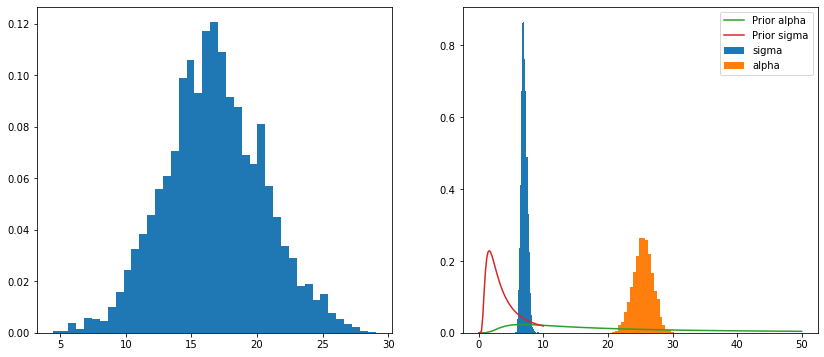

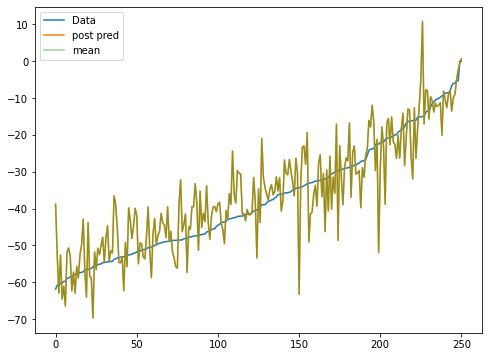

In [123]:
alpha = np.linspace(0,50)
sigma = np.linspace(0,10)
J = np.linspace(0,5)
p_alpha = np.exp(alpha_log_prior(alpha, hyp_alpha[0], hyp_alpha[1]))
p_sigma = np.exp(sigma_log_prior(sigma, hyp_sigma[0], hyp_sigma[1]))
p_J = ECI_log_prior(J, 10)


full_trace = np.concatenate(trace, axis=0)
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].hist(full_trace[:,2], bins=41  , density = True)
ax[1].hist(full_trace[:,J_dim], bins=21, density = True, label='sigma')
ax[1].hist(full_trace[:,J_dim+1], bins=21, density = True, label='alpha')
ax[1].plot(alpha,p_alpha, label='Prior alpha')
ax[1].plot(sigma,p_sigma, label='Prior sigma')
ax[1].legend(loc='best')


J_mean = (full_trace[:,0:J_dim]).mean(axis = 0)
J_mode = np.max(full_trace[:,0:J_dim], axis = 0)

y_map = X@J_mode
y_mean =  X@J_mean

y_full = np.zeros(len(X[:,0]))
for i,sample in enumerate(full_trace):
    y_full += X@sample[0:J_dim]

y_pred = y_full/len(full_trace[:,0])
fig, ax = plt.subplots(figsize=(8,6))
sortOrder = np.argsort(y)

ax.plot(y[sortOrder], label='Data')
ax.plot(y_pred[sortOrder], label='post pred')
# ax.plot(y_map[sortOrder], label='map')
ax.plot(y_mean[sortOrder], alpha=0.5, label='mean')
ax.legend(loc='best')

MSE = np.sum((y_mean - y)**2)/len(y)
print(MSE)

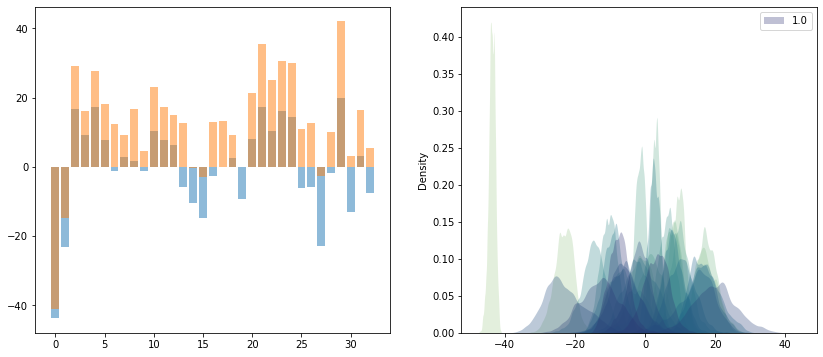

In [144]:
fig, axs = plt.subplots(1,2,figsize = (14,6))
t = np.arange(0,J_dim)
axs[0].bar(t,height = J_mean, alpha = 0.5)
axs[0].bar(t,height = J_mode, alpha = 0.5)

for alpha in range(J_dim):
    sns.kdeplot(x=full_trace[:,alpha], alpha=0.3, ax=axs[1], hue=alpha/32,
   hue_norm=(0,1), fill=True, palette="crest", linewidth=0)

#### The ground state

In [52]:
# Load ground state data
ground_db = connect('structures/ground_state_candidates.db')
nbr_ground_configs = 0
for row in ground_db.select():
    atoms = row.toatoms()
    print(row.symbols)
    nbr_ground_configs += 1
print(nbr_ground_configs)

['Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Ag', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Ag', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Ag', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Ag', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
['Pd', 'Pd', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Pd', 'Pd', 'Ag', 'Pd', 'Ag', 'Pd', 'Ag']
12


(251, 33)
[-38.4888616  -38.42893781 -39.25517802 -38.4915103  -38.47705668
 -39.94121872 -40.00152171 -39.52871548 -39.64877376 -38.74321736
 -39.0223888  -39.16144363]


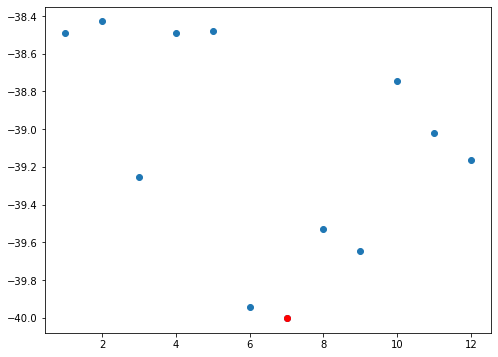

In [70]:
# OLS
# First train OLS with reference data
db = connect('structures/reference_data.db')
nbr_data = concentration.shape[0]
cs, nbr_parameters = get_nbr_parameters(cutoffs, db)
X, y = get_data(nbr_data, nbr_parameters, db, cs)
OLS_model = OLS_fit(X, y)
print(X.shape)

# Then make prediction on ground state candidates
cs, nbr_parameters = get_nbr_parameters(cutoffs, ground_db)
Xg, _ = get_data(nbr_ground_configs, nbr_parameters, ground_db, cs, get_energy=False)

y_OLS = OLS_model.predict(Xg)


print(y_OLS)
g_idx = np.argmin(y_OLS)
fig, ax = plt.subplots(figsize=(8,6))
candidates = np.arange(1, nbr_ground_configs+1)
ax.scatter(candidates, y_OLS)
ax.scatter(candidates[g_idx], y_OLS[g_idx], c='r')

[5.5200e+02 2.7700e+02 1.7000e+01 4.6000e+01 2.1300e+03 0.0000e+00
 0.0000e+00 2.9200e+02 0.0000e+00 2.4225e+04 0.0000e+00 7.4610e+03]


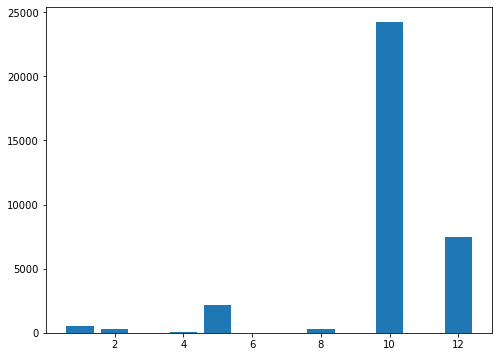

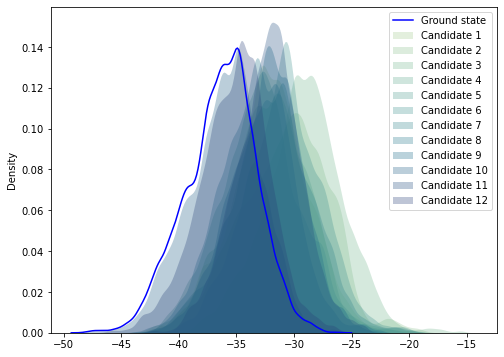

In [140]:
# What should we compute the ground state energy for? A specific cluster or for the ground state for each sample?
g_candidates = np.zeros(nbr_ground_configs)
g_energy = np.zeros(len(full_trace))
candidate_energy = np.zeros((len(full_trace), nbr_ground_configs))
for i,sample in enumerate(full_trace):
    y_sample = Xg@sample[0:J_dim]
    g_idx = np.argmin(y_sample)
    g_candidates[g_idx] += 1
    g_energy[i] = y_sample[g_idx]
    candidate_energy[i,:] = y_sample

print(g_candidates)
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=candidates, height=g_candidates)

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(x=g_energy, alpha=0.3, c='b', ax=ax, label='Ground state')
for i in range(0, nbr_ground_configs):       
    if i==np.argmax(g_candidates):
        a = 1
    else:
        a = 0.05
    sns.kdeplot(x=candidate_energy[:,i], alpha=0.3, ax=ax, hue=i/nbr_ground_configs,
   hue_norm=(0,1), fill=True, palette="crest", linewidth=0, label=f'Candidate {i+1}')
ax.legend(loc='best')